In [1]:
# Lets us load the environment variables from the .env file
#!pip install python-dotenv

In [2]:
from dotenv import load_dotenv

# Library that has a lot of operating system functions
from os import getenv

In [3]:
# Load from the .env
load_dotenv()

# Get the environmental variables
APP_NAME = getenv('APP_NAME')
APP_ID = getenv("APP_ID")
APP_SECRET = getenv("APP_SECRET")
USERNAME = getenv('REDDIT_USERNAME')
PASSWORD = getenv('PASSWORD')

In [4]:
# Check that is loads correctly
USERNAME

'MTS_wolf'

In [5]:
# Check that the variables all loaded
if APP_NAME and APP_ID and APP_SECRET and USERNAME and PASSWORD:
    print("Credentials loaded")
else:
    print("ERROR: Credentials not loaded!!")

Credentials loaded


In [6]:
# Library that let's us make http requests
import requests

# Sets up the authentication part of the request
auth = requests.auth.HTTPBasicAuth(f'{APP_ID}', f'{APP_SECRET}')

# Sets up the data we want to send: our login method (password), username, and password
data = {'grant_type': 'password',
        'username': f'{USERNAME}',
        'password': f'{PASSWORD}'}

# Sets up this requests header info, which gives reddit a brief description of our app
# This is the format requested by Reddit: os:app_name:version (by /u/username)
headers = {'User-Agent': f'windows:{APP_NAME}:v1.0 (by /u/{USERNAME})'}

# Makes the request to the access_token api endpoint, and saves the response in res
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers) #OAuth2

#if the result is 200 it works
print(res.status_code)

200


In [7]:
# Converts response to JSON and pull access_token value
TOKEN = res.json()['access_token']

# Adds authorisation to our headers dictionary
headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}

# While the token is valid (~2 hours) we can just add headers=headers to our requests to prove authentication
# Making a test request. <Response [200]> means that it was a success!
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

<Response [200]>

In [8]:
# Define the list of tickers
tickers = ['WBA', 'ERIC', 'INTL', 'DOCU', 'ADBE', 'PFE', 'TSLA', 'UMC']

# Tickers and their corresponding company names
ticker_to_company = {
    'WBA': 'Walgreens Boots Alliance',
    'ERIC': 'Ericsson',
    'INTL': 'Intel',  # Mapped as per your request
    'DOCU': 'DocuSign',
    'ADBE': 'Adobe',
    'PFE': 'Pfizer',
    'TSLA': 'Tesla',
    'UMC': 'United Microelectronics Corporation'
}

# Custom sentiment scores
new_words = {
    'citron': -4.0,  
    'hidenburg': -4.0,        
    'moon': 4.0,
    'highs': 2.0,
    'mooning': 4.0,
    'long': 2.0,
    'short': -2.0,
    'call': 4.0,
    'calls': 4.0,    
    'put': -4.0,
    'puts': -4.0,    
    'break': 2.0,
    'tendie': 2.0,
    'tendies': 2.0,
    'town': 2.0,     
    'overvalued': -3.0,
    'undervalued': 3.0,
    'buy': 4.0,
    'sell': -4.0,
    'gone': -1.0,
    'gtfo': -1.7,
    'paper': -1.7,
    'bullish': 3.7,
    'bearish': -3.7,
    'bagholder': -1.7,
    'stonk': 1.9,
    'green': 1.9,
    'money': 1.2,
    'print': 2.2,
    'rocket': 2.2,
    'bull': 4.0,
    'bear': -4.0,
    'pumping': -1.0,
    'sus': -3.0,
    'offering': -2.3,
    'rip': -4.0,
    'downgrade': -3.0,
    'upgrade': 3.0,     
    'maintain': 1.0,          
    'pump': 1.9,
    'hot': 1.5,
    'drop': -2.5,
    'rebound': 1.5,  
    'crack': 2.5,
    'gang': 2.0,
    'scam': -2.0,
    'chamath': -2.0,
    'snake': -2.0,
    'squezze': 3.0,
    'bag': -4.0,
    'fly': 2.0,     
    'way': 2.0,     
    'high': 2.0,
    'volume': 2.5,
    'low': -2.0,
    'trending': 3.0,
    'upwards': 3.0,
    'prediction': 1.0,     
    'cult': -1.0,     
    'big': 2.0,
    'HODL':2.0,
    'ATH':3.0,
    'DD':3.0,
    'FD':-3.0,
    'plunge':-4.0}

In [9]:
import requests

# Function for extracting info from different subreddits
def reddit(endpoint):
    return requests.get(f'https://oauth.reddit.com/{endpoint}', headers=headers)

# List of subreddits to fetch posts from
subreddits = ['StockMarket', 'stocks', 'wallstreetbets']

# Set up parameters for the initial request
params = {'limit': 50}  # Adjust the number as needed

# Counter for titles
title_count = 0

# Set to store post names to avoid duplicates
seen_posts = set()

# Expected limit of unique posts per subreddit
expected_limit = 50  # Adjust the number as needed

# Iterate over each subreddit
for subreddit in subreddits:
    endpoint = f'r/{subreddit}/new'
    current_count = 0  # Counter for titles in the current subreddit

    # Fetching pages until the expected limit is reached for the current subreddit
    while current_count < expected_limit:
        # Make a request using the reddit function
        res = reddit(endpoint)

        # Extract data from the response
        data = res.json().get('data', {}).get('children', [])

        # Check if data is empty
        if not data:
            break

        # Loop through all the results, printing only the titles of each post
        for post in data:
            title = post['data']['title']
            post_name = post['data']['name']
            
            # Check if the post is not a duplicate
            if post_name not in seen_posts:
                print(f'Subreddit: {subreddit} | Title: {title}')
                current_count += 1
                title_count += 1
                seen_posts.add(post_name)

        # If we reached the expected limit for the current subreddit, break out of the loop
        if current_count >= expected_limit:
            break

        # Get the next page
        after = data[-1]['data']['name']

        # Update the endpoint with the 'after' parameter
        endpoint = f'r/{subreddit}/new?after={after}&limit=50'  # Include the limit parameter in the URL

# Print the total number of titles
print(f'Total number of titles: {title_count}')

Subreddit: StockMarket | Title: CVS HEALTH RELATED STOCK
Subreddit: StockMarket | Title: S&amp;P 500 Outlooks for 2024
Subreddit: StockMarket | Title: Where do I start? I know nothing
Subreddit: StockMarket | Title: Thoughts on stock ZETA?
Subreddit: StockMarket | Title: [OC] S&amp;P 500 Volume/Average &amp; Daily Change (01/05/24)
Subreddit: StockMarket | Title: Visualizing 150 Years of S&amp;P 500 Returns
Subreddit: StockMarket | Title: Opinions on $JWN?
Subreddit: StockMarket | Title: I started investing 12 years ago and here's how my "buy and hold" strategy is performing vs. SP500 TR.
Subreddit: StockMarket | Title: I am a ex-prop trader trading US equities and these are the stocks on my watchlist (1/5).
Subreddit: StockMarket | Title: Why does this happen
Subreddit: StockMarket | Title: What is the link between a company's fundamental and the concept of supply and demand when choosing a stock?
Subreddit: StockMarket | Title: Nikola (NKLA) thoughts?
Subreddit: StockMarket | Title: 

Subreddit: stocks | Title: Everything I'm watching in premarket 05/01, including analysis of market positioning going into the jobs report
Subreddit: stocks | Title: r/Stocks Daily Discussion &amp; Fundamentals Friday Jan 05, 2024
Subreddit: stocks | Title: Has anyone used shareholder vote exchange?
Subreddit: stocks | Title: What are your controversial stocks you’ll never own?
Subreddit: stocks | Title: Are EV stocks pretty much done if republicans win in November 2024?
Subreddit: stocks | Title: Obvious trading logic or am I being a fool? Being based in Europe and trading an ETF based on the SP500 in dollars (e.g. CSPX.L)
Subreddit: stocks | Title: What’s a company you love, but a stock you hate?
Subreddit: stocks | Title: What do you think of QuantumScape (QS)?
Subreddit: stocks | Title: What is the likely scenario if the FED does not cut rates in 2024?
Subreddit: stocks | Title: Pfizer shares downgraded as patent expirations loom
Subreddit: stocks | Title: Can the rise of Influenti

In [10]:
import requests

# Function for extracting info from different subreddits
def reddit(endpoint):
    return requests.get(f'https://oauth.reddit.com/{endpoint}', headers=headers)

# List of subreddits to fetch posts from
subreddits = ['StockMarket', 'stocks', 'wallstreetbets']

# Set up parameters for the initial request
params = {'limit': 50}  # Adjust the number as needed

# Counter for titles
title_count = 0

# Set to store post names to avoid duplicates
seen_posts = set()

# Expected limit of unique posts per subreddit
expected_limit = 50  # Adjust the number as needed

# List to store fetched data
all_data = []

# Iterate over each subreddit
for subreddit in subreddits:
    endpoint = f'r/{subreddit}/new'
    current_count = 0  # Counter for titles in the current subreddit

    # Fetching pages until the expected limit is reached for the current subreddit
    while current_count < expected_limit:
        # Make a request using the reddit function
        res = reddit(endpoint)

        # Extract data from the response
        data = res.json().get('data', {}).get('children', [])

        # Check if data is empty
        if not data:
            break

        # Loop through all the results, printing titles and selftext of each post
        for post in data:
            title = post['data']['title']
            selftext = post['data']['selftext']
            post_name = post['data']['name']
            
            # Check if the post is not a duplicate
            if post_name not in seen_posts:
                print(f'Subreddit: {subreddit} | Title: {title}\nSelftext: {selftext}\n')
                current_count += 1
                title_count += 1
                seen_posts.add(post_name)
                
                # Store the post data in the list
                all_data.append(post)

        # If we reached the expected limit for the current subreddit, break out of the loop
        if current_count >= expected_limit:
            break

        # Get the next page
        after = data[-1]['data']['name']

        # Update the endpoint with the 'after' parameter
        endpoint = f'r/{subreddit}/new?after={after}&limit=50'  # Include the limit parameter in the URL

# Print the total number of titles
print(f'Total number of titles: {title_count}')

Subreddit: StockMarket | Title: CVS HEALTH RELATED STOCK
Selftext: Expecting a new ath from this also market trend shifted from bearish to bullish and perfectly retested msb level will see this above 100 this year soon

Subreddit: StockMarket | Title: S&amp;P 500 Outlooks for 2024
Selftext: The first week of the year has seen the S&amp;P 500 down 0.8%. No need to panic – let's reflect on the incredible 12 months we just had. What can we expect in 2⃣0⃣2⃣4⃣? Check out S&amp;P 500 outlooks from banks and financial institutions for the year ahead. 📈

What are your expectations the the coming months and 2024?

Subreddit: StockMarket | Title: Where do I start? I know nothing
Selftext: Probably a very commonly asked question but I’ll ask it again. I’m 22 years old and make $200 a day when I do work. I work with asphalt. I know nothing about money. I currently have $12.37 cents to my name. What Books, series, courses should I look into. I’m tired of being in the situation I’m in and being brok

Subreddit: StockMarket | Title: Financial Times: US office owners face $117bn wall of debt repayments
Selftext: **Financial Times: US office owners face $117bn wall of debt repayments**

Pain likely to be widely spread as landlords struggle to refinance at current interest rates

[https://www.ft.com/content/4ed9e5b0-f3de-422a-9a07-a328ebf2340c](https://www.ft.com/content/4ed9e5b0-f3de-422a-9a07-a328ebf2340c)

&amp;#x200B;

*Billions of dollars of debt will fall due this year on hundreds of big US office buildings that their owners are likely to struggle to refinance at current interest rates.*

*There are $117bn of commercial mortgages tied to offices which either need to be repaid or refinanced in 2024, according to data from the Mortgage Bankers Association.*

*Many of those were taken out a decade ago in an era when interest rates were far lower. Since then, commercial mortgage rates have nearly doubled, while the performance of many buildings has sunk, raising the prospect of billi

Subreddit: stocks | Title: Why is the situation in Red Sea driving shipping stocks to soar?
Selftext: Apparently many people are buying shipping stock, which have caused the stocks’ values to soar. I am super amateur, so I would like to know why people are buying those companies’ stocks if the costs and expenses are driven up by the intense situation in that area.

I googled and never got a clear explanation regarding why people think the demands of the stocks will increase.

The shipping companies will definitely increase the price of shipping, but with higher costs and expenses, their net profits are still going to soar? 

People buy shipping stocks during Covid time, I can understand, but how about now?

Subreddit: stocks | Title: Buying Apple stock from UK
Selftext: First time investing in stock. I want to invest around £5k in Apple. What’s the best way to do so? The only option I’m seeing at the moment is through Revolut. I only have standard account with Revolut. 
Is there any ot

Subreddit: stocks | Title: Everything I'm watching in premarket 05/01, including analysis of market positioning going into the jobs report
Selftext:   
**Jobs numbers Analysis:**

* I mentioned earlier in the week that I was hearing that jobs numbers could come hot. This is just heresy and there’s nothing concrete behind this. No one has alpha on that, except their firm’s research. However, I am watching the Implied volatility on VIX. This will tell us what firms are actually expecting as if they expect it to come hot, they will be bidding up VIX. There is nothing in the implied volatility. This tells me people are not hedging much ahead of this data. I guess they expect it to be ok. Let’s see. 
* Money flows into SPY also growing, a sign people will be soon buying this dip. 

**Today’s trading:**

* Today’s trading will be dictated by the outcome of the Jobs numbers.   
In anticipation of it, the USD has been pushing up in premarket, which has pushed US equities lower. 
* There are a 

Subreddit: wallstreetbets | Title: Intuitive Surgical $ISRG YOLO
Selftext: MD checking in. 

Intuitive Surgical, Inc. is a leading company in the field of robotic-assisted, minimally invasive surgery. Founded in 1995, Intuitive Surgical has been a pioneer in the development of robotic-assisted surgical systems. Their most notable product is the da Vinci Surgical System, which received FDA approval in 2000. The da Vinci system is designed to facilitate complex surgery using a minimally invasive approach. The system allows surgeons to perform procedures with enhanced precision, flexibility, and control compared to traditional surgical techniques. Intuitive Surgical continually innovates, releasing updated models and specialized instruments.


Built this position for some time but added the most last month.

Subreddit: wallstreetbets | Title: Everyone thinks Boeing is going to crash tomorrow so calls at open is the move
Selftext: 

Subreddit: wallstreetbets | Title: Boeing Premarket L&amp

Subreddit: wallstreetbets | Title: Boeing is a Jack Welch legacy dumpster
Selftext: Today's Boeing is a Jack Welch story! 

James McNerney started in McKinsey, then became the hand-trained monkey of Jack Welch in GE. He became Boeing CEO in 2005 &amp; he was the guy when the 737 MAX was being designed. Remember, Jack Welch was the CEO of Century just before retirement from GE &amp; then the fraud of Century as GE crashed and burned with all of his accounting frauds being discovered. He wasn't fined a penny.

Dennis Muilenburg had started at Boeing as an intern, so he was scapegoated as CEO in 2015 and then was fired in 2019 taking the blame for 737 MAX fuck ups.

Dave Calhoun who is another Jack Welch-trained monkey, with 25 years of GE experience, replaced Muilenburg &amp; of course, Boeing is in its current state.

TLDR: Tracking GE monkeys trained by Welch &amp; not investing in the companies they run could be beneficial in the long term.

Subreddit: wallstreetbets | Title: The hous

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
import string
import re

nltk.download('stopwords')

def remove_urls(text):
    # Regular expression to match URLs
    url_pattern = re.compile(r'https?://\S+')
    return url_pattern.sub('', text)

# Function to analyze text and calculate frequency distribution
def analyze_text(posts_data):
    # Combine text from titles and selftext of all posts
    all_text = ""
    for post in posts_data:
        title = post['data']['title']
        selftext = post['data']['selftext']
        text = title + " " + selftext
        text_without_urls = remove_urls(text)
        all_text += text_without_urls + " "

    # Tokenize the combined text
    tokens = word_tokenize(all_text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]

    # Save tokens to a text file
    with open('tokens.txt', 'w', encoding='utf-8') as token_file:
        token_file.write('\n'.join(tokens))

    # Save the combined text to a text file
    with open('all_text.txt', 'w', encoding='utf-8') as text_file:
        text_file.write(all_text)

    # Calculate the frequency distribution
    freq_dist = FreqDist(tokens)

    # Print the most common words
    print(freq_dist.most_common())

# Analyze the text and calculate frequency distribution
analyze_text(all_data)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swast\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('gt', 255), ('market', 224), ('Disney', 172), ('stock', 141), ('data', 130), ('stocks', 120), ('amp', 119), ('company', 119), ('lower', 115), ('year', 112), ('price', 112), ('would', 108), ('higher', 103), ('like', 102), ('see', 100), ('US', 86), ('time', 86), ('could', 81), ('2024', 80), ('people', 79), ('2', 75), ('one', 74), ('day', 72), ('trading', 72), ('China', 72), ('said', 72), ('also', 70), ('since', 70), ('shares', 70), ('think', 69), ('going', 69), ('2023', 69), ('yesterday', 64), ('rate', 64), ('x200B', 63), ('buy', 62), ('last', 61), ('numbers', 59), ('move', 56), ('still', 55), ('3', 55), ('board', 55), ('inflation', 54), ('Peltz', 54), ('make', 52), ('even', 52), ('companies', 51), ('premarket', 51), ('news', 51), ('much', 50), ('years', 48), ('likely', 48), ('new', 47), ('long', 47), ('Apple', 47), ('today', 46), ('target', 46), ('get', 45), ('growth', 45), ('came', 45), ('well', 45), ('want', 44), ('Iger', 44), ('open', 43), ('high', 43), ('shareholders', 43), ('wort

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\swast\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swast\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


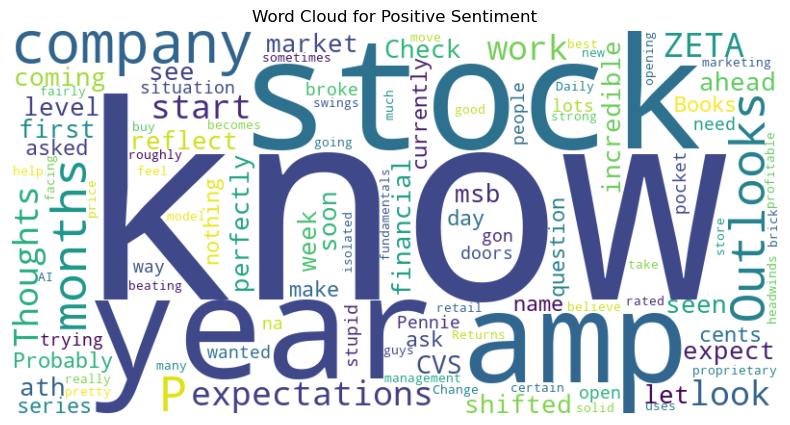

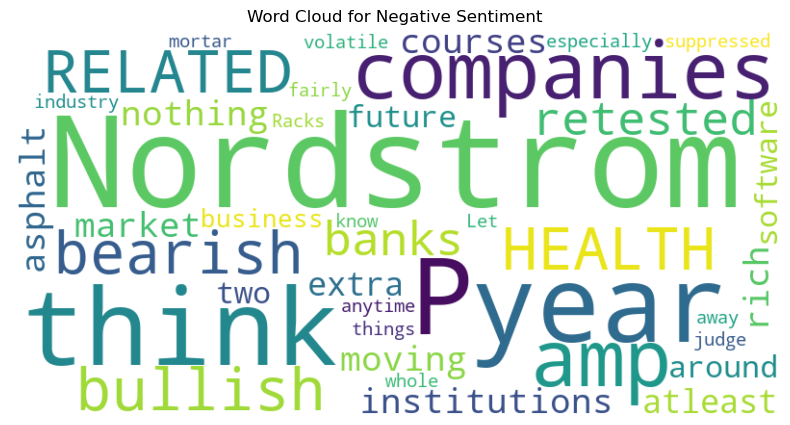

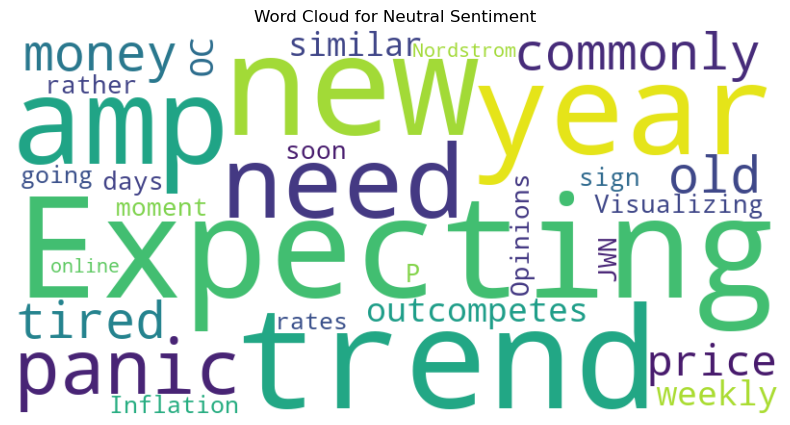

In [12]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Load tokens from the text file
with open('tokens.txt', 'r', encoding='utf-8') as token_file:
    tokens = token_file.read().split()

# Load the combined text from the text file
with open('all_text.txt', 'r', encoding='utf-8') as text_file:
    all_text = text_file.read()

# Assuming 'all_data' is defined (after executing Parts 1 and 2)
# Perform sentiment analysis
sia = SentimentIntensityAnalyzer()
sia.lexicon.update(new_words)  # Update Vader's lexicon with new words
sentiments = []

# Make sure to use the shorter of the two lengths
min_length = min(len(all_data), len(tokens))

for i in range(min_length):
    text = all_data[i]['data']['title'] + " " + all_data[i]['data']['selftext']
    sentiment_score = sia.polarity_scores(text)['compound']
    
    if sentiment_score >= 0.05:
        sentiment = 'positive'
    elif sentiment_score <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    sentiments.append(sentiment)

# Create a dictionary to store posts by sentiment
corpus = {'positive': [], 'negative': [], 'neutral': []}
for i, sentiment in enumerate(sentiments):
    # Only append if the index is within the range of 'tokens'
    if i < len(tokens):
        corpus[sentiment].append(tokens[i])

# Generate word clouds for each sentiment
def generate_wordcloud_from_corpus(corpus, sentiment):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(corpus[sentiment]))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.show()

# Generate word clouds
generate_wordcloud_from_corpus(corpus, 'positive')
generate_wordcloud_from_corpus(corpus, 'negative')
generate_wordcloud_from_corpus(corpus, 'neutral')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\swast\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swast\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Overall sentiment for WBA: positive
Overall sentiment for ERIC: neutral
Overall sentiment for INTL: neutral
Overall sentiment for DOCU: neutral
Overall sentiment for ADBE: neutral
Overall sentiment for PFE: neutral
Overall sentiment for TSLA: neutral
Overall sentiment for UMC: neutral


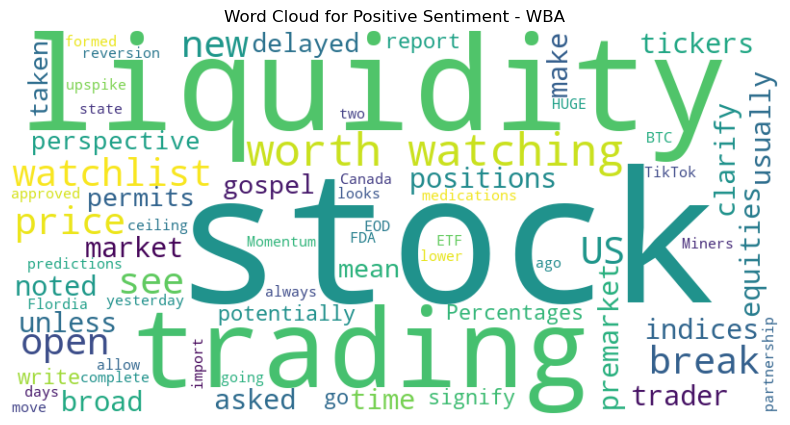

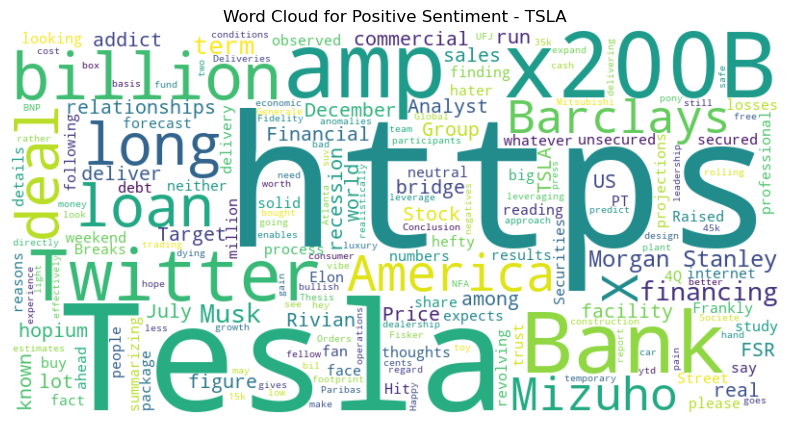

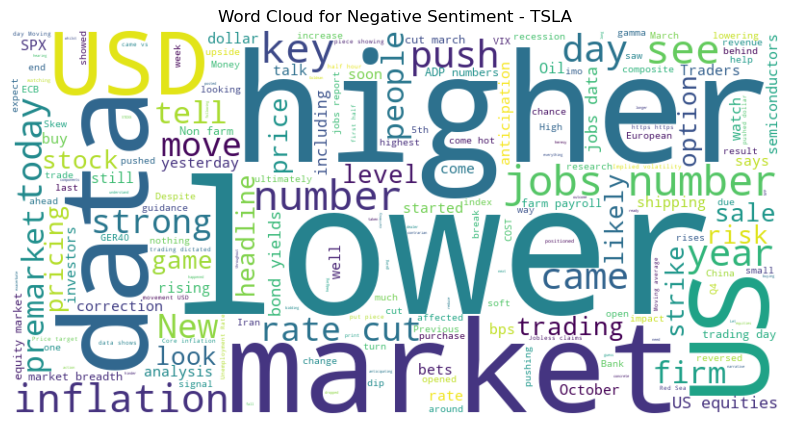

In [13]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Set up stop words
stop_words = set(stopwords.words('english'))

# Initialize Sentiment Intensity Analyzer and update its lexicon
sia = SentimentIntensityAnalyzer()
sia.lexicon.update(new_words)  # Update Vader's lexicon with new words

# Assuming 'all_data' and 'tickers' are defined (after executing Parts 1 and 2)
# Perform sentiment analysis for each ticker
ticker_overall_sentiment = {}

# Create a dictionary to store words for each sentiment
ticker_words = {}

for ticker in tickers:
    # Filter posts that contain the current ticker
    relevant_posts = [post for post in all_data if ticker in post['data']['title'] or ticker in post['data']['selftext']]

    # Analyze sentiment for relevant posts
    sentiments = []
    words_for_sentiment = {'positive': [], 'negative': [], 'neutral': []}

    for post in relevant_posts:
        text = post['data']['title'] + " " + post['data']['selftext']
        sentiment_score = sia.polarity_scores(text)['compound']

        # Determine the final sentiment category
        if sentiment_score >= 0.05:
            sentiment = 'positive'
        elif sentiment_score <= -0.05:
            sentiment = 'negative'
        else:
            sentiment = 'neutral'

        sentiments.append(sentiment)

        # Tokenize the text and store words for the corresponding sentiment
        post_tokens = word_tokenize(text)
        post_tokens = [word for word in post_tokens if word.lower() not in stop_words and word.isalnum()]
        words_for_sentiment[sentiment].extend(post_tokens)

    # Determine overall sentiment for the current ticker
    positive_count = sentiments.count('positive')
    negative_count = sentiments.count('negative')
    neutral_count = sentiments.count('neutral')

    if positive_count > negative_count and positive_count > neutral_count:
        overall_sentiment = 'positive'
    elif negative_count > positive_count and negative_count > neutral_count:
        overall_sentiment = 'negative'
    else:
        overall_sentiment = 'neutral'

    # Store overall sentiment for the current ticker
    ticker_overall_sentiment[ticker] = overall_sentiment
    ticker_words[ticker] = words_for_sentiment

# Print overall sentiment for each ticker
for ticker, overall_sentiment in ticker_overall_sentiment.items():
    print(f"Overall sentiment for {ticker}: {overall_sentiment}")

# Generate word clouds for each sentiment
def generate_wordcloud_from_words(words, sentiment, ticker):
    if words:  # Check if there are words for the sentiment
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment - {ticker}')
        plt.show()

# Generate word clouds
for ticker, words_for_sentiment in ticker_words.items():
    for sentiment, words in words_for_sentiment.items():
        generate_wordcloud_from_words(words, sentiment, ticker)

In [14]:
def display_ticker_mentions(all_data, ticker, sia):
    print(f"Displaying mentions for ticker: {ticker}\n")

    for post in all_data:
        title = post['data']['title']
        selftext = post['data']['selftext']
        text = title + " " + selftext

        # Check if the ticker is mentioned in the title or selftext
        if ticker in text:
            sentiment_score = sia.polarity_scores(text)['compound']

            print(f"Title: {title}")
            print(f"Selftext: {selftext}")
            print(f"Sentiment Score: {sentiment_score}\n")
            print("--------------------------------------------------\n")

# Example usage
sia = SentimentIntensityAnalyzer()  # Assuming sia is already initialized and updated with new words
display_ticker_mentions(all_data, 'DOCU', sia)

Displaying mentions for ticker: DOCU



In [15]:
# Praw is used to collect the comments from the post
import praw
from dotenv import load_dotenv
from os import getenv

# Load from the .env
load_dotenv()

# Get the environmental variables
APP_NAME = getenv('APP_NAME')
APP_ID = getenv("APP_ID")
APP_SECRET = getenv("APP_SECRET")
USERNAME = getenv('REDDIT_USERNAME')
PASSWORD = getenv('PASSWORD')

# Authenticate with Reddit using praw
reddit = praw.Reddit(
    client_id=APP_ID,
    client_secret=APP_SECRET,
    username=USERNAME,
    password=PASSWORD,
    user_agent=APP_NAME,
)

# Test if authentication is successful
try:
    user = reddit.user.me()
    print(f"Authenticated as: {user}")
except praw.exceptions.RedditAPIException as e:
    print(f"Authentication failed. Error: {e}")


Authenticated as: MTS_wolf


In [16]:
# Subreddits to fetch data from
subreddit_names = ['StockMarket', 'stocks', 'wallstreetbets']

# List to store fetched data
all_data = []

# Iterate through all posts in each subreddit
for subreddit_name in subreddit_names:
    subreddit = reddit.subreddit(subreddit_name)
    for submission in subreddit.new(limit=50):  # Adjust the limit as needed
        post_data = {
            "title": submission.title,
            "selftext": submission.selftext,
            "author": submission.author.name if submission.author else "Unknown",  # Include author's username
            "comments": []
        }

        # Extract comments
        submission.comments.replace_more(limit=20)  # Load more comments if needed
        for comment in submission.comments.list():
            comment_data = {
                "body": comment.body,
                "author": comment.author.name if comment.author else "Unknown"  # Include commenter's username
            }
            post_data["comments"].append(comment_data)

        # Store post data in the list
        all_data.append(post_data)

# Print the total number of posts
print(f'Total number of posts: {len(all_data)}')

# Access and print the stored data
for post_data in all_data:
    print(f"Post Title: {post_data['title']}")
    print(f"Post Selftext: {post_data['selftext']}")
    print(f"Post Author: {post_data['author']}")
    print("Comments:")
    for comment_data in post_data['comments']:
        print(f"  - Comment Author: {comment_data['author']}")
        print(f"  - Comment Body: {comment_data['body']}")
    print("------")

Total number of posts: 150
Post Title: CVS HEALTH RELATED STOCK
Post Selftext: Expecting a new ath from this also market trend shifted from bearish to bullish and perfectly retested msb level will see this above 100 this year soon
Post Author: sajjasajji
Comments:
  - Comment Author: Cyrusgrade10teacher
  - Comment Body: Didn’t they just lay off some 5000 workers? Does that help or hurt their quest for a new ATH?
  - Comment Author: Ragepower529
  - Comment Body: i can see $100 if they stop dividend and do stock buy back instead
  - Comment Author: Didntlikedefaultname
  - Comment Body: I think it’s a huge stretch that cvs sees an ATH anytime soon, and I say this as a long time cvs shareholder. We’re currently sitting a bit more than 30% off ATH and that would be a huge, huge move for a stock like cvs to make
  - Comment Author: diamondhandsb
  - Comment Body: Wtf you smoking? This opening red Monday and gonna re-test 75
  - Comment Author: kelu213
  - Comment Body: the amount of shit 

## Specific users posts

In [17]:
# List of specific users to filter
specific_users = ['TearRepresentative56', 'DeepF--kingValue']

# List to store data from specific users
all_datauser = []

# Iterate through all data and check for specific users
for post_data in all_data:
    # Check if the post is made by a specific user
    if post_data['author'] in specific_users:
        all_datauser.append({
            "type": "post",
            "title": post_data['title'],
            "selftext": post_data['selftext'],
            "author": post_data['author']
        })

    # Check comments in each post for specific users
    for comment_data in post_data['comments']:
        if comment_data['author'] in specific_users:
            all_datauser.append({
                "type": "comment",
                "body": comment_data['body'],
                "author": comment_data['author']
            })

# Print the total number of posts and comments by specific users
print(f"Total number of posts and comments by specific users: {len(all_datauser)}")

# Access and print the stored data for specific users
for data in all_datauser:
    if data['type'] == 'post':
        print(f"Post Title: {data['title']}")
        print(f"Post Selftext: {data['selftext']}")
    elif data['type'] == 'comment':
        print(f"Comment: {data['body']}")
    print(f"Author: {data['author']}")
    print("------")

Total number of posts and comments by specific users: 64
Post Title: Here's everything I noted from premarket 05/01. I include all the analysis of how the market is positioned going into the jobs report today.
Post Selftext: **Jobs numbers Analysis:**

* I mentioned earlier in the week that I was hearing that jobs numbers could come hot. This is just heresy and there’s nothing concrete behind this. No one has alpha on that, except their firm’s research. However, I am watching the Implied volatility on VIX. This will tell us what firms are actually expecting as if they expect it to come hot, they will be bidding up VIX. There is nothing in the implied volatility. This tells me people are not hedging much ahead of this data. I guess they expect it to be ok. Let’s see.
* Money flows into SPY also growing, a sign people will be soon buying this dip.

**Today’s trading:**

* Today’s trading will be dictated by the outcome of the Jobs numbers.In anticipation of it, the USD has been pushing u

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\swast\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


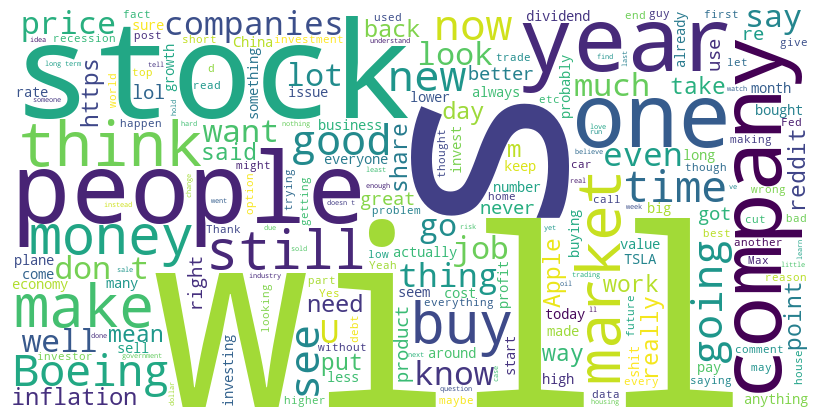

In [18]:
import nltk
import urllib.parse
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure you have the necessary NLTK data
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer and update it with custom words
sia = SentimentIntensityAnalyzer()
sia.lexicon.update(new_words)

# Function to clean, decode text, and replace company names with tickers
def clean_and_decode_text(text, ticker_to_company):
    decoded_text = urllib.parse.unquote(text)
    for ticker, company in ticker_to_company.items():
        decoded_text = decoded_text.replace(company, ticker)
    filtered_words = [word for word in decoded_text.split() if word.lower() not in ['http', 'https', '@', '#']]
    return ' '.join(filtered_words)

# Function to check if text contains any ticker
def contains_ticker(text, tickers, ticker_to_company):
    for ticker in tickers:
        if ticker in text or ticker_to_company.get(ticker, '') in text:
            return True
    return False

# Function to aggregate cleaned texts for sentiment analysis and word clouds
def aggregate_texts(data, tickers, ticker_to_company):
    aggregated_texts = []
    for post_data in data:
        # Combine and clean title, selftext, and comments
        cleaned_text = clean_and_decode_text(post_data['title'], ticker_to_company) + ' '
        cleaned_text += clean_and_decode_text(post_data['selftext'], ticker_to_company) + ' '
        cleaned_text += ' '.join(clean_and_decode_text(comment['body'], ticker_to_company) for comment in post_data['comments'])

        if contains_ticker(cleaned_text, tickers, ticker_to_company):
            aggregated_texts.append(cleaned_text)

    return aggregated_texts

# Filter and aggregate data
aggregated_texts = aggregate_texts(all_data, tickers, ticker_to_company)

# Perform sentiment analysis
sentiments = [sia.polarity_scores(text)['compound'] for text in aggregated_texts]

# Generate word cloud from aggregated texts
all_texts_combined = ' '.join(aggregated_texts)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_texts_combined)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## Sentiment Analysis using data stored in SQLite

In [19]:
import time
import praw
from dotenv import load_dotenv
from os import getenv
from sqlalchemy import create_engine, Column, String, Text, Integer, DateTime, ForeignKey
from sqlalchemy.orm import relationship, declarative_base, sessionmaker
from datetime import datetime
import uuid

# Load environment variables
load_dotenv()

# Reddit API credentials
APP_NAME = getenv('APP_NAME')
APP_ID = getenv("APP_ID")
APP_SECRET = getenv("APP_SECRET")
USERNAME = getenv('REDDIT_USERNAME')
PASSWORD = getenv('PASSWORD')

# Authenticate with Reddit using PRAW
reddit = praw.Reddit(
    client_id=APP_ID,
    client_secret=APP_SECRET,
    username=USERNAME,
    password=PASSWORD,
    user_agent=APP_NAME,
)

# Define the database models
Base = declarative_base()

class RedditPost(Base):
    __tablename__ = 'reddit_posts'
    id = Column(Integer, primary_key=True)
    title = Column(String)
    selftext = Column(Text)
    created_at = Column(DateTime, default=datetime.utcnow)
    comments = relationship('RedditComment', back_populates='post')

class RedditComment(Base):
    __tablename__ = 'reddit_comments'
    id = Column(Integer, primary_key=True)
    body = Column(Text)
    comment_name = Column(String, unique=True)
    created_at = Column(DateTime, default=datetime.utcnow)
    post_id = Column(Integer, ForeignKey('reddit_posts.id'))
    post = relationship('RedditPost', back_populates='comments')

# Create the database engine
database_url = 'sqlite:///reddit_data.db'  # Use your preferred database URL
engine = create_engine(database_url, echo=True)

# Clear all data from tables
Base.metadata.drop_all(engine)

# Recreate tables
Base.metadata.create_all(engine)

# Create a session
Session = sessionmaker(bind=engine)
session = Session()

# Subreddits to fetch data from
subreddit_names = ['StockMarket', 'stocks', 'wallstreetbets']

# Lists to store posts and comments for batch insert
posts_to_add = []
comments_to_add = []

# Fetch and store posts and comments
for subreddit_name in subreddit_names:
    subreddit = reddit.subreddit(subreddit_name)
    for submission in subreddit.new(limit=50):
        # Create a post instance
        reddit_post = RedditPost(title=submission.title, selftext=submission.selftext)
        posts_to_add.append(reddit_post)

        # Fetch and add comments
        submission.comments.replace_more(limit=20)
        for comment in submission.comments.list():
            reddit_comment = RedditComment(body=comment.body, comment_name=str(uuid.uuid4()), post=reddit_post)
            comments_to_add.append(reddit_comment)

# Batch insert posts and comments
session.add_all(posts_to_add)
session.add_all(comments_to_add)
session.commit()

print(f'Total number of posts: {len(posts_to_add)}')

# Output a limited number of stored posts
max_posts_to_display = 50
for idx, reddit_post in enumerate(posts_to_add[:max_posts_to_display]):
    print(f"Post {idx + 1}:")
    print(f"Title: {reddit_post.title}")
    print(f"Selftext: {reddit_post.selftext[:200]}...")  # Display first 200 characters of selftext
    print("Comments:")
    for comment_idx, reddit_comment in enumerate(reddit_post.comments[:5]):  # Display first 5 comments
        print(f"  - Comment {comment_idx + 1}: {reddit_comment.body[:200]}...")  # Display first 200 characters of comment
    print("------\n")

2024-01-07 17:47:38,912 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-01-07 17:47:38,913 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("reddit_posts")
2024-01-07 17:47:38,913 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-07 17:47:38,915 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("reddit_comments")
2024-01-07 17:47:38,915 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-07 17:47:38,916 INFO sqlalchemy.engine.Engine 
DROP TABLE reddit_comments
2024-01-07 17:47:38,917 INFO sqlalchemy.engine.Engine [no key 0.00072s] ()
2024-01-07 17:47:39,060 INFO sqlalchemy.engine.Engine 
DROP TABLE reddit_posts
2024-01-07 17:47:39,060 INFO sqlalchemy.engine.Engine [no key 0.00052s] ()
2024-01-07 17:47:39,065 INFO sqlalchemy.engine.Engine COMMIT
2024-01-07 17:47:39,066 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-01-07 17:47:39,066 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("reddit_posts")
2024-01-07 17:47:39,067 INFO sqlalchemy.engine.Engine [raw sql] ()
202

2024-01-07 17:49:52,514 INFO sqlalchemy.engine.Engine INSERT INTO reddit_posts (title, selftext, created_at) VALUES (?, ?, ?)
2024-01-07 17:49:52,514 INFO sqlalchemy.engine.Engine [cached since 0.0159s ago] ("Here's everything I noted from premarket 05/01. I include all the analysis of how the market is positioned going into the jobs report today.", '**Jobs numbers Analysis:**\n\n* I mentioned earlier in the week that I was hearing that jobs numbers could come hot. This is just heresy and there’s  ... (8863 characters truncated) ... inancial conglomerate Zhongzhi declares bankruptcy. This is the shadow bank that has been struggling for some time. News priced in hence no reaction.', '2024-01-07 17:49:52.514776')
2024-01-07 17:49:52,515 INFO sqlalchemy.engine.Engine INSERT INTO reddit_posts (title, selftext, created_at) VALUES (?, ?, ?)
2024-01-07 17:49:52,516 INFO sqlalchemy.engine.Engine [cached since 0.01698s ago] ('Help with brokerage', 'First time posting here, been kinda stuck betw

2024-01-07 17:49:52,530 INFO sqlalchemy.engine.Engine INSERT INTO reddit_posts (title, selftext, created_at) VALUES (?, ?, ?)
2024-01-07 17:49:52,531 INFO sqlalchemy.engine.Engine [cached since 0.03202s ago] ('I am a ex-prop trader trading US equities and these are the stocks on my watchlist (1/3).', "  \n\nNo positions in any stocks long-term but Amazon/Mag7/general broad market indices. (unless otherwise noted in these tickers)\n\nTo clarify sinc ... (986 characters truncated) ...  off before today’s open, everything related to BTC has had a huge reversal the past 2 days. Currently long COIN in my trading account off the open. ", '2024-01-07 17:49:52.530777')
2024-01-07 17:49:52,531 INFO sqlalchemy.engine.Engine INSERT INTO reddit_posts (title, selftext, created_at) VALUES (?, ?, ?)
2024-01-07 17:49:52,532 INFO sqlalchemy.engine.Engine [cached since 0.03313s ago] ("Everything I'm watching in premarket 03/01. All the news/data summarised, with analysis. Including Skew analysis to teac

2024-01-07 17:49:52,549 INFO sqlalchemy.engine.Engine [cached since 0.05017s ago] ('New property prices in China are rising.', "Good morning, everyone!\n\nLet's dive into some news from China—specifically, the housing market. So, in December, China's new home prices decided to ... (650 characters truncated) ... he housing market in China is doing a little dance—a bit of an up-and-down routine. Let's see where it takes us next!\n\nStay tuned for more updates.", '2024-01-07 17:49:52.548775')
2024-01-07 17:49:52,549 INFO sqlalchemy.engine.Engine INSERT INTO reddit_posts (title, selftext, created_at) VALUES (?, ?, ?)
2024-01-07 17:49:52,550 INFO sqlalchemy.engine.Engine [cached since 0.05143s ago] ('2023 Was Good To Me', "Not the most impressive gains, but I beat the market! This is my long term portfolio that I'm not touching until retirement. I hope everyone else did good this year.", '2024-01-07 17:49:52.549775')
2024-01-07 17:49:52,551 INFO sqlalchemy.engine.Engine INSERT INTO reddit_p

2024-01-07 17:49:52,562 INFO sqlalchemy.engine.Engine INSERT INTO reddit_posts (title, selftext, created_at) VALUES (?, ?, ?)
2024-01-07 17:49:52,563 INFO sqlalchemy.engine.Engine [cached since 0.06431s ago] ('FAA orders temporary grounding of Boeing (BA) 737 MAX 9 aircraft.', 'From the FAA statement:\n\nThe FAA ordered the temporary grounding of certain Boeing 737 MAX 9 aircraft operated by U.S. airlines or in U.S. territor ... (391 characters truncated) ... er flight. The required inspections will take around four to eight hours per aircraft.\n \nThe EAD will affect approximately 171 airplanes worldwide.', '2024-01-07 17:49:52.562779')
2024-01-07 17:49:52,564 INFO sqlalchemy.engine.Engine INSERT INTO reddit_posts (title, selftext, created_at) VALUES (?, ?, ?)
2024-01-07 17:49:52,564 INFO sqlalchemy.engine.Engine [cached since 0.06537s ago] ("Will Mark Cuban's pharmacy - Cost Plug Drugs destroy CVS, Rite Aid, Walgreens etc.", "CPD is genius since it doesn't have to do go through FDA a

2024-01-07 17:49:52,576 INFO sqlalchemy.engine.Engine INSERT INTO reddit_posts (title, selftext, created_at) VALUES (?, ?, ?)
2024-01-07 17:49:52,577 INFO sqlalchemy.engine.Engine [cached since 0.07829s ago] ('Good time for AKAM', 'AKAM is in its periodic dip before earnings on 2/14 and some analysts are still thinking of this company as only a security/CDN provider; but in 2022 ... (83 characters truncated) ... ng (growing 20% year over year). \n\nEvery time they have beat analyst estimates of earnings and I doubt this next one will be different.\n\n&#x200B;', '2024-01-07 17:49:52.576779')
2024-01-07 17:49:52,578 INFO sqlalchemy.engine.Engine INSERT INTO reddit_posts (title, selftext, created_at) VALUES (?, ?, ?)
2024-01-07 17:49:52,578 INFO sqlalchemy.engine.Engine [cached since 0.07939s ago] ('I am a ex-prop trader trading US equities and these are the stocks on my watchlist (1/5).', "\r  \nNo positions in any stocks long-term but Amazon/Mag7/general broad market indices. (unless ot

2024-01-07 17:49:52,591 INFO sqlalchemy.engine.Engine INSERT INTO reddit_posts (title, selftext, created_at) VALUES (?, ?, ?)
2024-01-07 17:49:52,591 INFO sqlalchemy.engine.Engine [cached since 0.09243s ago] ('What is the likely scenario if the FED does not cut rates in 2024?', 'Pure speculation here, but the FED basically said that they do not plan on increasing rates because increased bond yields and a decreased stock marke ... (508 characters truncated) ... 2024 with multiple 5-10% swings vs a steady increase in market valuation if no or just 1-2 rate cuts occur.\n\nThanks for your opinions and thoughts!', '2024-01-07 17:49:52.591777')
2024-01-07 17:49:52,592 INFO sqlalchemy.engine.Engine INSERT INTO reddit_posts (title, selftext, created_at) VALUES (?, ?, ?)
2024-01-07 17:49:52,592 INFO sqlalchemy.engine.Engine [cached since 0.09342s ago] ('Pfizer shares downgraded as patent expirations loom', 'From MarketWatch:\n\nPfizer Inc. shares were downgraded to market perform from outperfor

2024-01-07 17:49:52,605 INFO sqlalchemy.engine.Engine INSERT INTO reddit_posts (title, selftext, created_at) VALUES (?, ?, ?)
2024-01-07 17:49:52,605 INFO sqlalchemy.engine.Engine [cached since 0.1068s ago] ('AMRX - Changes in Beneficial Ownership', "Anyone have any ideas what's going on with AMRX?  First they moved from the NYSE to the NASDAQ in late 2023... then on January 1st they filed schedul ... (81 characters truncated) ... nvestors.amneal.com/financial-reports/sec-filings/default.aspx](https://investors.amneal.com/financial-reports/sec-filings/default.aspx)\n\nThoughts?", '2024-01-07 17:49:52.605775')
2024-01-07 17:49:52,606 INFO sqlalchemy.engine.Engine INSERT INTO reddit_posts (title, selftext, created_at) VALUES (?, ?, ?)
2024-01-07 17:49:52,607 INFO sqlalchemy.engine.Engine [cached since 0.108s ago] ("Here's everything I'm watching in premarket 04/01. Includes analysis of The FOMC minutes yesterday, & Skew Analysis for positioning on SPX", "**ANALYSIS:**  \nLet’s analyse sk

2024-01-07 17:49:52,622 INFO sqlalchemy.engine.Engine [cached since 0.1229s ago] ('What the f*ck is this?', '', '2024-01-07 17:49:52.621778')
2024-01-07 17:49:52,623 INFO sqlalchemy.engine.Engine INSERT INTO reddit_posts (title, selftext, created_at) VALUES (?, ?, ?)
2024-01-07 17:49:52,624 INFO sqlalchemy.engine.Engine [cached since 0.1253s ago] ('Concept of money confuses me', "I'm a 20yo finance student and when I found out that Euro/Pound/Dollar is not backed by any physical asset. This has made me question a lot of things ... (265 characters truncated) ... \n\nI am a newbie and I do not understand many things. I think I've to prepared to be belted in the comment section lmao. Please go easy on me folks.", '2024-01-07 17:49:52.623775')
2024-01-07 17:49:52,625 INFO sqlalchemy.engine.Engine INSERT INTO reddit_posts (title, selftext, created_at) VALUES (?, ?, ?)
2024-01-07 17:49:52,625 INFO sqlalchemy.engine.Engine [cached since 0.1268s ago] ('Boeing Blow out is currently priced in, b

2024-01-07 17:49:52,642 INFO sqlalchemy.engine.Engine [cached since 0.1434s ago] ('Puts Puts Puts..."FAA grounds 171 Boeing planes after mid-air blowout"', '', '2024-01-07 17:49:52.642778')
2024-01-07 17:49:52,643 INFO sqlalchemy.engine.Engine INSERT INTO reddit_posts (title, selftext, created_at) VALUES (?, ?, ?)
2024-01-07 17:49:52,643 INFO sqlalchemy.engine.Engine [cached since 0.1447s ago] ("FAA temporarily grounds 737 MAX 9. Boeing to Earth's core Monday.", '', '2024-01-07 17:49:52.643784')
2024-01-07 17:49:52,644 INFO sqlalchemy.engine.Engine INSERT INTO reddit_posts (title, selftext, created_at) VALUES (?, ?, ?)
2024-01-07 17:49:52,644 INFO sqlalchemy.engine.Engine [cached since 0.1459s ago] ('Gary Shilling calls for recession…', '', '2024-01-07 17:49:52.644784')
2024-01-07 17:49:52,645 INFO sqlalchemy.engine.Engine INSERT INTO reddit_posts (title, selftext, created_at) VALUES (?, ?, ?)
2024-01-07 17:49:52,645 INFO sqlalchemy.engine.Engine [cached since 0.1468s ago] ('Breaking: 

2024-01-07 17:49:52,664 INFO sqlalchemy.engine.Engine [cached since 0.165s ago] ('Could a big bank fail this year?', "\nI've now walked by two bank lobbies (Chase of Bank of America) that were unexpectedly closed during normal business hours without notice or explana ... (409 characters truncated) ... gs were before.\n https://www.marketwatch.com/story/jpmorgan-bank-of-america-lead-earnings-parade-of-u-s-largest-banks-to-cap-off-tough-year-5d4233e1", '2024-01-07 17:49:52.663778')
2024-01-07 17:49:52,664 INFO sqlalchemy.engine.Engine INSERT INTO reddit_posts (title, selftext, created_at) VALUES (?, ?, ?)
2024-01-07 17:49:52,665 INFO sqlalchemy.engine.Engine [cached since 0.1659s ago] ('Puts on $PEP?', '12,000 locations in Europe and Asia with all PepsiCo products (Quaker, Frith, Pepsi) removed over price gouging.', '2024-01-07 17:49:52.664778')
2024-01-07 17:49:53,138 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)


2024-01-07 17:49:53,158 INFO sqlalchemy.engine.Engine [cached since 0.02013s ago] ('It’s election year shit going to be wild…', 'eab1ee3f-11ea-4178-a95d-126fecc2dd88', '2024-01-07 17:49:53.158416', 2)
2024-01-07 17:49:53,158 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,159 INFO sqlalchemy.engine.Engine [cached since 0.02093s ago] ('Wow JPmorgan 4200..\nIt’s around -10% from current point..\n\nAnd interestingly being sideways for around 3 years since 2021 peak till EOY 2024..\n\n ... (34 characters truncated) ... ust a simple guess from these financial institutions.. seems it’s a nice year for swing.. or a long on left over sector like Healtcare and utilities.', 'ed25c6dd-a693-4749-9387-466efcc867dd', '2024-01-07 17:49:53.158416', 2)
2024-01-07 17:49:53,159 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:5

2024-01-07 17:49:53,177 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,177 INFO sqlalchemy.engine.Engine [cached since 0.03945s ago] ('Interesting that two of the biggest banks have us going lower', 'f157e5e6-4b39-4fcf-98bd-7579036ca87a', '2024-01-07 17:49:53.177417', 2)
2024-01-07 17:49:53,178 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,178 INFO sqlalchemy.engine.Engine [cached since 0.04027s ago] ('Recession gonna equal red year \n\nSoft Land with rate cuts equals green year', '5b0bbfe8-18f9-4e35-98b1-7b355d205822', '2024-01-07 17:49:53.178417', 2)
2024-01-07 17:49:53,179 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,179 INFO sqlalchemy.engine.Engine [cached since 0.04118s ago] ('Jp Morgan only rational an

2024-01-07 17:49:53,196 INFO sqlalchemy.engine.Engine [cached since 0.05793s ago] ('Yes. Closing bell end of Dec 2024.', 'a1af5ed5-c83c-4fd9-b3ab-8e386cadef8e', '2024-01-07 17:49:53.195415', 2)
2024-01-07 17:49:53,196 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,197 INFO sqlalchemy.engine.Engine [cached since 0.05874s ago] ('I will be messaging you in 1 year on [**2025-01-07 14:34:33 UTC**](http://www.wolframalpha.com/input/?i=2025-01-07%2014:34:33%20UTC%20To%20Local%20Ti ... (1020 characters truncated) ... Of%20Reminders&message=MyReminders%21)|[^(Feedback)](https://www.reddit.com/message/compose/?to=Watchful1&subject=RemindMeBot%20Feedback)|\n|-|-|-|-|', '9136b454-8432-45f4-884f-01dcc7de22cc', '2024-01-07 17:49:53.196416', 2)
2024-01-07 17:49:53,197 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,197

2024-01-07 17:49:53,213 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,213 INFO sqlalchemy.engine.Engine [cached since 0.07552s ago] ('First you need to make more money. If you only have $12 investing should be the last thing on your mind. Go work more.', '3ff7bf6f-1a13-4206-a04a-d670ee8d6ee1', '2024-01-07 17:49:53.213415', 3)
2024-01-07 17:49:53,214 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,214 INFO sqlalchemy.engine.Engine [cached since 0.0765s ago] ('Google. Google is the right answer for the question "Where do I start" for ANY topic. Like... Just dive in, it won\'t hurt, learn the vocab, learn to ... (198 characters truncated) ... ing on one aspect, then develop the rest. Just take the bull by its horns. Dive in fully and learn everything. Take notes, keep a journal. Good luck!', 'c58a5588-066f

2024-01-07 17:49:53,233 INFO sqlalchemy.engine.Engine [cached since 0.09535s ago] ('1. pay yourself first\n2. automate money management\n3. game yourself into saving more\n4. delegate your investments\n\n# pay yourself first\n1. you  ... (1961 characters truncated) ... nalfinance also has lot\'s of information and actionable plans to "get your shit together" – here\'s their flochart: https://i.imgur.com/lSoUQr2.jpeg', '317d2f5b-f04f-4fd2-a675-f4ce566c1119', '2024-01-07 17:49:53.233416', 3)
2024-01-07 17:49:53,234 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,234 INFO sqlalchemy.engine.Engine [cached since 0.09662s ago] ('Vanguard ETFs are very good.', '3eb2e607-e3c6-494a-91e1-0f30c10e61f5', '2024-01-07 17:49:53.234414', 3)
2024-01-07 17:49:53,235 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,235 INFO 

2024-01-07 17:49:53,251 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,251 INFO sqlalchemy.engine.Engine [cached since 0.1132s ago] ('There is a weird inversion effect going on right now because S&P 500 funds are so overweighted towards the Majestic 7 (previously known as FAANG, bef ... (110 characters truncated) ... performed-the-index-in-2023-as-weirdest-bull-market-in-decades-marches-on-5d3b4cf5?mod=joseph-adinolfi\n\nYou could almost call it an "index bubble."', '81346939-ed5c-4332-8fe4-dfb3661d688f', '2024-01-07 17:49:53.251414', 3)
2024-01-07 17:49:53,252 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,252 INFO sqlalchemy.engine.Engine [cached since 0.1143s ago] ('Fidelity has always done right by me', '9dc6b7c0-673b-45c7-81bf-011951c335a9', '2024-01-07 17:49:53.252416', 3)
2024-01-07 17:49:53,253 

2024-01-07 17:49:53,268 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,268 INFO sqlalchemy.engine.Engine [cached since 0.1304s ago] ('Yeah email marketing is not exactly a new UA channel.', '104ff243-1478-41b9-a097-577e2bb8a07b', '2024-01-07 17:49:53.268416', 4)
2024-01-07 17:49:53,269 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,269 INFO sqlalchemy.engine.Engine [cached since 0.1314s ago] ('Where are you seeing that their main form of marketing is only through email? Also what about the fact that their database is the 3rd largest after Google and Meta. Also they have been calling themselves an artificial intelligence company long before last year', '174db2c9-1d1c-41f5-a41c-833afa437b24', '2024-01-07 17:49:53.269415', 4)
2024-01-07 17:49:53,270 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments

2024-01-07 17:49:53,291 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,292 INFO sqlalchemy.engine.Engine [cached since 0.1538s ago] ('Skewed, Log normally distributed is a much more common statement', '39e480f1-a7d1-437d-80f1-6f855dbe0c5c', '2024-01-07 17:49:53.291415', 6)
2024-01-07 17:49:53,292 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,293 INFO sqlalchemy.engine.Engine [cached since 0.1552s ago] ("We don't talk about 1997", 'd5c6fcc6-e53a-4d07-a345-958bb2a34354', '2024-01-07 17:49:53.292416', 6)
2024-01-07 17:49:53,294 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,294 INFO sqlalchemy.engine.Engine [cached since 0.1562s ago] ('That depends on timing i suppose. If you kept buying or just started in 2023 yo

2024-01-07 17:49:53,314 INFO sqlalchemy.engine.Engine [cached since 0.1762s ago] ('Oh ya my bad. It was really early lol', 'dab6570a-44fa-4d7d-a7e0-5f3689c1f9b8', '2024-01-07 17:49:53.314415', 6)
2024-01-07 17:49:53,315 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,315 INFO sqlalchemy.engine.Engine [cached since 0.1772s ago] ('Until it doesn’t.', 'fce9bb29-d7a7-47de-9491-c5cbf63aa415', '2024-01-07 17:49:53.315415', 6)
2024-01-07 17:49:53,316 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,316 INFO sqlalchemy.engine.Engine [cached since 0.1785s ago] ('It’s literally engineered to go up 🏳️\u200d🌈🐻', '345ea0ff-b48e-4f06-9fcf-9f0172e126fe', '2024-01-07 17:49:53.316415', 6)
2024-01-07 17:49:53,317 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?

2024-01-07 17:49:53,336 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,336 INFO sqlalchemy.engine.Engine [cached since 0.1983s ago] ("I'm up 5% in 5 years beat that", '73a6bc49-3b24-4e09-8187-dd02c52393be', '2024-01-07 17:49:53.336415', 8)
2024-01-07 17:49:53,337 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,337 INFO sqlalchemy.engine.Engine [cached since 0.1992s ago] ('What did you buy?', '560fbccf-67c1-46bc-a7f9-f622117f56a3', '2024-01-07 17:49:53.337419', 8)
2024-01-07 17:49:53,338 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,338 INFO sqlalchemy.engine.Engine [cached since 0.2003s ago] ('It’s been proven and shown over and over and over again. Most retail investors just can’t tell themselves to believe it.

2024-01-07 17:49:53,360 INFO sqlalchemy.engine.Engine [cached since 0.2223s ago] ('Started with BAC, INTC, MSFT, ARI, NOK, F, and Sprint.', 'a1d0ee02-d61b-4350-be18-62b5a91c4a10', '2024-01-07 17:49:53.359416', 8)
2024-01-07 17:49:53,361 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,361 INFO sqlalchemy.engine.Engine [cached since 0.2234s ago] ('IDK, we pretty good at holding onto bags for years and years ;P', '896f1848-5c61-4fd8-805d-588da5c46b1b', '2024-01-07 17:49:53.361416', 8)
2024-01-07 17:49:53,362 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,362 INFO sqlalchemy.engine.Engine [cached since 0.2243s ago] ('Ever invested in Verizon, ATT, or Kraft Heinz?', 'f1f288ea-57fb-4fee-acc6-04d20d6cb59b', '2024-01-07 17:49:53.362415', 8)
2024-01-07 17:49:53,363 INFO sqlalchemy.engine.Engine INSERT INTO reddit

2024-01-07 17:49:53,380 INFO sqlalchemy.engine.Engine [cached since 0.2417s ago] ('What was your thesis for Sprint?', 'aaeec5b4-5897-475a-8da0-f7230a9a7395', '2024-01-07 17:49:53.379415', 8)
2024-01-07 17:49:53,380 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,380 INFO sqlalchemy.engine.Engine [cached since 0.2426s ago] ('What price did you get in for Intel and Microsoft?\n\nNokia must have hurt. Are you still holding? I chose to go with Ericsson and bought a couple hundred shares before the price jumped. Happy surprise that it made such a good return in just a couple months. Same as Intel.', '0ae6401a-2172-406f-8416-bb7fc4f90fdf', '2024-01-07 17:49:53.380415', 8)
2024-01-07 17:49:53,381 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,381 INFO sqlalchemy.engine.Engine [cached since 0.2437s ago] ('Diamon

2024-01-07 17:49:53,400 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,400 INFO sqlalchemy.engine.Engine [cached since 0.2622s ago] ('I had sold it by then.', 'f857bd81-85c2-42c3-99b2-73fc7c1660c5', '2024-01-07 17:49:53.400416', 8)
2024-01-07 17:49:53,401 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,401 INFO sqlalchemy.engine.Engine [cached since 0.2631s ago] ('True. Carry on.', '290f5e70-c9c7-4e19-b5a8-37f737dcca60', '2024-01-07 17:49:53.401416', 8)
2024-01-07 17:49:53,401 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,402 INFO sqlalchemy.engine.Engine [cached since 0.2641s ago] ('What are the basics I should learn?', 'a9a5bbb4-4ea9-456f-9b2b-fe6f4742a6f4', '2024-01-07 17:49:53.401416', 8)
2024-01-07 17:49:53

2024-01-07 17:49:53,419 INFO sqlalchemy.engine.Engine [cached since 0.2816s ago] ('I am, but this is just a "daily" watchlist, not a list of all the potential plays in the future. \n\n&#x200B;\n\nIf I listed every potential catalyst I\'m looking out for in the future, this watchlist would be a mile long.', '4c6b9696-36c5-443e-b1da-a8c891572dc4', '2024-01-07 17:49:53.419415', 9)
2024-01-07 17:49:53,420 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,420 INFO sqlalchemy.engine.Engine [cached since 0.2827s ago] ('Good question to ask:\n\n&#x200B;\n\n[https://www.reddit.com/r/Daytrading/comments/18xuwbj/any\\_recommendations\\_for\\_good\\_prop\\_firms\\_in\\_n ... (715 characters truncated) ... asily be able to tell what the better path to take is and filter firms from there.\n\nI went to the type of prop firm that paid me a salary to trade.', 'af2416e1-1276-4125-b934-29171ab873f5', '2024-01-07 17:

2024-01-07 17:49:53,458 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,459 INFO sqlalchemy.engine.Engine [cached since 0.321s ago] ('You should learn some more about investing', '02259e40-654b-4ac1-a580-529628ec7beb', '2024-01-07 17:49:53.458420', 10)
2024-01-07 17:49:53,459 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,460 INFO sqlalchemy.engine.Engine [cached since 0.322s ago] ('Y’all need to chill, I bought 1 DOLLAR and it was at $2.20 when I tried to buy more.', '7e4ccac7-559e-4826-a54e-d3e4f5b7f7d3', '2024-01-07 17:49:53.459414', 10)
2024-01-07 17:49:53,460 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,461 INFO sqlalchemy.engine.Engine [cached since 0.3229s ago] ('OTC is a waste of time tbh', '211051c7-da

2024-01-07 17:49:53,481 INFO sqlalchemy.engine.Engine [cached since 0.3432s ago] ('this should be illegal', '43caa8b5-89c1-4d3d-acb2-1a380c2a8d82', '2024-01-07 17:49:53.481415', 10)
2024-01-07 17:49:53,482 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,482 INFO sqlalchemy.engine.Engine [cached since 0.3442s ago] ("I wouldn't care at all why it happened, I know it's an abnormal situation and I'd just sell that stock immediately.", '66f6a638-42ce-4ed4-b290-4d0b028acc09', '2024-01-07 17:49:53.482416', 10)
2024-01-07 17:49:53,483 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,484 INFO sqlalchemy.engine.Engine [cached since 0.3457s ago] ('Crime', '52aec496-5f13-440b-99e3-eeeec36f7f7b', '2024-01-07 17:49:53.483416', 10)
2024-01-07 17:49:53,484 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, c

2024-01-07 17:49:53,510 INFO sqlalchemy.engine.Engine [cached since 0.3723s ago] ('Penny stock de exchanged?', 'a1c377f4-553d-4a1c-a320-5d0a989079e9', '2024-01-07 17:49:53.510416', 10)
2024-01-07 17:49:53,511 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,511 INFO sqlalchemy.engine.Engine [cached since 0.3735s ago] ('George Soros did it. Best you learn this early.', '4128ff35-4b0b-4c1c-b4a9-f7e384c25d51', '2024-01-07 17:49:53.511416', 10)
2024-01-07 17:49:53,512 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,512 INFO sqlalchemy.engine.Engine [cached since 0.3744s ago] ("Several potential reasons:\n\n1. Delisting. When company is defunct or goes private or merges.\n\n2. Microcap. Most brokers can't be bothered to keep ... (87 characters truncated) ... ere, but there are cases when every share in existenc

2024-01-07 17:49:53,533 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,533 INFO sqlalchemy.engine.Engine [cached since 0.3954s ago] ('I will be messaging you in 1 minute on [**2024-01-06 12:30:29 UTC**](http://www.wolframalpha.com/input/?i=2024-01-06%2012:30:29%20UTC%20To%20Local%20 ... (1014 characters truncated) ... Of%20Reminders&message=MyReminders%21)|[^(Feedback)](https://www.reddit.com/message/compose/?to=Watchful1&subject=RemindMeBot%20Feedback)|\n|-|-|-|-|', '23831907-d012-446d-b0e0-e83944d8e172', '2024-01-07 17:49:53.533415', 10)
2024-01-07 17:49:53,534 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,534 INFO sqlalchemy.engine.Engine [cached since 0.3964s ago] ("Wait. You trade stocks in cash app? That's probably part of the problem. How can you not know the stock?", '119af104-41be-4206-b6b7-00

2024-01-07 17:49:53,556 INFO sqlalchemy.engine.Engine [cached since 0.4182s ago] ('In what way is buying a share "artificially" raising the price?\n\nAnd if the broker is worried about letting their customers get on the ugly side of ... (53 characters truncated) ... om buying (i.e. being on the money-making side of a short squeeze)? Unless the broker is more concerned for their own/a favored client\'s position...', '538e9be4-1725-41d4-a223-0905f4f428fd', '2024-01-07 17:49:53.555416', 10)
2024-01-07 17:49:53,557 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,557 INFO sqlalchemy.engine.Engine [cached since 0.4194s ago] ('OP didn’t know what a ticker was, you’re the one making a mountain out of a mole hill here. All this guy did was say “you need to learn more”. Did it without berating someone, unlike you however', 'dd95c199-3249-4298-b6d3-6aa918e5bdca', '2024-01-07 17:49:53.557416', 10)
2024-01-0

2024-01-07 17:49:53,580 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,581 INFO sqlalchemy.engine.Engine [cached since 0.4429s ago] ("It does apply to the money that is in the account that isn't actually vested in anything. It doesn't apply to stocks, though.\n\nThat said, cashapp doesn't have FDIC insurance period.  If the company goes under and you have money sitting in your cashapp account, poof, it's gone", '3f8c1586-ee11-4867-8e3c-02302cb3b37b', '2024-01-07 17:49:53.580415', 10)
2024-01-07 17:49:53,581 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,582 INFO sqlalchemy.engine.Engine [cached since 0.4439s ago] ('LOL. 11 year olds on this site know how to put more effort in. Actually.', '3383b1af-66fd-4333-871b-30f913ad3004', '2024-01-07 17:49:53.581415', 10)
2024-01-07 17:49:53,582 INFO sqlalchemy.en

2024-01-07 17:49:53,604 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,605 INFO sqlalchemy.engine.Engine [cached since 0.467s ago] ("Sure, but Cashapp doesn't have FDIC or SIPC.", '3f344d8c-361e-4ef2-bdc9-22309255c7cf', '2024-01-07 17:49:53.604415', 10)
2024-01-07 17:49:53,606 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,606 INFO sqlalchemy.engine.Engine [cached since 0.4681s ago] ("No it's not. The custodian simply manages money being transferred into the account, and can manage approving trades if they wish. However, the child  ... (904 characters truncated) ... nd only allow the custodian to make trades. This is true. However, some do not, and do allow teens to trade on the account. It depends on the broker.", 'bcfd52c8-d135-45e6-a2af-961c8b1e6913', '2024-01-07 17:49:53.606416', 10)
2024-01-07 17:4

2024-01-07 17:49:53,628 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,629 INFO sqlalchemy.engine.Engine [cached since 0.4909s ago] ("There's definitely some psychological aspect to it. Investors can be irrational but i like the think the stock market is mainly based in fundamentals and investors are rational for the most part. Especially with how many trades in today's market come from algorithms.", 'a25e39b2-11ab-41f2-9cfd-f7f962c2c5d3', '2024-01-07 17:49:53.628414', 11)
2024-01-07 17:49:53,629 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,630 INFO sqlalchemy.engine.Engine [cached since 0.4919s ago] ("Fundamentals rule the roost.\n\nHow a company performs relative to others in their sector, their profitability, expense ratio, and their forward guidance has more influence on a stock price. Warren Buff

2024-01-07 17:49:53,649 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,650 INFO sqlalchemy.engine.Engine [cached since 0.5123s ago] ("They have a very short runway in the current interest rate environment.  They are short on cash, about to be delisted, and have a high cash burn rate ... (267 characters truncated) ... ddle of an expensive battery recall.\n\nIn my opinion it's only a matter of time before inevitable bankruptcy.  The math just does not work for them.", '7a9a63d1-6e1b-4410-a7ff-19aa0be203a4', '2024-01-07 17:49:53.649416', 12)
2024-01-07 17:49:53,651 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,651 INFO sqlalchemy.engine.Engine [cached since 0.5134s ago] ('If doomed why are institutional  investors buying more and more?', 'aaefd4a3-a25e-4159-bf25-4a22b8e2a9c9', '2024-01-07 17:49:53.651416'

2024-01-07 17:49:53,671 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,672 INFO sqlalchemy.engine.Engine [cached since 0.5338s ago] ('Pay your tax first', '9e5a24a2-676e-4f8f-a619-9ee84f3dd509', '2024-01-07 17:49:53.671436', 12)
2024-01-07 17:49:53,672 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,673 INFO sqlalchemy.engine.Engine [cached since 0.535s ago] ('He was ousted 3 years ago.', '1dc257a0-f47d-46fc-8fc2-6b2740118ec9', '2024-01-07 17:49:53.672415', 12)
2024-01-07 17:49:53,674 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,674 INFO sqlalchemy.engine.Engine [cached since 0.5361s ago] ('Wow, so you read headlines and regurgitate 🤣', 'c8d5ad80-5ebd-4514-a215-e923602f21f5', '2024-01-07 17:49:53.674415', 12)
2

2024-01-07 17:49:53,695 INFO sqlalchemy.engine.Engine [cached since 0.5574s ago] ('They have a 300 unit recall\n\nTheir first batteries burst into flames,\nTheir second battery producer went bankrupt, \nTheir 3rd producer is owned b ... (147 characters truncated) ... eir relationship.\n\nThey have fewer truck reservations than Edison Motors, a company where they’re working out of their parent’s backyard in a tent.', '0afc8263-ee90-48d8-b09f-d1684296fcee', '2024-01-07 17:49:53.694415', 12)
2024-01-07 17:49:53,696 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,697 INFO sqlalchemy.engine.Engine [cached since 0.5588s ago] ('Always. Uncle Sam gets paid first', 'd05d8066-759a-4811-9bcf-c622cb2fd2e2', '2024-01-07 17:49:53.696416', 12)
2024-01-07 17:49:53,697 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,698 I

2024-01-07 17:49:53,715 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,716 INFO sqlalchemy.engine.Engine [cached since 0.5779s ago] ('Thanks man!', 'e9e7a39d-b44d-4df9-bdd3-af29cde77a65', '2024-01-07 17:49:53.715415', 12)
2024-01-07 17:49:53,716 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,717 INFO sqlalchemy.engine.Engine [cached since 0.5787s ago] ('They had a $40 billion valuation, and still couldn’t build a working truck\n\nHow do you expect them to build anything meaningful with the little money they have left?', 'fe985ffc-5ab9-4854-8b6e-9c9f59054c0a', '2024-01-07 17:49:53.716416', 12)
2024-01-07 17:49:53,717 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,717 INFO sqlalchemy.engine.Engine [cached since 0.

2024-01-07 17:49:53,734 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,735 INFO sqlalchemy.engine.Engine [cached since 0.5967s ago] ("Yes, you're sugarcoating it... still.\n\nMore than three Nikola trucks burned, and you even know it.  Think about it.  It's not a joke, it's just fac ... (840 characters truncated) ... glass house??\n\nTaxpayers helping Nikola to stay afloat is too bad, but remember it also helps Nikola's competition.  Don't pretend there isn't any.", '17c6d356-d58b-4176-bc21-d6f3662cc7a1', '2024-01-07 17:49:53.734426', 12)
2024-01-07 17:49:53,735 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,736 INFO sqlalchemy.engine.Engine [cached since 0.5977s ago] ("Are you sure Volvo is keeping the Proterra name?  I didn't think they would when it gets transferred over.  They only bought the powere

2024-01-07 17:49:53,752 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,752 INFO sqlalchemy.engine.Engine [cached since 0.6145s ago] ("Yes the first fire burned more trucks than the one the fire originated in.  Also, there's another fire that we know about that you didn't outline (no ... (420 characters truncated) ... aming of foul play from the first fire without knowing anything is another, and of course there are many  many more post Trevor significant blunders.", 'c1b58a41-2f97-4723-af42-6ac05964c910', '2024-01-07 17:49:53.752416', 12)
2024-01-07 17:49:53,754 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,754 INFO sqlalchemy.engine.Engine [cached since 0.6166s ago] ('Girsky is the root of all evil and he remains with the company..', 'a82328a5-99e8-4d49-8127-fb98e1e6cf99', '2024-01-07 17:49:53.754415'

2024-01-07 17:49:53,779 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,780 INFO sqlalchemy.engine.Engine [cached since 0.6418s ago] ("$VPRB News- Turning Point Brands Canada Named Exclusive Master Distributor for VPR Brands' HoneyStick in Canada\n\nA New Era for HoneyStick in Canada ... (110 characters truncated) ... tps://www.otcmarkets.com/stock/VPRB/news/Turning-Point-Brands-Canada-Named-Exclusive-Master-Distributor-for-VPR-Brands-HoneyStick-in-Canada?id=426291", '83675e6e-c260-4d25-8054-ff0e4623450e', '2024-01-07 17:49:53.779416', 13)
2024-01-07 17:49:53,780 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,781 INFO sqlalchemy.engine.Engine [cached since 0.6429s ago] ("Anybody else seeing weird unexplained bank lobby closures where they're at? \n\nI've now observed this twice in the past week, once in 

2024-01-07 17:49:53,805 INFO sqlalchemy.engine.Engine [cached since 0.6667s ago] ('How do you think cpi data will affect the market next week?', '4d9c4812-2375-4a3c-a7c4-da97d0a5dad1', '2024-01-07 17:49:53.804416', 13)
2024-01-07 17:49:53,805 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,806 INFO sqlalchemy.engine.Engine [cached since 0.6677s ago] ('The market', 'de1a48a8-66f3-4bc7-819b-c7393b5227ad', '2024-01-07 17:49:53.805416', 13)
2024-01-07 17:49:53,806 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,807 INFO sqlalchemy.engine.Engine [cached since 0.6687s ago] ('No, but i’d like to get economic data to try and determine what I think the market may do, I am in college for finance at the moment and just want to ... (18 characters truncated) ... ds up on a few things not only for class but also becaus

2024-01-07 17:49:53,829 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,830 INFO sqlalchemy.engine.Engine [cached since 0.692s ago] ("I was trying to trade china ETF but it's all over the place. I'm scared to jump in.", '064e4363-b397-4943-85a2-d5e317277bca', '2024-01-07 17:49:53.829416', 15)
2024-01-07 17:49:53,831 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,831 INFO sqlalchemy.engine.Engine [cached since 0.6932s ago] ('Bullish China real estate', '3314cbf4-c889-4572-9a5f-6b8d9c9dc74f', '2024-01-07 17:49:53.831415', 15)
2024-01-07 17:49:53,832 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,832 INFO sqlalchemy.engine.Engine [cached since 0.6942s ago] ('Not just that. Countries like Korea where birth rate is on

2024-01-07 17:49:53,858 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,859 INFO sqlalchemy.engine.Engine [cached since 0.7207s ago] ('Thank you brother, the last few trading days have been red but couldn’t find a good source for direct news. Stumbled across your post and now I look for this daily', 'f41ef680-7989-4f35-a5b8-109531985c54', '2024-01-07 17:49:53.858416', 16)
2024-01-07 17:49:53,859 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,860 INFO sqlalchemy.engine.Engine [cached since 0.7218s ago] ('Great work!!', '2c99ccd6-d885-45d7-bade-93fd35fbfc57', '2024-01-07 17:49:53.859428', 16)
2024-01-07 17:49:53,860 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,861 INFO sqlalchemy.engine.Engine [cached since 0.722

2024-01-07 17:49:53,894 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,897 INFO sqlalchemy.engine.Engine [cached since 0.7591s ago] ('Sars thanks', '5fb6b4bc-3ffe-44a6-b001-8c2d3af4c4cb', '2024-01-07 17:49:53.894428', 18)
2024-01-07 17:49:53,898 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,899 INFO sqlalchemy.engine.Engine [cached since 0.761s ago] ("IT'S TIME TO CONSIDER ENDEAVOUR AND JOYCE AGAIN. ENDEAVOUR FINISHED THE HARD LEADERSHIP CHANGE PROCESS AND ACHIEVED ONE DIRECTION WITH ITS MAIN SHARE ... (201 characters truncated) ... PAYOUT RATIO. $5 IS A GOOD PRICE TO ENTER THIS SHIP. SECTOR. CONSIDERING ITS LOW LIQUIDITY, IT IS EASY TO ACHIEVE AN 8% DIVIDEND YIELD IN THIS SHARE.", '634396e6-ea87-4ea1-a96e-7f1b42f93dbf', '2024-01-07 17:49:53.898416', 19)
2024-01-07 17:49:53,900 INFO sqlalchemy.engine.E

2024-01-07 17:49:53,932 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,932 INFO sqlalchemy.engine.Engine [cached since 0.7945s ago] ('Wich app is this?', 'cf6511c0-186f-4468-a156-f48b4ba79e34', '2024-01-07 17:49:53.932414', 20)
2024-01-07 17:49:53,933 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,934 INFO sqlalchemy.engine.Engine [cached since 0.7957s ago] ('Dude!… sweet', '7748e683-9a4c-42d0-a705-ae541cebe076', '2024-01-07 17:49:53.933416', 20)
2024-01-07 17:49:53,934 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,935 INFO sqlalchemy.engine.Engine [cached since 0.7968s ago] ('What is this? Im so lost? Can someone help. I need a real detailed beginner’s description', '7ff37d26-5fe4-4bf7-94cb-6298aaaac6f6', '202

2024-01-07 17:49:53,964 INFO sqlalchemy.engine.Engine [cached since 0.826s ago] ('How much money we talking about?  You 5x $100 dollars?', '9bf0a2c8-fc73-4de7-9736-f85c7937182e', '2024-01-07 17:49:53.963415', 20)
2024-01-07 17:49:53,965 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,966 INFO sqlalchemy.engine.Engine [cached since 0.8283s ago] ('If I may ask - were you selling options? Were you buying options? What were you looking at/what was your reasoning?', '7b118df5-a91a-4d2b-869d-47aacc0417c1', '2024-01-07 17:49:53.965415', 20)
2024-01-07 17:49:53,968 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,968 INFO sqlalchemy.engine.Engine [cached since 0.8305s ago] ('Yeah much bigger numbers but no assignment risk so in reality it’s slightly less risk than the typical regard, and usually you have to have p

2024-01-07 17:49:53,998 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:53,999 INFO sqlalchemy.engine.Engine [cached since 0.8611s ago] ('Snooze', '15ce219f-2a62-4028-85d1-1d7a948d9fef', '2024-01-07 17:49:53.998416', 21)
2024-01-07 17:49:54,000 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,002 INFO sqlalchemy.engine.Engine [cached since 0.8645s ago] ("Keep doing it and you'll get a reward", 'ef4dac5a-2220-4140-9de2-952205c239a0', '2024-01-07 17:49:54.000434', 21)
2024-01-07 17:49:54,003 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,004 INFO sqlalchemy.engine.Engine [cached since 0.866s ago] ('Yes jpow has personally given me back rub and foot massage. I’ve had better though.', '0388db16-04ef-4acc-bf64-72d09f62f045

2024-01-07 17:49:54,035 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,036 INFO sqlalchemy.engine.Engine [cached since 0.8978s ago] ('Dude , get your money back. Earnings is going to cook you whether they beat or miss.', '1fff8ac2-3d62-4cb4-949f-f11454a1ba33', '2024-01-07 17:49:54.035416', 24)
2024-01-07 17:49:54,036 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,037 INFO sqlalchemy.engine.Engine [cached since 0.8989s ago] ('Earnings call is already priced in.', '0df630a6-0fd1-46a5-bf88-694d20fc6f66', '2024-01-07 17:49:54.036415', 24)
2024-01-07 17:49:54,038 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,038 INFO sqlalchemy.engine.Engine [cached since 0.9002s ago] ('I would wait it out at this point. IMO down so

2024-01-07 17:49:54,059 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,060 INFO sqlalchemy.engine.Engine [cached since 0.9218s ago] ('No problemo amigo , flippped out most of my options after gaining intrinsic value on the 19.5 calls today . Ridding to see what happens next week', '1d3324c8-bcf4-4a22-8136-26f77b8093c7', '2024-01-07 17:49:54.059426', 24)
2024-01-07 17:49:54,060 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,061 INFO sqlalchemy.engine.Engine [cached since 0.9227s ago] ('Been Dollar cost averaging the 19.5 calls since 12/28/2024', '6d7d0cb8-0ccb-499d-9675-f3137247face', '2024-01-07 17:49:54.060415', 24)
2024-01-07 17:49:54,061 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,062 INFO sqlalchemy.engin

2024-01-07 17:49:54,079 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,079 INFO sqlalchemy.engine.Engine [cached since 0.9413s ago] ('Not me ... I was just posting for a lot of people in the "bullish" side', 'a2afbc29-1896-4508-827c-fa1888f467e3', '2024-01-07 17:49:54.079416', 25)
2024-01-07 17:49:54,080 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,080 INFO sqlalchemy.engine.Engine [cached since 0.9424s ago] ('Lower income folks benefit the most from dovishness. It’s been bottom 20-30th percentile workers who’ve made real income gains, during the inflation  ... (25 characters truncated) ... n and above workers losing out. Not to mention keeping unemployment low objectively benefits the poorest workers and those who want to work the most.', '9ea20f2e-f207-4f46-a906-64d4eadda5d3', '2024-01-07 17:49:54.0

2024-01-07 17:49:54,096 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,096 INFO sqlalchemy.engine.Engine [cached since 0.9581s ago] ('Time to cut out avocado toast and tighten the spending belt.', '16debd78-6c0b-4f1f-bdfe-0d82b091a691', '2024-01-07 17:49:54.095415', 26)
2024-01-07 17:49:54,096 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,097 INFO sqlalchemy.engine.Engine [cached since 0.959s ago] ('Is that a lot?', 'e609f7a6-e33f-4831-aa06-958a930fb88a', '2024-01-07 17:49:54.096431', 26)
2024-01-07 17:49:54,097 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,098 INFO sqlalchemy.engine.Engine [cached since 0.9601s ago] ("The buildings don't change- but the owners do.", '692dd094-b725-48ae-b4c5-256cf66373ba', '20

2024-01-07 17:49:54,117 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,117 INFO sqlalchemy.engine.Engine [cached since 0.9794s ago] ('Most people do not like bear thus have short-term memory only.\n\nWhen bear is mentioned, downvote will be followed ... lol', '12893bbc-2f7f-4155-a6fb-c428460ebd82', '2024-01-07 17:49:54.117416', 26)
2024-01-07 17:49:54,118 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,118 INFO sqlalchemy.engine.Engine [cached since 0.9804s ago] ('Banks learned they they are too big to fail .....', '34016fe2-f13d-4f8a-aca9-dec6cbb5b676', '2024-01-07 17:49:54.118416', 26)
2024-01-07 17:49:54,119 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,119 INFO sqlalchemy.engine.Engine [cached since 0.9813s 

2024-01-07 17:49:54,138 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,138 INFO sqlalchemy.engine.Engine [cached since 1s ago] ('No problem! Feel free to reach out if you have any questions!', '821ed1f3-0b47-46f9-81f7-cdf81cd28e98', '2024-01-07 17:49:54.138416', 28)
2024-01-07 17:49:54,139 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,139 INFO sqlalchemy.engine.Engine [cached since 1.001s ago] ('No problem! Let me know if you have any questions.', '5e7607a2-37ae-4a56-9103-f47a5e7c0473', '2024-01-07 17:49:54.139416', 28)
2024-01-07 17:49:54,140 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,140 INFO sqlalchemy.engine.Engine [cached since 1.002s ago] ('Scanners or what? How do you ID prospects?', '5a716d64-f1ff-4

2024-01-07 17:49:54,160 INFO sqlalchemy.engine.Engine [cached since 1.022s ago] ('OP is European, he states he works in the UK.', '04c2a796-93df-486d-8eaa-6b2c41b0d1f1', '2024-01-07 17:49:54.160421', 29)
2024-01-07 17:49:54,161 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,161 INFO sqlalchemy.engine.Engine [cached since 1.023s ago] ("Because it's the superior format and you're a gronk if you think otherwise. You probably think imperial is better too. Gronk.", '74ee572e-d6b8-461b-ae73-20a6fd61177d', '2024-01-07 17:49:54.161415', 29)
2024-01-07 17:49:54,162 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,162 INFO sqlalchemy.engine.Engine [cached since 1.024s ago] ('You can follow my page but I think it will only show my posts on your homepage. They should reslly make a notification button for those who ar

2024-01-07 17:49:54,180 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,181 INFO sqlalchemy.engine.Engine [cached since 1.043s ago] ('https://portfolioslab.com/tools/stock-comparison/SCHD/VTI#', 'faf408ca-4ef7-409e-9e6c-5066fd78804e', '2024-01-07 17:49:54.180415', 31)
2024-01-07 17:49:54,182 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,182 INFO sqlalchemy.engine.Engine [cached since 1.044s ago] ('I’m in a similar situation and am in the UK, so I can’t get access to VTI, VOO or SCHD. What’s a good alternative to these ETFs that I can access? I  ... (32 characters truncated) ... 0 as I saw that as a good alternative.\n\nI’m aware that there is currently no point in picking individual stocks until I understand the market more.', '2975dad5-c8f7-47e9-acd1-c87d03520897', '2024-01-07 17:49:54.182416', 31)
202

2024-01-07 17:49:54,201 INFO sqlalchemy.engine.Engine [cached since 1.064s ago] ('Get a job. \nNever play stocks or purchase anything out of need because you don’t have much money. Get a job or start an online hustle and have an income stream then you can play with money.', '7fd1dd38-0bcf-4a46-8493-486165df885b', '2024-01-07 17:49:54.201414', 31)
2024-01-07 17:49:54,202 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,203 INFO sqlalchemy.engine.Engine [cached since 1.065s ago] ('If you can learn a stock well, enough, that stock gonna be your bread and butter', '43ede05a-8a0e-4292-ac51-239cccb7d746', '2024-01-07 17:49:54.202416', 31)
2024-01-07 17:49:54,204 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,204 INFO sqlalchemy.engine.Engine [cached since 1.066s ago] ('Go grocery shopping and buy yourself somet

2024-01-07 17:49:54,226 INFO sqlalchemy.engine.Engine [cached since 1.088s ago] ('My friend gave me $100 and I put in $50-100/month my last year of school. I bought "meme" and "this industry will blow up" stocks. I should\'ve bought blue chips and FAANG.', '6c866f0a-b89e-43c0-9ed6-4e4b1dd96eee', '2024-01-07 17:49:54.225416', 31)
2024-01-07 17:49:54,227 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,227 INFO sqlalchemy.engine.Engine [cached since 1.089s ago] ('Back in my day that would be 125 beam and cokes, without gratuity', 'c69a272d-e081-42e6-91f0-04381b0f750c', '2024-01-07 17:49:54.226414', 31)
2024-01-07 17:49:54,228 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,229 INFO sqlalchemy.engine.Engine [cached since 1.091s ago] ('Not much', 'e782cca1-2007-4f73-a85b-1bb9c59cc96b', '2024-01-07 17:49:54.228

2024-01-07 17:49:54,252 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,252 INFO sqlalchemy.engine.Engine [cached since 1.114s ago] ('So you’re saying use all $250 on 16DTE calls on $YUM at market open?', '215d6821-4316-4bec-9f31-5e4bb96c76a4', '2024-01-07 17:49:54.252435', 31)
2024-01-07 17:49:54,253 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,254 INFO sqlalchemy.engine.Engine [cached since 1.116s ago] ('I’m just holding 10 shares of MDMD because I’m a psychedelic research assistant and I like what the company seems to be doing, and their pipeline is  ... (63 characters truncated) ... g more shares. \n\nConsidering accumulating shares/fractional shares of either $VTI, $SCHD, or $VGT just to see how that goes by the end of the year.', '2b53e41d-c997-4679-8b50-582cce74476f', '2024-01-07 17:49:54.253415

2024-01-07 17:49:54,276 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,277 INFO sqlalchemy.engine.Engine [cached since 1.139s ago] ('I’m a senior in STEM, unpaid undergraduate research assistant, and course material demands at least 40 hours a week, so no.', 'c77c5a31-da12-4b05-ae64-2537a5fba296', '2024-01-07 17:49:54.276421', 31)
2024-01-07 17:49:54,277 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,278 INFO sqlalchemy.engine.Engine [cached since 1.14s ago] ('i swear all you people saying this have never been to college for a STEM degree. that IS a full time job.', 'dd7256af-f6a7-4cde-ba45-d6c38febe531', '2024-01-07 17:49:54.277421', 31)
2024-01-07 17:49:54,279 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,279

2024-01-07 17:49:54,298 INFO sqlalchemy.engine.Engine [cached since 1.16s ago] ('What’s the difference between VUAG (one I’m already invested in) and VUAA, if any?', 'dafaa6a1-53f4-433f-ae46-5cb8d633ca3b', '2024-01-07 17:49:54.297416', 31)
2024-01-07 17:49:54,298 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,299 INFO sqlalchemy.engine.Engine [cached since 1.161s ago] ('Biggest disadvantage to SCHD is it pays big dividend instead of growing stock price. ( So you are realizing capital gains way too often) so u have to ... (58 characters truncated) ... their share price increases (and yes they pay a very small dividend) but you would save a lot in taxes if you do a long term buy and hold VOO and VTI', '02eba2e7-0ec4-4e97-afbf-24b61ba0db9a', '2024-01-07 17:49:54.298414', 31)
2024-01-07 17:49:54,299 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) 

2024-01-07 17:49:54,319 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,319 INFO sqlalchemy.engine.Engine [cached since 1.181s ago] ('I 100% agree but my career goals are in psychedelic research and it’s the only investment sector where I’d bring my morals to the table. Well, I don’ ... (194 characters truncated) ... nd that’s because psychedelic research is relatively new and investors have more of a say in which companies are upheld as opposed to the oil giants.', 'cddc08a2-561d-478b-8066-005bc3bfb504', '2024-01-07 17:49:54.319415', 31)
2024-01-07 17:49:54,320 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,320 INFO sqlalchemy.engine.Engine [cached since 1.182s ago] ('Look into their pipeline, probably the best psychedelic stock currently. I wish I held my $2.60 avg instead of selling when it made a run

2024-01-07 17:49:54,341 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,342 INFO sqlalchemy.engine.Engine [cached since 1.204s ago] ('No just you.', '7a989efb-5b23-4c8c-8085-1638db26e038', '2024-01-07 17:49:54.341422', 34)
2024-01-07 17:49:54,343 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,343 INFO sqlalchemy.engine.Engine [cached since 1.205s ago] ('Is this not what they mean by maximizing returns?', '5332b8e6-2a51-4fef-8970-2ec3f362edce', '2024-01-07 17:49:54.343419', 34)
2024-01-07 17:49:54,344 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,344 INFO sqlalchemy.engine.Engine [cached since 1.206s ago] ('Thats not what cumulative means, its cumulative return of the portfolio', 'da1f8430-2399-43a9-b3ba-a6d6f24b

2024-01-07 17:49:54,366 INFO sqlalchemy.engine.Engine [cached since 1.229s ago] ('How was that insulting?', 'b950c155-6ef6-42ef-964d-ea263631077a', '2024-01-07 17:49:54.366415', 34)
2024-01-07 17:49:54,367 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,367 INFO sqlalchemy.engine.Engine [cached since 1.23s ago] ('Insult these nuts 🥜', 'f9669a3e-cc5a-413b-b9d0-2acb6313476b', '2024-01-07 17:49:54.367415', 34)
2024-01-07 17:49:54,368 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,368 INFO sqlalchemy.engine.Engine [cached since 1.231s ago] ('Bruv why did you do it to me', 'bb6e3082-a889-477d-8b38-a70bd156292a', '2024-01-07 17:49:54.368415', 34)
2024-01-07 17:49:54,369 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,37

2024-01-07 17:49:54,392 INFO sqlalchemy.engine.Engine [cached since 1.254s ago] ('stocks go up and they go down.', '2a691778-275f-4a89-8cbd-63156cb4e630', '2024-01-07 17:49:54.392415', 36)
2024-01-07 17:49:54,393 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,393 INFO sqlalchemy.engine.Engine [cached since 1.256s ago] ("Why are you trying to buy 500 shares of this garbage?\n\n\nThe answer is there's no liquidity so the bid/ask is huge", '6edfc6b0-fdbf-4a1f-bc8b-50edd73dde49', '2024-01-07 17:49:54.393415', 36)
2024-01-07 17:49:54,394 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,394 INFO sqlalchemy.engine.Engine [cached since 1.257s ago] ("Declining revenues for 10+ years.  \n\nDeclining market share in all of its markets except India since 2010.\n\nI'm not super familiar with the company, but those two

2024-01-07 17:49:54,415 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,416 INFO sqlalchemy.engine.Engine [cached since 1.278s ago] ('Fidelity', '984e013a-624b-4168-b7d1-62a2f038db3f', '2024-01-07 17:49:54.415415', 38)
2024-01-07 17:49:54,416 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,417 INFO sqlalchemy.engine.Engine [cached since 1.279s ago] ('+1 to fidelity and with spare cash ur saving, u can also use their money market fund', '82b763f4-6f3a-4a5b-a07e-19f3793c9e46', '2024-01-07 17:49:54.416415', 38)
2024-01-07 17:49:54,417 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,417 INFO sqlalchemy.engine.Engine [cached since 1.28s ago] ("Look at days of inventory. Tesla is < 30 which is among the lowest for any ca

2024-01-07 17:49:54,438 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,439 INFO sqlalchemy.engine.Engine [cached since 1.301s ago] ('I posted this for the open yesterday, am I misunderstanding  your comment?', 'f56f42de-444c-4837-b6b5-f4bac119d1c7', '2024-01-07 17:49:54.438415', 40)
2024-01-07 17:49:54,439 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,440 INFO sqlalchemy.engine.Engine [cached since 1.302s ago] ('So you think miners will run with ETF approval?', 'ebf42896-5b10-436b-9daa-3671b1b9b7f0', '2024-01-07 17:49:54.439425', 40)
2024-01-07 17:49:54,441 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,441 INFO sqlalchemy.engine.Engine [cached since 1.303s ago] ("I would caution a guess at yes, since most mine

2024-01-07 17:49:54,459 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,460 INFO sqlalchemy.engine.Engine [cached since 1.322s ago] ("I started to learn about options, till I realized how complex they can be, and how volatile they are. Then I just went back to my index funds that to ... (18 characters truncated) ...  light reading to understand. I'll never look back, if I wanted to work to make money, I'd go to work where I have a 100% chance of coming out ahead.", 'f6d422e2-d6c4-4f05-be37-5694eb4fe7f0', '2024-01-07 17:49:54.459424', 41)
2024-01-07 17:49:54,461 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,461 INFO sqlalchemy.engine.Engine [cached since 1.323s ago] ("Is it me? \nHis question is basic options 101.\nHe should not be trading options in any way shape or form.\n\nThere was a book published i

2024-01-07 17:49:54,491 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,492 INFO sqlalchemy.engine.Engine [cached since 1.354s ago] ('I would be really surprised if this person has been actively investing for more than 18 months', 'b2d59892-dad7-46a3-bed4-d99cb3050c46', '2024-01-07 17:49:54.491418', 41)
2024-01-07 17:49:54,493 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,493 INFO sqlalchemy.engine.Engine [cached since 1.355s ago] ('Speaking of the way the market has been……..\nIs it wise to enroll in stock lending on Robin Hood now?', '649d4b30-7b3f-46dc-8f04-d6739ccf0d8f', '2024-01-07 17:49:54.493419', 41)
2024-01-07 17:49:54,494 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,494 INFO sqlalchemy.engine.Engine [

2024-01-07 17:49:54,522 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,522 INFO sqlalchemy.engine.Engine [cached since 1.385s ago] ("It's easy to not notice when all your positions are losing positions, right?", '99635533-bc57-4930-8610-53c03abdf92f', '2024-01-07 17:49:54.522417', 41)
2024-01-07 17:49:54,523 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,524 INFO sqlalchemy.engine.Engine [cached since 1.386s ago] ('What happens to options bought before the announcement? Do they also get adjusted or is it only certain options after the announcement?', '39836ca8-84ae-4120-bdfe-7f8f7f567a21', '2024-01-07 17:49:54.523416', 41)
2024-01-07 17:49:54,524 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,525 INFO sqlalchemy

2024-01-07 17:49:54,546 INFO sqlalchemy.engine.Engine [cached since 1.408s ago] ('Task failed successfully', '376ff7b1-285d-4c82-a9bc-df837cd267a7', '2024-01-07 17:49:54.546416', 41)
2024-01-07 17:49:54,547 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,547 INFO sqlalchemy.engine.Engine [cached since 1.409s ago] ('he thought it was free money. guh!', 'fa7cb2fc-5107-4e52-94f4-fa6abdd199b7', '2024-01-07 17:49:54.547415', 41)
2024-01-07 17:49:54,548 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,548 INFO sqlalchemy.engine.Engine [cached since 1.41s ago] ('Oopsie!', 'cd4e2446-a440-4d36-8491-fa710c1dc536', '2024-01-07 17:49:54.548414', 41)
2024-01-07 17:49:54,549 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,550 INF

2024-01-07 17:49:54,577 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,577 INFO sqlalchemy.engine.Engine [cached since 1.439s ago] ('You were supposed to short the calls, not buy the puts. That would work in your favor.', 'd3beada1-e85b-4463-94ed-c79c26f049f7', '2024-01-07 17:49:54.577415', 41)
2024-01-07 17:49:54,578 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,578 INFO sqlalchemy.engine.Engine [cached since 1.44s ago] ("Well I don't own crypto anymore, but thanks.", '55772cb8-f848-473d-a088-a0a4226d44b6', '2024-01-07 17:49:54.578415', 41)
2024-01-07 17:49:54,579 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,579 INFO sqlalchemy.engine.Engine [cached since 1.441s ago] ("Don't listen to this poster, they misun

2024-01-07 17:49:54,601 INFO sqlalchemy.engine.Engine [cached since 1.463s ago] ('I think receiving a knuckle sandwich is usually payment for something else.', '9775cce8-e595-4d44-adf6-5b362130f314', '2024-01-07 17:49:54.600415', 41)
2024-01-07 17:49:54,601 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,602 INFO sqlalchemy.engine.Engine [cached since 1.464s ago] ('Or a soup sandwich', '5de55687-3db7-498e-85f7-3fcd545ac13f', '2024-01-07 17:49:54.601415', 41)
2024-01-07 17:49:54,602 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,603 INFO sqlalchemy.engine.Engine [cached since 1.465s ago] ("Good catch, that's probably worth clarifying. Thanks.", '581eebbd-9c0e-4e66-b0c3-2c601b283f24', '2024-01-07 17:49:54.602416', 41)
2024-01-07 17:49:54,604 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, 

2024-01-07 17:49:54,620 INFO sqlalchemy.engine.Engine [cached since 1.483s ago] ('Thank you sir. Please check back for more lile this daily', '93289492-0b11-4d24-97d2-97bb0327c2ba', '2024-01-07 17:49:54.620415', 42)
2024-01-07 17:49:54,621 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,622 INFO sqlalchemy.engine.Engine [cached since 1.484s ago] ('no worries, thanks for reading. let me know how to improve', 'df7f9634-5937-4632-b553-45b64d3b5a8a', '2024-01-07 17:49:54.621414', 42)
2024-01-07 17:49:54,622 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,622 INFO sqlalchemy.engine.Engine [cached since 1.485s ago] ('Thanks mate. Open to feedback on how to improve for furure', '25ff17be-9766-46cc-93ce-02652ffa3c31', '2024-01-07 17:49:54.622415', 42)
2024-01-07 17:49:54,623 INFO sqlalchemy.engine.Engine INSERT I

2024-01-07 17:49:54,648 INFO sqlalchemy.engine.Engine [cached since 1.511s ago] ('What app is this', 'ed76e1ca-ba64-4166-8cbd-c310081839d6', '2024-01-07 17:49:54.648415', 43)
2024-01-07 17:49:54,649 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,649 INFO sqlalchemy.engine.Engine [cached since 1.512s ago] ('My c r y p t o portfolio did better numbers just since Thanksgiving.', '20992f94-eed1-46b1-9fe2-3830464dd7e0', '2024-01-07 17:49:54.649415', 43)
2024-01-07 17:49:54,650 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,650 INFO sqlalchemy.engine.Engine [cached since 1.513s ago] ('congrats man, sincerely', '2cab7885-215d-4743-8cd4-9436f2facea5', '2024-01-07 17:49:54.650416', 43)
2024-01-07 17:49:54,651 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALU

2024-01-07 17:49:54,672 INFO sqlalchemy.engine.Engine [cached since 1.534s ago] ('Show your 2 year', 'a5f44731-d4ea-4393-9bf6-dc70f6f42b13', '2024-01-07 17:49:54.672415', 43)
2024-01-07 17:49:54,673 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,673 INFO sqlalchemy.engine.Engine [cached since 1.536s ago] ('Nah, he comes to fuck you next year.', 'f54196e0-f0f2-4398-a87b-1c18248af2aa', '2024-01-07 17:49:54.673415', 43)
2024-01-07 17:49:54,674 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,675 INFO sqlalchemy.engine.Engine [cached since 1.537s ago] ('Good job man!', 'e3dbe3b0-783b-453b-bb30-b7ffadef41a2', '2024-01-07 17:49:54.674415', 43)
2024-01-07 17:49:54,675 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,676 IN

2024-01-07 17:49:54,701 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,701 INFO sqlalchemy.engine.Engine [cached since 1.564s ago] ('The post was more for fun than it was for any kind of serious bragging, hence the title and description.', 'f4bfb67c-cc05-4e5f-a54c-c40bc72a1eb3', '2024-01-07 17:49:54.701430', 43)
2024-01-07 17:49:54,702 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,702 INFO sqlalchemy.engine.Engine [cached since 1.565s ago] ('A real Warr Munger down in the financial trenches, this guy.', '692a94b9-88d3-4343-8cae-a5e2138a7ede', '2024-01-07 17:49:54.702416', 43)
2024-01-07 17:49:54,703 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,704 INFO sqlalchemy.engine.Engine [cached since 1.566s ago] ("You 

2024-01-07 17:49:54,728 INFO sqlalchemy.engine.Engine [cached since 1.59s ago] ('They using real concrete now? that alone would make costs go up a couple hundred % ..', '2318c85a-daf9-4623-ba35-f5fe604c949b', '2024-01-07 17:49:54.727416', 44)
2024-01-07 17:49:54,728 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,729 INFO sqlalchemy.engine.Engine [cached since 1.592s ago] (' AU8U Singapore: SGX  \nCapitaLand China Trust\n\n&#x200B;\n\nYou can get a China reit.', '693f17a5-e501-40a8-9afc-f9470d34f02e', '2024-01-07 17:49:54.728415', 44)
2024-01-07 17:49:54,730 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,731 INFO sqlalchemy.engine.Engine [cached since 1.593s ago] ('Numbers about as real as concrete and rebar used in their construction', 'fc46eef7-0c5a-4d3f-8024-aba59cfe27f3', '2024-01-07 17:49:54.730415'

2024-01-07 17:49:54,754 INFO sqlalchemy.engine.Engine [cached since 1.617s ago] ('M1 fiance the app does the same thing you can make slices from ETFs and stocks', '2662a6f8-a8c8-4411-9890-d2cce0c879cb', '2024-01-07 17:49:54.754416', 45)
2024-01-07 17:49:54,755 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,756 INFO sqlalchemy.engine.Engine [cached since 1.618s ago] ('Webull. They have a feature called wefolios. You can make multiple portfolios, and track their performance.', 'c9b93674-c949-465c-83a0-9d433cf2f170', '2024-01-07 17:49:54.755416', 45)
2024-01-07 17:49:54,757 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,757 INFO sqlalchemy.engine.Engine [cached since 1.619s ago] ('End of the year was great, but why is the beginning of the year so crappy? (clearly a newbie)', '683ec919-408b-42a4-81dd-a0754b

2024-01-07 17:49:54,782 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:54,783 INFO sqlalchemy.engine.Engine [cached since 1.645s ago] ("Sure and i do, I just wanted to hear others opinions and it's not that far fetched considering we have an primary election year on the horizon", 'b17dcdc7-e4bd-4ccb-b28c-e4e7276486ab', '2024-01-07 17:49:54.782415', 46)
2024-01-07 17:49:54,783 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2024-01-07 17:49:55,838 INFO sqlalchemy.engine.Engine [cached since 2.7s ago] ('That’s actually a catch 22. WE think this sacrificed profits, but sometimes death, lawsuits and payouts is ACTUALLY the cheapest route.', '501fa1c3-b19e-404e-87a3-c4c4cab00673', '2024-01-07 17:49:55.838415', 68)
2024-01-07 17:49:55,839 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,839 INFO sqlalchemy.engine.Engine [cached since 2.701s ago] ("Relax, it's a duopoly with Airbus. Yes, the last few years have been a dumpster fire, but once they get new management everything will work out. I never really check the share price, I just know it went up last year.", '0f619ffb-68db-4d16-a8fa-4bb1bcabda63', '2024-01-07 17:49:55.839415', 68)
2024-01-07 17:49:55,839 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,840 INFO sqlalchemy.engin

2024-01-07 17:49:55,853 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,853 INFO sqlalchemy.engine.Engine [cached since 2.715s ago] ("Here you go!  [https://www.reddit.com/r/CatastrophicFailure/comments/18zytzu/boeing\\_7379\\_max\\_makes\\_emergency\\_landing\\_after/](https://www. ... (83 characters truncated) ... anding_after/)\n\nEdit:  Ooh, of it actually happening?  Nope sorry.  But leaving this up since some people might want to see it if they haven't yet.", '0fa5fe16-3708-47a9-85b8-914724a4eaa9', '2024-01-07 17:49:55.853449', 68)
2024-01-07 17:49:55,854 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,854 INFO sqlalchemy.engine.Engine [cached since 2.716s ago] ('Well I sure hope so too!', 'dc8351b8-b48e-4803-91b4-cf55d53b783c', '2024-01-07 17:49:55.854455', 68)
2024-01-07 17:49:55,855 INFO sqlalche

2024-01-07 17:49:55,868 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,869 INFO sqlalchemy.engine.Engine [cached since 2.731s ago] ('Or companies being too cheap to train pilots, as evidenced in the original 737 Max problems.', '76418ae6-6a89-4ebf-9edf-7f0a7f22d64b', '2024-01-07 17:49:55.868415', 68)
2024-01-07 17:49:55,869 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,870 INFO sqlalchemy.engine.Engine [cached since 2.732s ago] ('[removed]', '918df97c-99e8-4436-a569-1374ad8c2662', '2024-01-07 17:49:55.869415', 68)
2024-01-07 17:49:55,870 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,870 INFO sqlalchemy.engine.Engine [cached since 2.733s ago] ('Trolling, insults, or harassment, especially in posts requesting ad

2024-01-07 17:49:55,884 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,884 INFO sqlalchemy.engine.Engine [cached since 2.746s ago] ('I wonder how many pilots are members?', 'b1d0dd85-64e7-447b-a478-81458cdf2506', '2024-01-07 17:49:55.883415', 68)
2024-01-07 17:49:55,884 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,885 INFO sqlalchemy.engine.Engine [cached since 2.747s ago] ("It's just significantly more subjective than I expected. Also significantly more driven by corporate interests. I was on a panel representing a major ... (1370 characters truncated) ...  41 patents on a design just to make sure it was protected before a meeting all of which were abandoned as soon as we didn't win the design selection", 'bc063138-a255-429f-b107-67ec06900593', '2024-01-07 17:49:55.884415', 68)
2024-01-07 17:49:55,88

2024-01-07 17:49:55,899 INFO sqlalchemy.engine.Engine [cached since 2.761s ago] ('Yes they do. But it does require differences training. I thought that’s what MCAS was going to require, but if you know otherwise then I don’t doubt it. Only thing I know about the 737 is the passenger seats suck!', 'dbed7cba-3fa3-4cf7-8914-87a3195d04a1', '2024-01-07 17:49:55.899415', 68)
2024-01-07 17:49:55,899 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,900 INFO sqlalchemy.engine.Engine [cached since 2.762s ago] ('Publicly sucking Musk’s dick has got to be one of my favorite indicators of who the morons are.', 'f1270f29-31d6-4b3e-aa89-4def6ef72611', '2024-01-07 17:49:55.899415', 68)
2024-01-07 17:49:55,900 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,901 INFO sqlalchemy.engine.Engine [cached since 2.763s ago] ("I do

2024-01-07 17:49:55,915 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,915 INFO sqlalchemy.engine.Engine [cached since 2.777s ago] ('It’s like TSLA to me , it’s something that is great. But leadership is the problem because the few dumb things they do.', 'a44ba59c-c069-4b4a-b983-8c4551a793f5', '2024-01-07 17:49:55.915415', 69)
2024-01-07 17:49:55,916 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,916 INFO sqlalchemy.engine.Engine [cached since 2.778s ago] ('You can clearly see the paid bots in this post, ridiculous', '4a81a9cc-20b9-4e98-9e24-859378271516', '2024-01-07 17:49:55.916415', 69)
2024-01-07 17:49:55,917 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,917 INFO sqlalchemy.engine.Engine [cached since 2.779

2024-01-07 17:49:55,931 INFO sqlalchemy.engine.Engine [cached since 2.793s ago] ('I hope all this negative news like Barclays downgrading Apple from $161.00 to $160.00 or these useless lawsuits continue to cause Apple to fall further. I wanna buy more shares.', '5b4e37a6-bb8d-4787-a4d3-4cbdf6fc8fc0', '2024-01-07 17:49:55.930416', 70)
2024-01-07 17:49:55,931 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,932 INFO sqlalchemy.engine.Engine [cached since 2.794s ago] ('Tbh these anti trust lawsuits for these big tech companies are weak af.', '1139e644-24d9-4934-b571-6f15a7bfabaf', '2024-01-07 17:49:55.931415', 70)
2024-01-07 17:49:55,932 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,933 INFO sqlalchemy.engine.Engine [cached since 2.795s ago] ('Apple stock could be suffering what Microsoft went through when 

2024-01-07 17:49:55,947 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,948 INFO sqlalchemy.engine.Engine [cached since 2.81s ago] ('I love the irony of having apple stock while stop using their products awhile ago and seeing all my family using them like a drug addicted.', '7aa29a9a-3ef9-4835-92ef-60338f1bec27', '2024-01-07 17:49:55.947415', 70)
2024-01-07 17:49:55,948 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,949 INFO sqlalchemy.engine.Engine [cached since 2.811s ago] ('Should have happened years ago.  I’m liking Apple Pay , but the biggest offender imo is the Apple Store .', '7af1d0d5-55e0-4783-b12c-d6fa3908a294', '2024-01-07 17:49:55.948415', 70)
2024-01-07 17:49:55,949 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01

2024-01-07 17:49:55,988 INFO sqlalchemy.engine.Engine [cached since 2.85s ago] ('No. They’re on Mueller Report 2.0. Nothing will happen.', '5993a9e3-e10a-448c-95e8-70aec8c21347', '2024-01-07 17:49:55.988415', 70)
2024-01-07 17:49:55,988 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,989 INFO sqlalchemy.engine.Engine [cached since 2.851s ago] ('Don Quixote fighting windmills', '27920172-fe00-49bc-bf82-9a7fc3323a86', '2024-01-07 17:49:55.988415', 70)
2024-01-07 17:49:55,989 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:55,990 INFO sqlalchemy.engine.Engine [cached since 2.852s ago] ('The Google one is ridiculous.   On every single computer I choose to use Google I could use something else.\n\nAll that came out of it is the fact Go ... (35 characters truncated) ... lt.\n\nSomething that has gone on for over 1

2024-01-07 17:49:56,007 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,007 INFO sqlalchemy.engine.Engine [cached since 2.869s ago] (">it’d also be like complaining that your Xbox One controller doesn’t work with your PS5\n\nI'd love that to work well together. I don't like Xbox but i love their controller", 'a6b41954-f28a-42fa-aff7-7d028825a73f', '2024-01-07 17:49:56.007415', 70)
2024-01-07 17:49:56,008 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,008 INFO sqlalchemy.engine.Engine [cached since 2.871s ago] (">Yeah, this is the kind of bullshit that makes me question DoJ motives. How is Apple obligated to modify their product and service designs so that th ... (681 characters truncated) ... fuck are they allowed to make a specific vendor lock chip in their charging cables so people have to buy their ca

2024-01-07 17:49:56,024 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,025 INFO sqlalchemy.engine.Engine [cached since 2.887s ago] ('Let us wait and see. Europe will pass further legislations to open their ecosystem for sure.', '74cb15bb-3473-4e4f-9ec9-72e7d3552dbd', '2024-01-07 17:49:56.024415', 70)
2024-01-07 17:49:56,025 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,025 INFO sqlalchemy.engine.Engine [cached since 2.888s ago] ("It's a bad analogy. Xbox controllers do work with other things. The Xbox controller is also required to use the functionality of the system. A watch isn't required to use a phone.", '54674ae6-8b7b-4624-b594-bf4fd7f34bb2', '2024-01-07 17:49:56.025415', 70)
2024-01-07 17:49:56,026 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id)

2024-01-07 17:49:56,038 INFO sqlalchemy.engine.Engine [cached since 2.9s ago] ('Yeah it probably doesn\'t technically count as a monopoly. But I think it\'s very anticompetitive; in no other product category is your choice of bra ... (873 characters truncated) ...  refused to follow standards, yet somehow it felt like it was my problem just because of the arbitrary fact that 87% of teens decided to get iPhones.', '4a823335-d7de-4e1e-8ab6-27f923e4c1d8', '2024-01-07 17:49:56.037415', 70)
2024-01-07 17:49:56,039 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,039 INFO sqlalchemy.engine.Engine [cached since 2.901s ago] ("Yeah because iMessage isn't that widely used in the EU compared to the US", 'cb04fbcb-dd43-4ef0-805c-132c168821e0', '2024-01-07 17:49:56.039415', 70)
2024-01-07 17:49:56,040 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?

2024-01-07 17:49:56,056 INFO sqlalchemy.engine.Engine [cached since 2.918s ago] ("It doesn't matter what you think. It is based on facts not your feelings or thoughts. iMessage is not even close to having a monopoly in messaging. P ... (72 characters truncated) ... arely used around the world. And some of these people have an iPhone but use these other apps for messaging.\n\nSo what you are saying is 100% false.", '4e6a7eee-e680-4ee7-8d3b-58e677e2db9f', '2024-01-07 17:49:56.055415', 70)
2024-01-07 17:49:56,056 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,056 INFO sqlalchemy.engine.Engine [cached since 2.919s ago] ('You\'re right, RCS isn\'t perfect. On the other hand iMessage is a good messaging app but should never be "America\'s unofficial messaging app", which is what it is currently, because that would require everyone to have an iPhone which is a 100% monopoly. Sucks that it\'s hard to f

2024-01-07 17:49:56,068 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,069 INFO sqlalchemy.engine.Engine [cached since 2.931s ago] ('Then use SMS. It’s not like Apple refuses to deliver SMS messages coming from Android phones. SMS existed before iMessage. iMessage came later and of ... (45 characters truncated) ... raged iOS users to stay loyal. If you want that better experience, join the club. Why should Samsung and Google get to profit off of Apple’s success?', '8b623373-6126-4ef1-bf43-6cd59b7bef28', '2024-01-07 17:49:56.068415', 70)
2024-01-07 17:49:56,069 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,070 INFO sqlalchemy.engine.Engine [cached since 2.932s ago] ("Sorry didn't notice you were only referring to two specific categories.", '2ed72ec5-2f28-4f24-b9c8-a4a2ac4fde35', '2024-01-07 17:49:56.069

2024-01-07 17:49:56,082 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,083 INFO sqlalchemy.engine.Engine [cached since 2.945s ago] ('I don\'t think it makes Apple a monopoly. Already said it doesn\'t count earlier. \n\nIt\'s well documented that not having an iPhone gets you exclud ... (1778 characters truncated) ... yeah, it sucks that Apple can get people to buy their $1000 phone because of a messaging app that\'s basically the same as every other messaging app.', '4084904f-a7a3-4298-9a4a-ff130d525aab', '2024-01-07 17:49:56.082414', 70)
2024-01-07 17:49:56,083 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,084 INFO sqlalchemy.engine.Engine [cached since 2.946s ago] ("Thanks for downvoting without responding. You're not a teen and there's less pressure to have an iPhone among older folks. Have some emp

2024-01-07 17:49:56,099 INFO sqlalchemy.engine.Engine [cached since 2.961s ago] ("Yes- I still trade today! I've actually made more money outside the firm than when I was in it (mainly due to 2020 and SVB).", 'cb411724-92f9-4ffc-b018-e6ebc164c79c', '2024-01-07 17:49:56.098415', 72)
2024-01-07 17:49:56,099 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,100 INFO sqlalchemy.engine.Engine [cached since 2.962s ago] ('The very first sentence of this post:\n\n>No positions in any stocks long-term but Amazon/Mag7/general broad market indices. (unless otherwise noted in these tickers)', '9414ad23-58dd-4bee-b699-6330b0b54c4b', '2024-01-07 17:49:56.099449', 72)
2024-01-07 17:49:56,100 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,100 INFO sqlalchemy.engine.Engine [cached since 2.963s ago] ('Never heard of this co

2024-01-07 17:49:56,116 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,116 INFO sqlalchemy.engine.Engine [cached since 2.978s ago] ("I mean, this is what happens when you have 30 year fixed rate loans that are massively subsidized. \n\nNot saying it's bad, on its own, but this is e ... (121 characters truncated) ... es. \n\nIronically, it COULD HAVE BEEN A GOOD THING... if only our state and local governments would fucking get out of the way and let people build.", '00496c93-6a57-40b0-819f-2cf1ac1191cc', '2024-01-07 17:49:56.115450', 73)
2024-01-07 17:49:56,117 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,118 INFO sqlalchemy.engine.Engine [cached since 2.98s ago] ('Tbh we might even need another .25 hike 👀 economy still is chugging right along', 'd40ae7d5-afd1-45ab-9b7d-5f22ac7cc148', '2024-01-07 17:4

2024-01-07 17:49:56,144 INFO sqlalchemy.engine.Engine [cached since 3.007s ago] ("Inflation cooling doesn't mean that prices will fall or go back to pre-pandemic pricing, it means that they are increasing slower and at a more susta ... (164 characters truncated) ... ut going back to accommodating (0-2) rates or even normal rates (2-3), they are talking about going to a less restrictive but still restrictive rate.", '60204e38-80d5-4edf-809a-626bc2b51475', '2024-01-07 17:49:56.134415', 73)
2024-01-07 17:49:56,145 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,145 INFO sqlalchemy.engine.Engine [cached since 3.007s ago] ('What if they lower rates but force institutions to sell sfh and start more aggressively banning short term rentals nationally.', 'b1f43fb5-e2c5-4436-b7bb-8a177743fd9b', '2024-01-07 17:49:56.145416', 73)
2024-01-07 17:49:56,146 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comme

2024-01-07 17:49:56,158 INFO sqlalchemy.engine.Engine [cached since 3.02s ago] ('Yeah no shit dude', '295a78d4-c9ae-4799-9645-bc22e68c173a', '2024-01-07 17:49:56.158415', 73)
2024-01-07 17:49:56,159 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,159 INFO sqlalchemy.engine.Engine [cached since 3.021s ago] ('Inflation is the only way to jeep this going. What, taxes, real wages? Why when you can feed the oligarchy with more public debt and the debtors wont get wiser.', 'abc956cf-7c38-4536-89cc-25d5e752352c', '2024-01-07 17:49:56.159415', 73)
2024-01-07 17:49:56,160 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,160 INFO sqlalchemy.engine.Engine [cached since 3.022s ago] ("Prices can't come down if there is a fundamental shortage. There is and city/county planners are responsible for it, along with the NIMB

2024-01-07 17:49:56,173 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,173 INFO sqlalchemy.engine.Engine [cached since 3.036s ago] ("I can't believe you had a single person agree with this post. Prices don't fall, that's not slowing inflation, that's deflation.\n\nIf the Fed doesn' ... (182 characters truncated) ... \n\nI sometimes wonder how such basic concepts are lost and then I remember 90% of people who try to trade lose money and this is a reminder of why 😂", '7d1c0af7-297b-4e76-86da-cb8f594cde08', '2024-01-07 17:49:56.173415', 73)
2024-01-07 17:49:56,174 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,174 INFO sqlalchemy.engine.Engine [cached since 3.036s ago] ('And jobs haven’t cooled so rates stay for a while', '40612eaf-6d01-40ee-8610-a317ab814810', '2024-01-07 17:49:56.174415', 73)
2024-01-07 

2024-01-07 17:49:56,190 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,190 INFO sqlalchemy.engine.Engine [cached since 3.053s ago] ('Rates will be higher for longer. I don’t see any lowering until the very end of this year. It is possible inflation will creep back in for sure. Just stay alert', '7f965908-46ca-4b47-94b1-37b7268d9281', '2024-01-07 17:49:56.190450', 73)
2024-01-07 17:49:56,191 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,191 INFO sqlalchemy.engine.Engine [cached since 3.053s ago] ('Inflation is an invisible tax. When the fed turns on the printer and the printer goes brrrrrr, it’s the lower and middle class who will feel the pain.', 'a49aff33-9d07-43e6-83a4-4f968aa2a004', '2024-01-07 17:49:56.191416', 73)
2024-01-07 17:49:56,192 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (b

2024-01-07 17:49:56,205 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,205 INFO sqlalchemy.engine.Engine [cached since 3.068s ago] ('What\'s your point? OP\'s thesis doesn\'t say anything about deflation. He says prices "are not really falling that sharply" and that\'s true. So what are you getting at?', 'e3e17a2a-1cda-494f-9560-06852539d686', '2024-01-07 17:49:56.205415', 73)
2024-01-07 17:49:56,206 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,206 INFO sqlalchemy.engine.Engine [cached since 3.068s ago] ('This guy inflates.', 'df545842-7d44-4c39-a167-6dfbb6d7ef22', '2024-01-07 17:49:56.206415', 73)
2024-01-07 17:49:56,207 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,207 INFO sqlalchemy.engine.Engine [cached 

2024-01-07 17:49:56,220 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,220 INFO sqlalchemy.engine.Engine [cached since 3.082s ago] ('I know the cuts are priced in, but I also still don’t get this.\n\nWe are at very moderate rate levels now - why not keep their powder dry?\n\nInflation is still above target and they haven’t exactly choked out growth', '96c3fc20-9061-46e7-91df-71232c689eba', '2024-01-07 17:49:56.220450', 73)
2024-01-07 17:49:56,221 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,221 INFO sqlalchemy.engine.Engine [cached since 3.083s ago] ('Maybe even later than that. Wouldn’t expect till Q3 or Q4', '0d825b7a-c71f-4f27-9b99-d7f6603ceaf7', '2024-01-07 17:49:56.220450', 73)
2024-01-07 17:49:56,221 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_

2024-01-07 17:49:56,238 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,238 INFO sqlalchemy.engine.Engine [cached since 3.101s ago] ('100%, we need a massive building initiative in the US!', '161d4c56-3112-45aa-95af-aca1a9d66639', '2024-01-07 17:49:56.238415', 73)
2024-01-07 17:49:56,239 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,239 INFO sqlalchemy.engine.Engine [cached since 3.101s ago] ('They need to build things smaller than 2.5k+sq ft and a 4bed, 2.5+ bath homes on a postage stamp yard.\n\nI grew up with 6 people in 3 bed 1.5 bath h ... (117 characters truncated) ...  A half to one acre so I can have a pool and a vegetable garden and don’t have to worry about the snow ending up in my neighbors yard when I clear it', 'f3127300-8d9b-4f58-b736-e033eec74d48', '2024-01-07 17:49:56.239415', 73)
2024-0

2024-01-07 17:49:56,254 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,255 INFO sqlalchemy.engine.Engine [cached since 3.117s ago] ('Also immigration stoking demand', 'e6095ba2-67fc-4571-a039-ffbecc24ec3d', '2024-01-07 17:49:56.254415', 73)
2024-01-07 17:49:56,255 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,255 INFO sqlalchemy.engine.Engine [cached since 3.118s ago] ('[deleted]', '16870061-5756-4fbd-9cda-4b2d85343b8c', '2024-01-07 17:49:56.255415', 73)
2024-01-07 17:49:56,256 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,256 INFO sqlalchemy.engine.Engine [cached since 3.118s ago] ("Big problem is home builders can't get the workers. Americans don't want to work that kind of job, and 1/3 of the country foams 

2024-01-07 17:49:56,271 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,271 INFO sqlalchemy.engine.Engine [cached since 3.133s ago] ('It’s also going to be all the people on the sidelines waiting in cash trying to quickly jump in with the anticipation of “I can refinance lower soon”. Will cause another bidding war.', 'b76b65df-9fba-461d-ad98-90190747e9d2', '2024-01-07 17:49:56.271415', 73)
2024-01-07 17:49:56,271 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,272 INFO sqlalchemy.engine.Engine [cached since 3.134s ago] ('I don’t think a half percent is gonna spike housing but everyone is hoping for a couple percent within a couple years and a couple percent is going to spike it', '0d0bace7-5b4d-4a30-a360-3722d12039eb', '2024-01-07 17:49:56.271415', 73)
2024-01-07 17:49:56,272 INFO sqlalchemy.engine.Engine

2024-01-07 17:49:56,286 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,287 INFO sqlalchemy.engine.Engine [cached since 3.149s ago] ('Why not?', '07a6819b-846f-46f8-add8-f45b4ddc07bb', '2024-01-07 17:49:56.286415', 73)
2024-01-07 17:49:56,287 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,288 INFO sqlalchemy.engine.Engine [cached since 3.15s ago] ('Well, not YOUR goal. Clearly not everyone agrees with you.', '528eacc8-e29e-48c6-bde8-38ef24e4e689', '2024-01-07 17:49:56.287415', 73)
2024-01-07 17:49:56,288 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,288 INFO sqlalchemy.engine.Engine [cached since 3.151s ago] ('Why do you think that is not the goal?', '80168759-a7b6-47ef-bbc4-23341a170e23', '2024-01-07 17:49:56.2

2024-01-07 17:49:56,322 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,322 INFO sqlalchemy.engine.Engine [cached since 3.184s ago] ('American suburban lifestyle creep has not just been creeping, but wildly accelerating over the decades in most of the country.  It is weird that peop ... (679 characters truncated) ...  of density and living near other Americans.  Unless that changes, we\'re just going to forever have housing cost and sprawl/infrastructure problems.', 'e6090105-ec1a-4f97-80f9-bc2b7212e24a', '2024-01-07 17:49:56.322415', 73)
2024-01-07 17:49:56,323 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,323 INFO sqlalchemy.engine.Engine [cached since 3.185s ago] ('In cities they are building 600sq ft 1 bedrooms.', '3f9ddf7c-41e9-4857-ab18-56c78822ac80', '2024-01-07 17:49:56.323415', 73)
2024-01-07 1

2024-01-07 17:49:56,342 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,343 INFO sqlalchemy.engine.Engine [cached since 3.205s ago] ('It’s more complicated than that too though.  Other issue is zoning which is a local government issue.  NIMBYs don’t want high density housing and apa ... (28 characters truncated) ... .  And you have a disproportionate job creation in larger cities than smaller ones.  Thus pushing demand for housing in large cities up even further.', '944e4d27-4156-4766-8733-6682983960eb', '2024-01-07 17:49:56.342450', 73)
2024-01-07 17:49:56,343 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,344 INFO sqlalchemy.engine.Engine [cached since 3.206s ago] ('Sure but it just causes existing homeowners to trade.  It’s not actually increasing supply.', 'd77b0058-f0f0-4cd6-aa07-1b4700cde4bf', '202

2024-01-07 17:49:56,358 INFO sqlalchemy.engine.Engine [cached since 3.22s ago] ('Its to cool the economy, not kill it, and the economy is still running hot', '6873aa12-31a9-4bc6-9a3a-6f6c61261c81', '2024-01-07 17:49:56.358415', 73)
2024-01-07 17:49:56,359 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,359 INFO sqlalchemy.engine.Engine [cached since 3.221s ago] ('It’s all a big plot!', '2bccc1da-5468-451b-bea2-3dfbe269626e', '2024-01-07 17:49:56.359415', 73)
2024-01-07 17:49:56,359 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,360 INFO sqlalchemy.engine.Engine [cached since 3.222s ago] ('Good ol fashion game of chicken. It’s JP versus US consumers.', '0087cdf1-170a-4fd4-821c-6423c1a07c00', '2024-01-07 17:49:56.359415', 73)
2024-01-07 17:49:56,360 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments

2024-01-07 17:49:56,378 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,379 INFO sqlalchemy.engine.Engine [cached since 3.241s ago] ("Spend more time fathering your son and hopefully he doesn't marry the jobless leech. So he turned down a home?", '5bdc8241-c432-4095-ad20-a77f10e1faf5', '2024-01-07 17:49:56.378416', 73)
2024-01-07 17:49:56,380 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,380 INFO sqlalchemy.engine.Engine [cached since 3.242s ago] ("I'm one of those Americans. But I purposely don't live in a very large city like Chicago for this reason. However, the real estate market has gotten  ... (358 characters truncated) ... m sorry but I am one of those people that thinks it's ok to want your 3 bedroom 2 bathroom house with a yard and some fucking space away from others.", '799ebeae-e79a-44e6-b19f

2024-01-07 17:49:56,401 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,402 INFO sqlalchemy.engine.Engine [cached since 3.264s ago] ('Stupid comments deserve even more stupid questions', 'f46333b7-30f4-4824-8f59-e903edb7ccd1', '2024-01-07 17:49:56.401417', 73)
2024-01-07 17:49:56,403 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,404 INFO sqlalchemy.engine.Engine [cached since 3.266s ago] ('Based on what?  Inflation is receding and is nearly 2%', '36fc1802-edb4-4c4f-b82e-d3b59f3de45b', '2024-01-07 17:49:56.403415', 73)
2024-01-07 17:49:56,405 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,405 INFO sqlalchemy.engine.Engine [cached since 3.267s ago] ('more like JP vs asset speculators', 'd14d7c0c-5c0d-4ee9-902e-728

2024-01-07 17:49:56,430 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,431 INFO sqlalchemy.engine.Engine [cached since 3.293s ago] ("Prices are (mostly) a reflection of supply and demand. Prices aren't going down (barring major economic shift).", 'e9b83e58-8ac4-4a67-9907-7fe555762e22', '2024-01-07 17:49:56.430416', 73)
2024-01-07 17:49:56,432 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,432 INFO sqlalchemy.engine.Engine [cached since 3.294s ago] ('>People want those homes.\n\n...every Millennial on reddit feels they are ENTITLED TO a 4 bed/3.5 bath McMansion with a pool and 3-car garage in the EXACT SAME VHCOL suburb that their parents bought in...', '7ec496a4-3f27-4cdd-991e-e65016ed68f5', '2024-01-07 17:49:56.432415', 73)
2024-01-07 17:49:56,433 INFO sqlalchemy.engine.Engine INSERT INTO reddit_commen

2024-01-07 17:49:56,449 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,450 INFO sqlalchemy.engine.Engine [cached since 3.312s ago] ('Which will be revised down heavily as it has for almost 2 quarters now. Most "growth" has been in part time jobs and immigrant employment. Citizen employment has been flat since covid.', '48deec9d-af4f-473c-809e-44e8935d2918', '2024-01-07 17:49:56.449415', 73)
2024-01-07 17:49:56,452 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,453 INFO sqlalchemy.engine.Engine [cached since 3.315s ago] ("Ah. Ok. I see the problem here. \n\nLet's break this down.\n\nYou seem to believe that the existence of private equity means there's no housing short ... (239 characters truncated) ... istence of the bully does not negate the cookie shortage.\n\nBasically, you need to suck it up and acc

2024-01-07 17:49:56,480 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,480 INFO sqlalchemy.engine.Engine [cached since 3.342s ago] ('Econ 101 hardly survives contact with real life I have found.', 'cec05ef1-8bd5-4d2f-b501-2f6eadd26e5f', '2024-01-07 17:49:56.480416', 73)
2024-01-07 17:49:56,481 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,482 INFO sqlalchemy.engine.Engine [cached since 3.344s ago] ('What are you smoking. Please re-read my post.', 'f7e4a885-31cf-4160-bede-d04c9ff8a2b1', '2024-01-07 17:49:56.481415', 73)
2024-01-07 17:49:56,483 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,483 INFO sqlalchemy.engine.Engine [cached since 3.345s ago] ('>The majority would purchase a 4BR 2.5Bth if they have 2-3 kid

2024-01-07 17:49:56,512 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,513 INFO sqlalchemy.engine.Engine [cached since 3.375s ago] ("Yeah, that'll be some really great parenting...", '05a07ea9-12e7-4bb0-88c5-452bd47e25f8', '2024-01-07 17:49:56.512417', 73)
2024-01-07 17:49:56,514 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,514 INFO sqlalchemy.engine.Engine [cached since 3.377s ago] ('Yes those are encounters, poster is stating 3 million are being allowed in.  That’s not the case.', 'b99592f2-7518-4c4d-b357-575626103f30', '2024-01-07 17:49:56.514415', 73)
2024-01-07 17:49:56,517 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,519 INFO sqlalchemy.engine.Engine [cached since 3.381s ago] ('Haha. Great question and

2024-01-07 17:49:56,556 INFO sqlalchemy.engine.Engine [cached since 3.418s ago] ('Actually no. I worked in the trades and most of the Mexicans and South Americans I worked with had a trade skill. Masons were the most common but the ... (269 characters truncated) ... glish, add and subtract I can teach you trig on the job.\n\n I also know what is required for electricians and that is a whole different ball of wax.', 'a4493f38-d818-4587-bd8e-2dc622374f45', '2024-01-07 17:49:56.555415', 73)
2024-01-07 17:49:56,557 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,558 INFO sqlalchemy.engine.Engine [cached since 3.42s ago] ("It's not just Mexicans, it's people from across all South America. The majority of these people have no formal education, much less any experience wi ... (409 characters truncated) ... rk because that person couldn't do basic math? Most of the time, it takes more work to fix a scre

2024-01-07 17:49:56,582 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,583 INFO sqlalchemy.engine.Engine [cached since 3.445s ago] ('except I wasn’t talking about hiring at all, I was talking about immigration policies.  \n“are there zero skilled mexicans who wants to **move** to US?”  \nYou obviously can’t hire them if immigration doesn’t take more of them in', 'eac249a7-aee9-4422-a2b5-8e234d9e943f', '2024-01-07 17:49:56.582416', 73)
2024-01-07 17:49:56,583 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,584 INFO sqlalchemy.engine.Engine [cached since 3.446s ago] ('Forget March rate cut\n\n But what’s thoughts on no recession? I give up tryna figure it out.', 'ca3173c1-698e-4b51-8dba-26e5b78f4136', '2024-01-07 17:49:56.583415', 74)
2024-01-07 17:49:56,585 INFO sqlalchemy.engine.Engine INSERT INTO reddit

2024-01-07 17:49:56,601 INFO sqlalchemy.engine.Engine [cached since 3.463s ago] ('Downward revisions again.  What are the odds?', 'f39cbfc8-947b-4b90-8b06-fc30472cdd0c', '2024-01-07 17:49:56.601422', 74)
2024-01-07 17:49:56,602 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,602 INFO sqlalchemy.engine.Engine [cached since 3.464s ago] ('they’ve revised the past 20 months numbers down', '3c4d0406-2fe8-44aa-945e-8c3aa5d28c5d', '2024-01-07 17:49:56.602417', 74)
2024-01-07 17:49:56,603 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,603 INFO sqlalchemy.engine.Engine [cached since 3.466s ago] ('All government jobs. Govt grows more massive by the day. It is clear what Biden’s strategy is. Do not let unemployment go up by massive hiring \n\nNot a good sign of a healthy economy', '69b14805-b919-4529-bcc4-aa3e261cf

2024-01-07 17:49:56,621 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,622 INFO sqlalchemy.engine.Engine [cached since 3.484s ago] ('I honestly don’t know why everyone is afraid of a recession including the Fed, it’s an healthy part of the business cycle otherwise excesses will continue to build up significantly and cause a major long time debt crisis.', 'ae67e8fb-018e-4fb9-87eb-87262254b91b', '2024-01-07 17:49:56.621415', 74)
2024-01-07 17:49:56,622 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,623 INFO sqlalchemy.engine.Engine [cached since 3.485s ago] ('I am bullish this year.', 'eb7cf213-a84c-45d3-a11a-837030b42024', '2024-01-07 17:49:56.622415', 74)
2024-01-07 17:49:56,623 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-0

2024-01-07 17:49:56,639 INFO sqlalchemy.engine.Engine [cached since 3.502s ago] ('Wage inflation increased too which is the biggest issue.', 'f116c79e-5b38-4f3b-9d86-33b5e5c32be7', '2024-01-07 17:49:56.639447', 74)
2024-01-07 17:49:56,640 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,640 INFO sqlalchemy.engine.Engine [cached since 3.503s ago] ('Why is this a good signal?', '73423bbd-baf9-471f-9691-03c1d4b9433a', '2024-01-07 17:49:56.640416', 74)
2024-01-07 17:49:56,641 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,641 INFO sqlalchemy.engine.Engine [cached since 3.504s ago] ('Ha...this may be a pattern until the next Fed meeting.', '65f3432d-c41c-485d-8d33-eb5d9240811b', '2024-01-07 17:49:56.641417', 74)
2024-01-07 17:49:56,642 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_na

2024-01-07 17:49:56,659 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,659 INFO sqlalchemy.engine.Engine [cached since 3.521s ago] ('Also over 1/3 of those jobs were government or healthcare.  The government is propping up the jobs report', 'a113ddc7-b469-453b-8338-5ac4e87ffb79', '2024-01-07 17:49:56.659431', 74)
2024-01-07 17:49:56,660 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,660 INFO sqlalchemy.engine.Engine [cached since 3.522s ago] ('Prove it. Prove the revisions of the last 12 months coming high initially then being revised to lower. Otherwise you are bsing out of your opinion.', 'bcf88976-c5c8-4755-966e-99f55582cf99', '2024-01-07 17:49:56.660415', 74)
2024-01-07 17:49:56,661 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?

2024-01-07 17:49:56,680 INFO sqlalchemy.engine.Engine [cached since 3.542s ago] ('A year ago no one said this was even a possibility as most analysts expected 2023 to go sideways at best', 'db093ee6-e688-4951-99c6-88847c52a9cf', '2024-01-07 17:49:56.679416', 74)
2024-01-07 17:49:56,680 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,681 INFO sqlalchemy.engine.Engine [cached since 3.543s ago] ('>Wage growth means inflation which is bad for rate cuts.\n\nparroted talking point.\n\nhttps://archive.riksbank.se/Upload/WorkingPapers/WP_159.pdf\n\ ... (1017 characters truncated) ...  goods or housing services inflation. **Overall, labor-cost growth is responsible for only about 0.1 percentage point of recent core PCE inflation.**', '20fd04b7-5a99-4bd3-aa0b-b0cd7d84c949', '2024-01-07 17:49:56.680416', 74)
2024-01-07 17:49:56,681 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_na

2024-01-07 17:49:56,700 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,701 INFO sqlalchemy.engine.Engine [cached since 3.563s ago] ("watch, yields will go higher today and stocks will take a hair cut. This one isn't hard to predict.", 'af6f8a1e-3c98-4509-a037-0a376bdc7a49', '2024-01-07 17:49:56.700415', 74)
2024-01-07 17:49:56,702 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,702 INFO sqlalchemy.engine.Engine [cached since 3.564s ago] ('of course. People talking about the market should not be taken as attempts to convince anyone to take action. Not sure why people view it that way. Everyone should do what they think is right. Quite simple.', '6c6ab217-6b09-4248-91d5-27b381f24933', '2024-01-07 17:49:56.702415', 74)
2024-01-07 17:49:56,703 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, 

2024-01-07 17:49:56,720 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,720 INFO sqlalchemy.engine.Engine [cached since 3.583s ago] ("the good ol' im still earning enough to complain on reddit paradox.", '52849ea7-4f0e-4502-bd2f-2572d55cf1d9', '2024-01-07 17:49:56.720416', 74)
2024-01-07 17:49:56,721 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,722 INFO sqlalchemy.engine.Engine [cached since 3.584s ago] ("That's what happens when the stock market is an addict that needs to trade on Fed induced euphoria rather than on fundamentals.  The crack addict needs its crack so everything has to be analyzed into what it means for Fed action, not how healthy it is for the economy overall.", '120f79f2-15ec-4b0e-bd33-b7ca565ada7f', '2024-01-07 17:49:56.721416', 74)
2024-01-07 17:49:56,722 INFO sqlalchemy.engine.Engi

2024-01-07 17:49:56,745 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,745 INFO sqlalchemy.engine.Engine [cached since 3.608s ago] ('The employment report in this discussion is from the BLS, not the Biden Administration.  The commercial mass media often puts a spin on the employmen ... (319 characters truncated) ... nd slow or stop housing inflation. A plentiful supply of housing helps keep housing cost down and helps worker wages keep up with the cost of living.', '9f501b94-81a2-48f7-b9d1-2601cee5b497', '2024-01-07 17:49:56.745417', 74)
2024-01-07 17:49:56,746 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,746 INFO sqlalchemy.engine.Engine [cached since 3.609s ago] ('https://www.bls.gov/web/empsit/cesnaicsrev.htm\n\nHappens positively and negatively. You don’t know what you’re talking about.', 'd075370

2024-01-07 17:49:56,771 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,772 INFO sqlalchemy.engine.Engine [cached since 3.634s ago] ("It's an addiction for sure....all aboard!", 'dea7abb1-b4cb-42e7-9580-3d241c5fd31f', '2024-01-07 17:49:56.771415', 74)
2024-01-07 17:49:56,773 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,773 INFO sqlalchemy.engine.Engine [cached since 3.635s ago] ('This is a good explanation, thanks.', '102ca3c4-533a-4459-8309-418cdef5aab3', '2024-01-07 17:49:56.773450', 74)
2024-01-07 17:49:56,774 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,774 INFO sqlalchemy.engine.Engine [cached since 3.636s ago] ('> it means high inflation\n\nagain, you are basing this on what...?\n\n2023 had high wage gr

2024-01-07 17:49:56,792 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,793 INFO sqlalchemy.engine.Engine [cached since 3.655s ago] ('not conspiracy theories. But thanks for backing me up. As I read it, every month to month revision in 2023 was downward.', '4dca3547-2b05-41a2-8399-2ddd16104a70', '2024-01-07 17:49:56.792415', 74)
2024-01-07 17:49:56,793 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,794 INFO sqlalchemy.engine.Engine [cached since 3.656s ago] ('And it followed by an ATH . With inflation still hot.. the big correction is coming 2025 .', '0164df93-638a-4414-a86a-b02a755f266e', '2024-01-07 17:49:56.793415', 74)
2024-01-07 17:49:56,794 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,795 INFO sqlalchemy.

2024-01-07 17:49:56,811 INFO sqlalchemy.engine.Engine [cached since 3.673s ago] ('For most of history the stock market is at ATHs. The world is never perfect but the stock market (at least the S&P500) will go up over time.', 'c8162233-1cee-4139-a227-09fdd22b48db', '2024-01-07 17:49:56.811415', 74)
2024-01-07 17:49:56,811 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,812 INFO sqlalchemy.engine.Engine [cached since 3.674s ago] ("A drop in inflation should correspond to a rise in unemployment. What's going on in the labor market and consumer spending is *unexpected*, since a h ... (234 characters truncated) ... ng strong and overall things are looking good, why is everyone (including the Fed) anticipating a few rate cuts this year--why fix what isn't broken?", '1ae66e62-6835-45af-9e0a-df9ea9e428ca', '2024-01-07 17:49:56.811415', 74)
2024-01-07 17:49:56,812 INFO sqlalchemy.engine.Engine INSERT INT

2024-01-07 17:49:56,830 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,831 INFO sqlalchemy.engine.Engine [cached since 3.693s ago] ('Let’s get back to each other in 2025 to see who is correct 😂', '7026dc3c-b036-4a2a-992a-96b3ec65d222', '2024-01-07 17:49:56.830415', 74)
2024-01-07 17:49:56,832 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,832 INFO sqlalchemy.engine.Engine [cached since 3.694s ago] ("We don't need unemployment to go up to bring inflation down.  That was the original plan it seems but improving the supply chain and decreasing oil prices have brought the sane result.", '39105fab-1742-4a4f-8687-d6fdd22bfd3e', '2024-01-07 17:49:56.832415', 74)
2024-01-07 17:49:56,833 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-0

2024-01-07 17:49:56,852 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,852 INFO sqlalchemy.engine.Engine [cached since 3.714s ago] ("I dont get upset. You're clearly just trolling with your morning coffee. enjoy your day.", '9fb77cd7-6d48-436d-8e8f-f1e847331bcf', '2024-01-07 17:49:56.852426', 74)
2024-01-07 17:49:56,853 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,853 INFO sqlalchemy.engine.Engine [cached since 3.715s ago] ("I'm not being biased here.\n\nThey view a 2 point split between policy rate and core PCE as restrictive. It's clear because it's in multiple SEPs.\n\ ... (102 characters truncated) ... y view is restrictive for a little while to fix the damage of loose policy.\n\nOK, cool. It's not what was broadcast in the SEP, let's see it in one.", '6281a94e-0473-485f-89ff-c469d97bc5f8', '2024-

2024-01-07 17:49:56,872 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,872 INFO sqlalchemy.engine.Engine [cached since 3.735s ago] ('ARKK baby!!!!!', '38efd2b3-3562-44ac-ac7b-aeebd0567215', '2024-01-07 17:49:56.872415', 75)
2024-01-07 17:49:56,873 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,874 INFO sqlalchemy.engine.Engine [cached since 3.736s ago] ('Easily META.  Late 2022/Early 2023 it was trading at sub $100 per share with an 8 P/E and one of the best balance sheets I’ve ever seen.\nEveryone on Reddit, (including this sub) was only talking about how much they hate Zuck and how the company was going under.', '36ca8bb5-98b3-41a4-9061-cdff76ff8e3f', '2024-01-07 17:49:56.873415', 75)
2024-01-07 17:49:56,874 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, pos

2024-01-07 17:49:56,897 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,898 INFO sqlalchemy.engine.Engine [cached since 3.76s ago] ('NIO', '66ba32f6-07c6-4395-ba46-70e452f094e5', '2024-01-07 17:49:56.897416', 75)
2024-01-07 17:49:56,898 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,899 INFO sqlalchemy.engine.Engine [cached since 3.761s ago] ('Draftkings (DKNG)', '54c563b4-5073-4cdb-be78-9523fce5bcd4', '2024-01-07 17:49:56.898415', 75)
2024-01-07 17:49:56,899 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,900 INFO sqlalchemy.engine.Engine [cached since 3.762s ago] ('Probably Tesla\n\nAlso stocks that were loved in the past but most redditors are stuck holding the bags (PYPL, DIS, SOFI, ZM, PLTR ect..)', '235c470b

2024-01-07 17:49:56,921 INFO sqlalchemy.engine.Engine [cached since 3.784s ago] ('I like this', 'e5ad0e58-6303-47b5-a30e-2050c288e5bb', '2024-01-07 17:49:56.921430', 75)
2024-01-07 17:49:56,922 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,923 INFO sqlalchemy.engine.Engine [cached since 3.786s ago] ('If you analyze things carefully, it is sometimes more profitable to buy what everyone else hates and sell what everyone else loves.   Notice I said " ... (238 characters truncated) ... g it to the basement.  Buying at the bottom was very profitable.  TSLA bounced as well, due to twitter drama.  There are many other similar examples.', '20b62344-f7c6-46ca-be15-68d2ebbecc8e', '2024-01-07 17:49:56.922415', 75)
2024-01-07 17:49:56,924 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,925 INFO sqlalchemy.engine.En

2024-01-07 17:49:56,949 INFO sqlalchemy.engine.Engine [cached since 3.811s ago] ('this week: CALM', '48c27e04-9cff-47c5-b7f3-7d19e781027a', '2024-01-07 17:49:56.949420', 75)
2024-01-07 17:49:56,950 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,950 INFO sqlalchemy.engine.Engine [cached since 3.813s ago] ('It used to be Facebook, don;t know now', 'be68379c-ae70-4f09-b2b4-ec671e8a834b', '2024-01-07 17:49:56.950418', 75)
2024-01-07 17:49:56,951 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,951 INFO sqlalchemy.engine.Engine [cached since 3.814s ago] ('MARA', '89618de4-5992-4992-8f1c-92f11d814398', '2024-01-07 17:49:56.951416', 75)
2024-01-07 17:49:56,952 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,952 INFO sqlal

2024-01-07 17:49:56,978 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,979 INFO sqlalchemy.engine.Engine [cached since 3.841s ago] ('They do usually turn to shit, but the difficulty I would think is the strike price and time to expiration. If serious, how far out do you usually buy the puts for and what kind of success have you had?', '52dddead-b635-4e1f-9272-eeb167af1166', '2024-01-07 17:49:56.978415', 75)
2024-01-07 17:49:56,979 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:56,980 INFO sqlalchemy.engine.Engine [cached since 3.842s ago] ('In the very early days of the Gamestop saga, I made 50% in 6 hours because I could see reddit was going ballistic on a pretty small volume, small-cap stock. But it was obviously an irrational bubble so I sold before the dump. Fastest 50% of my life, and almost the only 

2024-01-07 17:49:57,002 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,003 INFO sqlalchemy.engine.Engine [cached since 3.865s ago] ('Tbf that wasn’t only reddits opinion. A lot of analysts and investors had the same doubts.\nAnd thank god they did, it’s now my most profitable position thanks to buying sub100', '7483b9e9-8e58-4918-8375-4687a10f7f9c', '2024-01-07 17:49:57.002417', 75)
2024-01-07 17:49:57,004 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,004 INFO sqlalchemy.engine.Engine [cached since 3.866s ago] ('Same. I was arguing with everybody on here about META during that time. I recall that most peoples arguments against META were emotional and had nothing to do with data or facts. I made good gains, but I sold too early.', '3c6eb2d1-1e25-4f6c-9290-aa5bb5477ff9', '2024-01-07 17:49:57.003416', 75)

2024-01-07 17:49:57,026 INFO sqlalchemy.engine.Engine [cached since 3.888s ago] ('Yeah, the depravity is real.... I constantly remind them of no dividends....', '41e7b567-a933-4cb6-bbb5-f5e4901bced9', '2024-01-07 17:49:57.025416', 75)
2024-01-07 17:49:57,027 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,027 INFO sqlalchemy.engine.Engine [cached since 3.89s ago] ('Wrong, its a great idea, that RIDICULOUSLY overvalued. That company isnt going bankrupt its just coming back down to Earth\n\n  \nWhy are you shorting it now? Its 95% down', 'cf1b0fac-0b2c-4e31-bae1-5b713afa3780', '2024-01-07 17:49:57.027415', 75)
2024-01-07 17:49:57,028 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,028 INFO sqlalchemy.engine.Engine [cached since 3.89s ago] ('Model might not be great but the product is (to me). I wouldn’t be 

2024-01-07 17:49:57,052 INFO sqlalchemy.engine.Engine [cached since 3.914s ago] ("Not too long before the INTC hate was INTC love on reddit. The hate probably comes from people who thought they were smart by buying 'value' in a market where everything was going wild. They then saw their 'value' pick drop 40% before selling.", '1b7712b1-08b1-48df-befc-ea1b8d6b9714', '2024-01-07 17:49:57.051416', 75)
2024-01-07 17:49:57,052 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,053 INFO sqlalchemy.engine.Engine [cached since 3.915s ago] ("I mean look at the 5 year chart, it's still down from 5 years ago, plus they cut their dividend in that time.\n\nIt's also one of the dotcom bubble s ... (193 characters truncated) ... e INTC was a lot bigger than other startup stocks in the dotcom era, but so was MSFT and they surpassed their dotcom bubble valuation many years ago.", '6e23d256-ed89-41e4-811a-eecd336367

2024-01-07 17:49:57,075 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,075 INFO sqlalchemy.engine.Engine [cached since 3.937s ago] ('[removed]', '3d906cfe-da30-427f-a2b3-69d34e0d4879', '2024-01-07 17:49:57.075420', 75)
2024-01-07 17:49:57,076 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,076 INFO sqlalchemy.engine.Engine [cached since 3.938s ago] ('I can totally appreciate how the Reddit culture surrounding GME can put some people off, but there are good reasons why so many people believe in its future. If nothing else, it’s awakened many to Wall Street corruption and that’s a good thing.', 'fb6a7210-e9f4-480c-8eef-21e5bb160cec', '2024-01-07 17:49:57.076416', 75)
2024-01-07 17:49:57,077 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, 

2024-01-07 17:49:57,101 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,102 INFO sqlalchemy.engine.Engine [cached since 3.964s ago] ('Why would people hate NTDOY?', '1c91dcf6-7ff7-4e73-a0b7-b46892ca9c99', '2024-01-07 17:49:57.101416', 75)
2024-01-07 17:49:57,102 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,103 INFO sqlalchemy.engine.Engine [cached since 3.965s ago] ('Same, bought in at around 220 when the internet was hating it most. Very pleased with the outcome so far, still holding', '4a2158fc-6e98-4e9a-a076-1016dd92226d', '2024-01-07 17:49:57.102415', 75)
2024-01-07 17:49:57,104 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,105 INFO sqlalchemy.engine.Engine [cached since 3.967s ago] ("Yes, Carvana was exac

2024-01-07 17:49:57,131 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,135 INFO sqlalchemy.engine.Engine [cached since 3.998s ago] ('If a stock is popular it’s definitely not undervalued', '53013c3a-d98c-42e8-aba7-ef7aaf150a4b', '2024-01-07 17:49:57.130415', 75)
2024-01-07 17:49:57,136 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,137 INFO sqlalchemy.engine.Engine [cached since 3.999s ago] ('hahahaha', 'cde5aacf-2847-477e-be04-2122db0b2659', '2024-01-07 17:49:57.136415', 75)
2024-01-07 17:49:57,138 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,138 INFO sqlalchemy.engine.Engine [cached since 4s ago] ("You respond to a comment about the most hated stocks on reddit by hating on the stock and really think you're m

2024-01-07 17:49:57,165 INFO sqlalchemy.engine.Engine [cached since 4.027s ago] ('Congats!', '3e2fdc5e-f9cc-4972-af2d-5368454733f3', '2024-01-07 17:49:57.165415', 75)
2024-01-07 17:49:57,165 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,166 INFO sqlalchemy.engine.Engine [cached since 4.028s ago] ('Same. As well as top 3 most hated companies. Possibly #1.', '35c43ccc-20c6-4e1c-98c4-43096b04de24', '2024-01-07 17:49:57.165415', 75)
2024-01-07 17:49:57,167 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,167 INFO sqlalchemy.engine.Engine [cached since 4.029s ago] ('I dont hold the stock, but the company is using all earnings for buybacks.  Dont think its a fair critique.', '23da4a5a-b726-426f-b9c7-63252e301451', '2024-01-07 17:49:57.167417', 75)
2024-01-07 17:49:57,168 INFO sqlalchemy.engine.Engine INSERT IN

2024-01-07 17:49:57,183 INFO sqlalchemy.engine.Engine [cached since 4.045s ago] ('Yeah the stock has been shite. Cars are amazing to drive tho and company is doing good as well. \nIf only it would all align.', '3b7fdc42-e857-4002-9650-ca8c9764ec05', '2024-01-07 17:49:57.182416', 75)
2024-01-07 17:49:57,184 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,184 INFO sqlalchemy.engine.Engine [cached since 4.046s ago] ('r/fucknestle', '0459db46-5942-4c74-84b7-2d82f4591991', '2024-01-07 17:49:57.184416', 75)
2024-01-07 17:49:57,185 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,185 INFO sqlalchemy.engine.Engine [cached since 4.048s ago] ('I hate Nestle, but nothing to do with stocks tho...', '297f5efc-dc2e-409b-8254-679278e052e0', '2024-01-07 17:49:57.185433', 75)
2024-01-07 17:49:57,186 INFO sqlalchemy.engine.

2024-01-07 17:49:57,201 INFO sqlalchemy.engine.Engine [cached since 4.063s ago] ('It is under NAV lol.', 'c1a3a2b0-4d2d-45c8-975d-05121b3009e3', '2024-01-07 17:49:57.200437', 75)
2024-01-07 17:49:57,201 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,202 INFO sqlalchemy.engine.Engine [cached since 4.064s ago] ('Damn, if only I had money at that time in life.', 'cadc26de-05f9-410b-9071-d0fe86e912c7', '2024-01-07 17:49:57.201415', 75)
2024-01-07 17:49:57,202 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,202 INFO sqlalchemy.engine.Engine [cached since 4.065s ago] ("Imo AMD isn't even aiming for the same pie, really.\n\nThey don't do enough software development to support customers actually engaging with their pl ... (771 characters truncated) ... ou want, when NVDA lays out a red carpet and will kiss your 

2024-01-07 17:49:57,219 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,219 INFO sqlalchemy.engine.Engine [cached since 4.081s ago] ("There is a 0% chance anyone could have known what would happen to Jack Ma.\n\nThe argument that all Chinese stocks have a level of government risk doesn't cover it.", '5d5429f2-a597-40a9-bfb7-164d416a0e7f', '2024-01-07 17:49:57.219415', 75)
2024-01-07 17:49:57,220 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,220 INFO sqlalchemy.engine.Engine [cached since 4.082s ago] ('CROX two years ago, or CROX today? Forward PE looks pretty attractive today. The META of 2024, lol.', '25b9514d-995b-4229-bde0-b23789094154', '2024-01-07 17:49:57.220416', 75)
2024-01-07 17:49:57,221 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES 

2024-01-07 17:49:57,239 INFO sqlalchemy.engine.Engine [cached since 4.102s ago] ('I honestly think Intel will get a resurgence, being one of the very few American companies capable of making modern processors.  And the staff at Int ... (287 characters truncated) ... ou’ve heard the rumours of AMD and Intel made Arm processors).  I have faith in intel and think they are undervalued, it’s just a bit of a long game.', 'aa54e0e2-55b6-4f18-8900-eb7444fa322b', '2024-01-07 17:49:57.239415', 75)
2024-01-07 17:49:57,240 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,240 INFO sqlalchemy.engine.Engine [cached since 4.102s ago] ('> They’re so far behind on modern chips \n\nthey’re like a year away from passing TSMC who seems to be having their 10nm moment.', 'b67714d0-0421-45ff-9d25-116aa7e156f1', '2024-01-07 17:49:57.240416', 75)
2024-01-07 17:49:57,241 INFO sqlalchemy.engine.Engine INSERT INTO reddit_com

2024-01-07 17:49:57,256 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,256 INFO sqlalchemy.engine.Engine [cached since 4.119s ago] ("it wasn't a big investment maybe a few thousand dollars i don't remember... \n\nbut i do remember selling some in january after the pandemic hit the  ... (338 characters truncated) ...  i sold some of it.\n\nI blame Trump for being such a lunatic. If Biden was President at the time I would have held on to the stock and not sold any.", 'e110419e-a508-4c75-9441-589bd6d5c785', '2024-01-07 17:49:57.256417', 75)
2024-01-07 17:49:57,257 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,258 INFO sqlalchemy.engine.Engine [cached since 4.12s ago] ("You have a point there. AMD honestly already makes so much from the DC space by partnering with Oracle and other cloud providers while kic

2024-01-07 17:49:57,273 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,273 INFO sqlalchemy.engine.Engine [cached since 4.135s ago] ('Hit or miss. I also fell for BABA. Around the same time, someone here recommended PANL, by far my top performer', 'aa28c4fd-38ca-422a-baec-23501c0d9439', '2024-01-07 17:49:57.272418', 75)
2024-01-07 17:49:57,273 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,274 INFO sqlalchemy.engine.Engine [cached since 4.136s ago] ('Cries in ARVL', 'f3ea33cd-23d7-4105-8e7d-9574379081e1', '2024-01-07 17:49:57.273415', 75)
2024-01-07 17:49:57,274 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,275 INFO sqlalchemy.engine.Engine [cached since 4.137s ago] ('Good call', 'b5023340-a0f8-4658-8715-8f9599a

2024-01-07 17:49:57,297 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,298 INFO sqlalchemy.engine.Engine [cached since 4.16s ago] ('>Pick a better company with exposure to it not to mention brand recognition in this space.\n\nMicrosoft, Nintendo, Sony.\n\n>The company being under  ... (245 characters truncated) ... d sell your digital assets on the blockchain in the future.\n\nThe NFT marketplace? It makes $100/day in revenue. Thats not a massive failure at all.', '960813cf-cab6-475e-86d6-e92069cf5f8e', '2024-01-07 17:49:57.297415', 75)
2024-01-07 17:49:57,298 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,299 INFO sqlalchemy.engine.Engine [cached since 4.161s ago] ('The gaming market is growing, but the majority of growth is in mobile gaming. And demand for physical video games will continue to decline

2024-01-07 17:49:57,319 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,319 INFO sqlalchemy.engine.Engine [cached since 4.181s ago] ("Thanks for your thoughts.  I do not think this changes my mind.\n\nLet's get going with one spot that I absolutely agree with: Peltz is absolutely a  ... (2262 characters truncated) ...  like I just hate Disney; I don't.  But the leadership at Disney needs an enema.  Then maybe we might see a return to Disney doing what it does best.", '55e3c4a4-37e1-4567-898a-47c93a4c6136', '2024-01-07 17:49:57.319415', 75)
2024-01-07 17:49:57,320 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,320 INFO sqlalchemy.engine.Engine [cached since 4.182s ago] ('I am a reasonable person. Hell I was even about to buy a Tesla but decided against it after I read a lot and did my research. Very happy

2024-01-07 17:49:57,340 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,340 INFO sqlalchemy.engine.Engine [cached since 4.203s ago] (">How many stores can you buy used games?\n\nShirts will be around in 15 years. I'm not so sure about used games.", '5cbdd13d-8428-47ab-9b0a-2356f27359c7', '2024-01-07 17:49:57.340417', 75)
2024-01-07 17:49:57,341 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,342 INFO sqlalchemy.engine.Engine [cached since 4.204s ago] ("Not sure what you're what-ing...       I'm just saying. It's not a cult.    I know Alabama fans who are more culty.        All I'm saying. If you hat ... (39 characters truncated) ... en does three jobs for a $0 salary.  The c suite gets paid in vested stock,  one guy gets a check every two weeks.     That's worth something  alone.", 'c6620caa-9ecd-4e9b-adf

2024-01-07 17:49:57,359 INFO sqlalchemy.engine.Engine [cached since 4.221s ago] ("If the TAM for space companies grows like it's supposed to (or even a bit less than it's supposed to) then RKLB is set to make bank. They'll be able  ... (259 characters truncated) ...  really take off but I think it might be a couple of years or so. It's definitely a long term hold for me. Also I really just like space and rockets.", 'b3e1bea9-b08a-41a3-970a-8cd1dc7c6d37', '2024-01-07 17:49:57.358416', 75)
2024-01-07 17:49:57,359 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,360 INFO sqlalchemy.engine.Engine [cached since 4.222s ago] ('Here I go, going against everything I stand for and possibly buying a stock based on a reddit recommendation...', '6f5df58d-ad8b-48df-866b-6f28111ba6cc', '2024-01-07 17:49:57.359415', 75)
2024-01-07 17:49:57,361 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comm

2024-01-07 17:49:57,377 INFO sqlalchemy.engine.Engine [cached since 4.239s ago] ('Same on the space and rockets. One of the major reasons I got kerbal space program 2 hahaha', 'e12b03e9-f6e2-4a87-9493-a668996085e0', '2024-01-07 17:49:57.376415', 75)
2024-01-07 17:49:57,377 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,377 INFO sqlalchemy.engine.Engine [cached since 4.24s ago] ('Let me know how it goes.', '1465d15a-f50b-49ea-8d2f-2a8e237ab755', '2024-01-07 17:49:57.377416', 75)
2024-01-07 17:49:57,378 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,379 INFO sqlalchemy.engine.Engine [cached since 4.241s ago] ("Why do you care what people are into as long as it's not illegal? It's like saying gay marriage should not be allowed because you don't like it.\n\nT ... (262 characters truncated) ... ening news wo

2024-01-07 17:49:57,393 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,394 INFO sqlalchemy.engine.Engine [cached since 4.256s ago] ("He did do those things though, that part isn't an opinion", '0477aa99-12a4-4ccd-802c-cfe1443bd53f', '2024-01-07 17:49:57.393416', 75)
2024-01-07 17:49:57,394 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,395 INFO sqlalchemy.engine.Engine [cached since 4.257s ago] ("Sure, some people still like vinyls, but there are no multi-billion dollar stocks whose business is selling vinyls now are there? Same with GME. I su ... (416 characters truncated) ... st, not the most average sample of people, over those of the execs in that industry who have been there for 20 years and can see physical is failing.", 'a694e650-4aff-425b-a382-c6b94a804060', '2024-01-07 17:49:57.394450', 75)
202

2024-01-07 17:49:57,410 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,410 INFO sqlalchemy.engine.Engine [cached since 4.272s ago] ('High of day called at 4720. looks like it was bang on. lets see if it remains the case', 'e90197bd-14ba-4946-8782-a1786c4e3406', '2024-01-07 17:49:57.410414', 76)
2024-01-07 17:49:57,411 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,411 INFO sqlalchemy.engine.Engine [cached since 4.273s ago] ('I don’t know who the hell is upvoting these posts.. good for y’all for finding each other.', '82e7c11e-456c-4483-af8b-54a6055d66c0', '2024-01-07 17:49:57.411419', 76)
2024-01-07 17:49:57,412 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,412 INFO sqlalchemy.engine.Engine [cached since 4.274s

2024-01-07 17:49:57,430 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,431 INFO sqlalchemy.engine.Engine [cached since 4.293s ago] ('"Final hour selling will most likely accelerate into close"\n\n-Hazardamus', '64e700af-ae71-47eb-888b-042245c4c01b', '2024-01-07 17:49:57.430415', 77)
2024-01-07 17:49:57,431 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,432 INFO sqlalchemy.engine.Engine [cached since 4.294s ago] ('Very interesting that companies in my portfolio that are highly interest rate sensitive (I.e. - Tesla & Enphase) are in the green today after a stell ... (531 characters truncated) ... feated as opposed to stimulating a recessionary economy, then say goodbye to the bears. And this is the first step in that direction keep it up Jay 👍', '91de0381-2c2d-4b20-b28f-a1d767ff1e81', '2024-01-07 17:49:57

2024-01-07 17:49:57,448 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,448 INFO sqlalchemy.engine.Engine [cached since 4.31s ago] ('Interesting to see people say 10y blows past 4. Not too long ago it blew past 5.', 'e4c01e7a-843d-4fcc-b3ce-e4143d6cefee', '2024-01-07 17:49:57.448415', 77)
2024-01-07 17:49:57,449 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,449 INFO sqlalchemy.engine.Engine [cached since 4.312s ago] ('Has anybody ever moved a Roth IRA from one brokerage to another? My Roth is in Vanguard and I don’t have a problem with them necessarily but everything else that I do in stock is on Fidelity, and part of me is tempted to just move the Roth over there as well.', 'e0da7311-9068-4f62-96aa-6bfcdfff4338', '2024-01-07 17:49:57.449416', 77)
2024-01-07 17:49:57,450 INFO sqlalchemy.engine.Engine IN

2024-01-07 17:49:57,468 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,469 INFO sqlalchemy.engine.Engine [cached since 4.331s ago] ('I really don’t understand how people can justify continuing to buy AMD at these prices. The fact it is up over 2% today is insane. I am trimming more. Let’s get this thing sub 90. NVDA is trading at a PE of 63.', 'ac8f54a0-bd02-4764-9a70-df15aa422be6', '2024-01-07 17:49:57.468416', 77)
2024-01-07 17:49:57,469 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,470 INFO sqlalchemy.engine.Engine [cached since 4.332s ago] ('Apparently rhw market wants job losses too', '8a4f19a8-ad40-4b73-a146-103f611fef2c', '2024-01-07 17:49:57.469416', 77)
2024-01-07 17:49:57,470 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?

2024-01-07 17:49:57,489 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,490 INFO sqlalchemy.engine.Engine [cached since 4.352s ago] ('Took off the MOS puts I bought a few hours ago. Made 12% pretty fast. CCs are still on. I’m not bearish on the stock at all. Just enjoying this silliness before earnings.\n\nEdited to add: I’ll take the downvotes. Just use your words, too.', '4e78816f-b5b7-4307-ab14-31f46138214e', '2024-01-07 17:49:57.489415', 77)
2024-01-07 17:49:57,490 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,490 INFO sqlalchemy.engine.Engine [cached since 4.353s ago] ('[deleted]', '95b39a86-97fa-4216-ba28-62a002f5b294', '2024-01-07 17:49:57.490415', 77)
2024-01-07 17:49:57,491 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
20

2024-01-07 17:49:57,506 INFO sqlalchemy.engine.Engine [cached since 4.368s ago] ("Your Weekly /r/stocks Recap\n\n\n\n**Friday, December 29 - Thursday, January 04**\n\n###Top 10 Posts\n\n| score | comments | title & link |\n|--|--|- ... (4720 characters truncated) ...  post in. I can search for posts based off keywords in the title, URL and flair. And I can also find the top comments overall or in specific threads.", 'fbf17cfc-4bc8-4525-acde-11143698e4fc', '2024-01-07 17:49:57.506416', 77)
2024-01-07 17:49:57,507 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,507 INFO sqlalchemy.engine.Engine [cached since 4.369s ago] ('Is there a one pager of where all current relevant resources are held for stock picking? Or is that a stupid question. Like the top 50 places people go (forums, financials, etc.)?', 'f466d591-5298-47e2-b99b-d830c9e5f16b', '2024-01-07 17:49:57.507449', 77)
2024-01-07 17:49:57,508 

2024-01-07 17:49:57,524 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,534 INFO sqlalchemy.engine.Engine [cached since 4.396s ago] ('This. \n\nThere won’t be committed/sticky positioning until earnings. This is chop, not decisiveness.', '8135306b-27e4-48bb-9936-eadacc145026', '2024-01-07 17:49:57.524415', 77)
2024-01-07 17:49:57,534 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,535 INFO sqlalchemy.engine.Engine [cached since 4.397s ago] ('and thats okay. I would feel better if we did more of a rollercoaster up and down.', '0394580d-1b7a-4219-96cb-72e779545bfb', '2024-01-07 17:49:57.534416', 77)
2024-01-07 17:49:57,535 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,536 INFO sqlalchemy.engine.Engine [cached since

2024-01-07 17:49:57,552 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,552 INFO sqlalchemy.engine.Engine [cached since 4.414s ago] ("+0.22%, that's alpha right there, a nice 4 basis points of it", 'f2de2240-5f0d-4ac2-b06e-5947c6ec33ee', '2024-01-07 17:49:57.552415', 77)
2024-01-07 17:49:57,553 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,554 INFO sqlalchemy.engine.Engine [cached since 4.416s ago] ('\\-0.01% here lol', '2c444159-4a35-4340-81b2-33158ab259a5', '2024-01-07 17:49:57.553416', 77)
2024-01-07 17:49:57,555 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:57,555 INFO sqlalchemy.engine.Engine [cached since 4.418s ago] ('Good luck with the new job!', '129fff3d-5c32-4dc4-8be3-4d4a72c7fcf7', '2024-01-07 17:49:57

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2024-01-07 17:49:58,253 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,254 INFO sqlalchemy.engine.Engine [cached since 5.116s ago] ('This gives a decent rundown: https://www.paulweiss.com/practices/transactional/private-equity/publications/considerations-for-investors-in-chinese-vie-structures?id=45127', '933dbc9e-6321-4666-b1bc-74b5b848262a', '2024-01-07 17:49:58.253416', 79)
2024-01-07 17:49:58,254 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,255 INFO sqlalchemy.engine.Engine [cached since 5.117s ago] ('I second that as pharma bro (with disclosure), until phase 3 is in, it’s often a pump and dump by the stage of clinical trial. CDMOs are interesting though, but both pharma and biotech  are areas that need to purify themselves from COVID hype', '1da8d3a1-a18c-407c-b9ba-fa1cbced585c', '2024-01-07 17:4

2024-01-07 17:49:58,272 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,273 INFO sqlalchemy.engine.Engine [cached since 5.135s ago] ("Yeah good point, mining is somewhat broad. Your example is one type of mining I would not oppose due to the nature of its end use / product. I think the point, which a great number of people replying to me are missing, is that morals are a total gray area but it's good to have some nonetheless.", '738f0901-31b3-469b-9386-8e5a62697c52', '2024-01-07 17:49:58.272417', 79)
2024-01-07 17:49:58,273 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,274 INFO sqlalchemy.engine.Engine [cached since 5.136s ago] ('Ah Reddit. You never disappoint', 'a03eca68-00d3-4fbd-a8a9-35b102523b53', '2024-01-07 17:49:58.273416', 79)
2024-01-07 17:49:58,275 INFO sqlalchemy.engine.Engine INSERT INTO re

2024-01-07 17:49:58,295 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,295 INFO sqlalchemy.engine.Engine [cached since 5.157s ago] ('definitely not making progress and money on their battery energy storage… nope.. not at all /S', '7acb17cd-e864-4e04-914f-b9721a49230d', '2024-01-07 17:49:58.295418', 79)
2024-01-07 17:49:58,296 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,296 INFO sqlalchemy.engine.Engine [cached since 5.158s ago] ("A 160 year old German company couldn't possibly have anything dark or troubling in its history", '1d88890f-dbca-4162-870e-cf51f759f753', '2024-01-07 17:49:58.296418', 79)
2024-01-07 17:49:58,297 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,297 INFO sqlalchemy.engine.Engine [cached 

2024-01-07 17:49:58,318 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,319 INFO sqlalchemy.engine.Engine [cached since 5.181s ago] ('Hey I hope for you it does . I really do . I learned my lesson chasing hype stocks and I just not willing to lose anymore.', '38862339-616d-4a8a-92e6-4940332b37b7', '2024-01-07 17:49:58.318417', 79)
2024-01-07 17:49:58,320 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,320 INFO sqlalchemy.engine.Engine [cached since 5.182s ago] ("Some of them hide it better than others but generally companies don't invest in efforts that are not valued by society. \n\nSo if we want companies t ... (105 characters truncated) ... e, Shell will have to gradually change their business model. If we don't buy products with palm oil, Unilever will have to adapt their products. etc.", '8989a071-97

2024-01-07 17:49:58,349 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,349 INFO sqlalchemy.engine.Engine [cached since 5.212s ago] ('Fr fr. VIE is such a scam.', '8bd6a9c4-9174-4d34-bd33-8f2cfeface3b', '2024-01-07 17:49:58.349415', 79)
2024-01-07 17:49:58,350 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,350 INFO sqlalchemy.engine.Engine [cached since 5.213s ago] ('Trolling, insults, or harassment, especially in posts requesting advice, is not tolerated.  Please try to keep discussions on /r/stocks civil by prov ... (161 characters truncated) ...  will result in your account being banned.\n\nA full explanation of all /r/stocks rules can be found here: https://www.reddit.com/r/stocks/wiki/rules', 'daf10648-26bf-400b-8508-eae5e4fa08da', '2024-01-07 17:49:58.350417', 79)
2024-01-07 17:49:58,351 INFO sqlal

2024-01-07 17:49:58,377 INFO sqlalchemy.engine.Engine [cached since 5.24s ago] ("Well said.\n\nObviously there's a grey area somewhere. Companies like Facebook, Apple or Google clearly make the world a worse place in a lot of ways ... (518 characters truncated) ... ezlb0/), that pretty much everyone will agree are immoral. Those are the companies where I feel their immorality extends to those who invest in them.", '7ddd1137-a734-4706-ba9b-1b7de7637a80', '2024-01-07 17:49:58.377415', 79)
2024-01-07 17:49:58,378 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,379 INFO sqlalchemy.engine.Engine [cached since 5.241s ago] ('>Math says that renewable are inevitable\n\n...Ferroni and Hopkirk (2016):\r  \n\r  \n"...A PV panel will produce more CO2 than if coal were simply used directly to make electricity..."', '611e7af9-bc64-4a4e-ab16-cd3f377832fb', '2024-01-07 17:49:58.378415', 79)
2024-01-07 17:49:58,

2024-01-07 17:49:58,404 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,405 INFO sqlalchemy.engine.Engine [cached since 5.267s ago] ('Seems like a solid valuation of a stock', 'e272e08b-172a-4590-a77d-27eaaec1ddb7', '2024-01-07 17:49:58.404420', 79)
2024-01-07 17:49:58,407 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,408 INFO sqlalchemy.engine.Engine [cached since 5.27s ago] ("You clearly haven't looked at their financials lol", 'ab1070d1-f7d8-4d01-9816-4fcde9b99e54', '2024-01-07 17:49:58.407417', 79)
2024-01-07 17:49:58,409 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,409 INFO sqlalchemy.engine.Engine [cached since 5.271s ago] ('The “right side of history” debate is self loathing. You’re on Reddit, this webs

2024-01-07 17:49:58,430 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,430 INFO sqlalchemy.engine.Engine [cached since 5.293s ago] ('Fossil fuels have increased life expectancy of humans in this planet. They have made life far easier than it was in the 19th century.  We are in a be ... (24 characters truncated) ... ssil fuels. Is it a good thing to transition from them yeah I agree with you there.  Alternative fuels are not there yet but they will be eventually.', 'c1de9960-8ccf-48ab-98bc-9a000f09e555', '2024-01-07 17:49:58.430417', 79)
2024-01-07 17:49:58,431 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,432 INFO sqlalchemy.engine.Engine [cached since 5.294s ago] ('And it works, too! You won’t be addicted to morphine anymore!', '81938bd7-9aa6-4226-9b94-c87f4b70d4db', '2024-01-07 17:49:58.431418', 79)


2024-01-07 17:49:58,454 INFO sqlalchemy.engine.Engine [cached since 5.316s ago] ("My point is, had we known all the terrible consequences of fossil fuels, including a reduction in life expectancy due to local NOx emissions (on top  ... (204 characters truncated) ... imply due to R&D and economies of scale. We could've had solar panels as good as today's 20 years ago had we started transitioning in the 80s or 90s.", 'b042a6cc-6274-4e00-a171-729416e88e6c', '2024-01-07 17:49:58.453416', 79)
2024-01-07 17:49:58,455 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,455 INFO sqlalchemy.engine.Engine [cached since 5.317s ago] ('That’s how you know this isn’t WSB^', '8cf643ca-9f39-4fe0-a080-cac59b7679b0', '2024-01-07 17:49:58.454416', 79)
2024-01-07 17:49:58,456 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,457 I

2024-01-07 17:49:58,476 INFO sqlalchemy.engine.Engine [cached since 5.339s ago] ('Fighter jets? No. Bombs 100%. Machine guns? 3D printers?', 'cf698ae1-d665-4cf6-aa8b-68ff3f86a36e', '2024-01-07 17:49:58.476416', 79)
2024-01-07 17:49:58,477 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,478 INFO sqlalchemy.engine.Engine [cached since 5.34s ago] ("You act like if war companies didn't exist, that a random person wouldn't start one, that's just silly thinking man. War machines are part of human culture, like it or not.\n\nYou don't even need a company, is Hamas incorporated? Lol", 'f89da45e-d815-4a21-af15-08e5f06c38f2', '2024-01-07 17:49:58.477416', 79)
2024-01-07 17:49:58,479 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,480 INFO sqlalchemy.engine.Engine [cached since 5.342s ago] ('Hi, you\'re on r/Stocks,

2024-01-07 17:49:58,496 INFO sqlalchemy.engine.Engine [cached since 5.359s ago] ('No.  EV is still just getting started.  Companies may come and go, but the sector will only grow, especially as renewable energy tech gets more efficient', '57831724-170e-4b25-8a67-bcd1604ac274', '2024-01-07 17:49:58.496416', 80)
2024-01-07 17:49:58,497 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,498 INFO sqlalchemy.engine.Engine [cached since 5.36s ago] ('[removed]', '773ce011-9a57-4417-afe2-598f1a0d7d49', '2024-01-07 17:49:58.497416', 80)
2024-01-07 17:49:58,499 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,500 INFO sqlalchemy.engine.Engine [cached since 5.362s ago] ('A lot more than EV stocks will be done if they win', '7251069b-4378-4251-9208-66b81318f5b0', '2024-01-07 17:49:58.499420', 80)
2024-01-07 17:49:58,501 

2024-01-07 17:49:58,530 INFO sqlalchemy.engine.Engine [cached since 5.392s ago] ("If theres no recession then Biden should coast.  If there is well......\n\nDoesn't really matter how shitty the other candidate is if you are the inc ... (233 characters truncated) ... ar that was over in around a month that ended in a victory and was sanctioned by the UN and still lost the election because of primarily the economy.", 'b7e6b0c0-78e9-4f76-8d6a-449913ea1e50', '2024-01-07 17:49:58.528419', 80)
2024-01-07 17:49:58,530 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,531 INFO sqlalchemy.engine.Engine [cached since 5.393s ago] ("Off topic:  Not bringing up stocks or the stockmarket.\n\nAlmost any post related to stocks and investment is welcome on r/Stocks, including pre IPO  ... (479 characters truncated) ...  estate bubble affecting the stock market.\n\nA full explanation of all /r/stocks rules can be f

2024-01-07 17:49:58,560 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,560 INFO sqlalchemy.engine.Engine [cached since 5.423s ago] ('I charge at home when i sleep, slow charging i think takes 8 hours to full. Fast charging takes 15 mins to 80% under optimal temperatures. In the win ... (45 characters truncated) ... ake up to 30 mins. But i rarely use fast charging as my range is good enough to go where i go. Summertime i get 500km. Winter time i get around 350km', '9d1192cf-9622-4bb0-af4d-53a89928a332', '2024-01-07 17:49:58.560415', 80)
2024-01-07 17:49:58,561 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,562 INFO sqlalchemy.engine.Engine [cached since 5.424s ago] ('People who don\'t appreciate ate Musk have low IQ"s - I\'m convinced of it.  One doesn\'t have to love him, or even like him, to at least 

2024-01-07 17:49:58,582 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,582 INFO sqlalchemy.engine.Engine [cached since 5.444s ago] ('There is not a company on the planet that I love but I do use PayPal and venmo a lot, would not touch that stock', 'e3a297b1-0b90-460f-836d-72a5158a04f8', '2024-01-07 17:49:58.582417', 82)
2024-01-07 17:49:58,583 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,583 INFO sqlalchemy.engine.Engine [cached since 5.445s ago] ("NFLX.  I bought the dip but didn't know about the dippity dippity dip", '3a1b171a-20a4-40fe-9906-a0a0cefbd2c7', '2024-01-07 17:49:58.583416', 82)
2024-01-07 17:49:58,584 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,584 INFO sqlalchemy.engine.Engine [cached since 5

2024-01-07 17:49:58,602 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,602 INFO sqlalchemy.engine.Engine [cached since 5.465s ago] ('CHWY and SOFI', '2da5d5f4-baa5-428e-b1b1-6061d25e664d', '2024-01-07 17:49:58.602415', 82)
2024-01-07 17:49:58,603 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,603 INFO sqlalchemy.engine.Engine [cached since 5.465s ago] ('Paramount.', 'e6b66088-d032-440d-8721-290c9348c631', '2024-01-07 17:49:58.603416', 82)
2024-01-07 17:49:58,604 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,605 INFO sqlalchemy.engine.Engine [cached since 5.467s ago] ("Another opposite, but AAPL. I hate the walled garden ecosystem, so I've stopped using them in the past few years. But the stock has been incredib

2024-01-07 17:49:58,622 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,622 INFO sqlalchemy.engine.Engine [cached since 5.484s ago] ('FSR Smh', 'c5cbed73-adef-4a47-8009-3cdf4bd9ff0f', '2024-01-07 17:49:58.622416', 82)
2024-01-07 17:49:58,623 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,623 INFO sqlalchemy.engine.Engine [cached since 5.485s ago] ('I hate FB but I own it.', 'e334ef3f-ac2e-4c6a-89ad-7b34c023fbb6', '2024-01-07 17:49:58.623416', 82)
2024-01-07 17:49:58,624 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,624 INFO sqlalchemy.engine.Engine [cached since 5.486s ago] ("Allbirds. Shouldn't have bought the IPO lol.", '879fa3e1-df65-4ccb-8694-8592f1625d23', '2024-01-07 17:49:58.624416', 82)
2024-01-07 17:49:

2024-01-07 17:49:58,670 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,670 INFO sqlalchemy.engine.Engine [cached since 5.532s ago] ('RKLB', 'd98ee938-76f5-45b1-aa06-47e063d0ed3c', '2024-01-07 17:49:58.670417', 82)
2024-01-07 17:49:58,671 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,672 INFO sqlalchemy.engine.Engine [cached since 5.534s ago] ('Uipath. I bought in when I thought the IPO was dipping. Everything points to success. I simply lack the knowledge to be able to price a company. I’m only down 60%🤷🏻\u200d♂️', 'dd89ed62-3672-4b4d-a4aa-3ae97dc8351a', '2024-01-07 17:49:58.671426', 82)
2024-01-07 17:49:58,673 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,675 INFO sqlalchemy.engine.Engine [cached since 5.537s

2024-01-07 17:49:58,697 INFO sqlalchemy.engine.Engine [cached since 5.559s ago] ("It's the opposite for me. I have plenty of stocks whose products I would never buy. Actually liking a product and now having their stocks is a bit incomprehensible to me.", '7a69bc30-4797-4f16-9b00-9876fe235fc7', '2024-01-07 17:49:58.697416', 82)
2024-01-07 17:49:58,698 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,698 INFO sqlalchemy.engine.Engine [cached since 5.561s ago] ('AppHarvest', '9a455e84-63a6-40d5-892e-00fab1ebc4e5', '2024-01-07 17:49:58.698417', 82)
2024-01-07 17:49:58,699 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,699 INFO sqlalchemy.engine.Engine [cached since 5.561s ago] ('Docusign', '0a7bbf61-1002-4f51-b849-f7a1a498b320', '2024-01-07 17:49:58.699418', 82)
2024-01-07 17:49:58,700 INFO sqlalchemy.engine.

2024-01-07 17:49:58,725 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,725 INFO sqlalchemy.engine.Engine [cached since 5.588s ago] ('Panasonic and Mercedes', 'dadb2247-2735-4dc8-b6c6-2fa06d1ecb49', '2024-01-07 17:49:58.725421', 82)
2024-01-07 17:49:58,726 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,726 INFO sqlalchemy.engine.Engine [cached since 5.589s ago] ('Costco, nvda. They are extremely overvalued', 'f189bbd9-d1b8-47a6-baab-67913594ca42', '2024-01-07 17:49:58.726417', 82)
2024-01-07 17:49:58,728 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,729 INFO sqlalchemy.engine.Engine [cached since 5.591s ago] ('Datametrex', '5d4cc0e8-f8d8-40e1-82b1-c2fc4c10164a', '2024-01-07 17:49:58.728417', 82)
2024-01-07 17:49

2024-01-07 17:49:58,751 INFO sqlalchemy.engine.Engine [cached since 5.613s ago] ('Canoo', '06b5b887-14b6-4293-b9de-d9b98713b678', '2024-01-07 17:49:58.750415', 82)
2024-01-07 17:49:58,751 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,752 INFO sqlalchemy.engine.Engine [cached since 5.614s ago] ('Owlet. I’m in a small amount on the stock. Down 50%. For anybody with a newborn the Owlet sock is such a fantastic product! But their stock has done absolutely nothing for me at all.', '311a1439-8cde-408f-8336-a03c9c106754', '2024-01-07 17:49:58.751415', 82)
2024-01-07 17:49:58,752 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,753 INFO sqlalchemy.engine.Engine [cached since 5.615s ago] ('American Airlines', 'd48a5a8d-745b-4c23-9bd2-0c0f83dc090b', '2024-01-07 17:49:58.752415', 82)
2024-01-07 17:49:58,753 INFO sq

2024-01-07 17:49:58,775 INFO sqlalchemy.engine.Engine [cached since 5.637s ago] ('Flew Jet Blue once, loved it.  Bought stock, hated it.', '1c0e73f3-8a7d-43a4-ae39-c1a137330d50', '2024-01-07 17:49:58.774416', 82)
2024-01-07 17:49:58,775 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,775 INFO sqlalchemy.engine.Engine [cached since 5.638s ago] ('Well…. They fucked me up. Big loss.', '18e4c16e-3800-41ab-9f5d-66e71980a87a', '2024-01-07 17:49:58.775416', 82)
2024-01-07 17:49:58,776 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,776 INFO sqlalchemy.engine.Engine [cached since 5.639s ago] ('I don’t like their site for some reason.  So 2010', '640d0b67-41f7-4c57-a543-3c2be5f220ec', '2024-01-07 17:49:58.776416', 82)
2024-01-07 17:49:58,777 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_

2024-01-07 17:49:58,793 INFO sqlalchemy.engine.Engine [cached since 5.655s ago] ('DIS is a great company with a century of experience in perfecting the media and entertainment industry. The stock has a great opportunity IMO.', 'd1598415-fb03-437a-8833-7a582e4ee6c7', '2024-01-07 17:49:58.792416', 82)
2024-01-07 17:49:58,793 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,793 INFO sqlalchemy.engine.Engine [cached since 5.656s ago] ('What is there to like about Disney now days? \n\nDump the stock now bro. You will be thanking me in a few years', 'e9226ef7-3f64-4a44-a776-e52d60ebe2b0', '2024-01-07 17:49:58.793415', 82)
2024-01-07 17:49:58,794 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,794 INFO sqlalchemy.engine.Engine [cached since 5.657s ago] ("They just released an Echo trailer. Can't wait for the show

2024-01-07 17:49:58,814 INFO sqlalchemy.engine.Engine [cached since 5.676s ago] ('it looks cheap or reasonably priced on the surface. Do you mind sharing your perspective in a little more detail?', '02f6a708-fd93-4797-b303-3155060816f7', '2024-01-07 17:49:58.813415', 82)
2024-01-07 17:49:58,814 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,815 INFO sqlalchemy.engine.Engine [cached since 5.677s ago] ('You mean CROX. Why can’t you support the valuation?', '8cc8c47b-df8a-45c2-ab21-2a9d6f663e9c', '2024-01-07 17:49:58.814415', 82)
2024-01-07 17:49:58,815 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,816 INFO sqlalchemy.engine.Engine [cached since 5.678s ago] ('GoPro and Under Armour for me as well. Great products, shit stocks', '091a624d-864d-40ae-9fd8-a4e68371ce4b', '2024-01-07 17:49:58.815415', 82)
2024-

2024-01-07 17:49:58,861 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,861 INFO sqlalchemy.engine.Engine [cached since 5.723s ago] ('Name checks out', '0dc0b89c-8dd6-4759-939c-832a2f90a38a', '2024-01-07 17:49:58.861416', 82)
2024-01-07 17:49:58,862 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,862 INFO sqlalchemy.engine.Engine [cached since 5.724s ago] ('Are you willing to share your cost basis, Bagholder? Mine is about $4 since luckily I got into them more recently with the Gravity reveal lol.', '96e8a842-e354-4fd4-8b83-adb13f23daad', '2024-01-07 17:49:58.862415', 82)
2024-01-07 17:49:58,863 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,863 INFO sqlalchemy.engine.Engine [cached since 5.725s ago] ('Is the auto

2024-01-07 17:49:58,880 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,880 INFO sqlalchemy.engine.Engine [cached since 5.743s ago] ('Dividends doesn’t mean anything.', '4c408f9d-bcb8-4507-98b8-6cdd1a7efaa0', '2024-01-07 17:49:58.880415', 82)
2024-01-07 17:49:58,881 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,881 INFO sqlalchemy.engine.Engine [cached since 5.744s ago] ('Give it time, the economic climate has not been conducive for that type of deal.', 'a5bc9e95-a890-4c1f-9525-e8e0fe867723', '2024-01-07 17:49:58.881416', 82)
2024-01-07 17:49:58,882 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,882 INFO sqlalchemy.engine.Engine [cached since 5.744s ago] ('Bili was actually the first stock I ever bought back whe

2024-01-07 17:49:58,895 INFO sqlalchemy.engine.Engine [cached since 5.758s ago] ("Well you have Disney now.  Didn't you say DIS went under $100 you buy.", '75faa7dd-8d2b-4072-abc3-87d7395b77ac', '2024-01-07 17:49:58.895416', 82)
2024-01-07 17:49:58,896 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,897 INFO sqlalchemy.engine.Engine [cached since 5.759s ago] ('#SCHWEINHUND', '3bc17e5a-1ea5-4c26-afbd-1209dc55555e', '2024-01-07 17:49:58.896451', 82)
2024-01-07 17:49:58,897 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,898 INFO sqlalchemy.engine.Engine [cached since 5.76s ago] ('Am I not real?  - bot', '37ba3b72-0676-42f2-b2c0-4403557f8e8b', '2024-01-07 17:49:58.897415', 82)
2024-01-07 17:49:58,898 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?

2024-01-07 17:49:58,914 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,914 INFO sqlalchemy.engine.Engine [cached since 5.776s ago] ("Though Netflix is the only one winning it seems. After the account sharing fiasco they're still doing the best out of all the streaming services which are hemorrhaging money.", '6ecdb553-2988-4f8e-8556-8e4d19da7add', '2024-01-07 17:49:58.913450', 82)
2024-01-07 17:49:58,914 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,915 INFO sqlalchemy.engine.Engine [cached since 5.777s ago] (' >butthole market is at least $200b. Bullish.', '678b996a-8842-464c-8043-6f58f9c468c2', '2024-01-07 17:49:58.914416', 82)
2024-01-07 17:49:58,915 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,916 INFO sq

2024-01-07 17:49:58,930 INFO sqlalchemy.engine.Engine [cached since 5.792s ago] ('I’ve owned the stock for a long time and it’s been absolutely brutal. Even when they beat earnings and offer good guidance it tanks.', 'e91d6074-9518-4fd1-ad6e-6159da2dac96', '2024-01-07 17:49:58.930415', 82)
2024-01-07 17:49:58,930 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,931 INFO sqlalchemy.engine.Engine [cached since 5.793s ago] ('WBD will merge with paramount... than they will sink for 3 years and Disney will buy them.\n\nThan someone can buy DisWBDPara in one Pacage.', '48ebfa2e-a57e-4714-a8c4-3b9255cfb10c', '2024-01-07 17:49:58.930415', 82)
2024-01-07 17:49:58,931 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,932 INFO sqlalchemy.engine.Engine [cached since 5.794s ago] ('How high did you write it and for how lo

2024-01-07 17:49:58,947 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,948 INFO sqlalchemy.engine.Engine [cached since 5.81s ago] ('Please share this link', '20e28e62-0f3f-47bf-b0ea-d002ba412682', '2024-01-07 17:49:58.947415', 82)
2024-01-07 17:49:58,948 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,949 INFO sqlalchemy.engine.Engine [cached since 5.811s ago] ("Does it? None of the viral videos I've seen since the pandemic started were on SW", '299e449c-32f4-4f06-996d-d69e428e1409', '2024-01-07 17:49:58.948415', 82)
2024-01-07 17:49:58,949 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,949 INFO sqlalchemy.engine.Engine [cached since 5.812s ago] ('lol your not the only one', '5bf08e1f-2b48-4c9f-b097-2d61591760d8'

2024-01-07 17:49:58,966 INFO sqlalchemy.engine.Engine [cached since 5.828s ago] ('You must live behind the moon if you can’t see their agenda.', 'cc505244-285b-4b50-bf42-ba15eb7d6b46', '2024-01-07 17:49:58.965452', 82)
2024-01-07 17:49:58,966 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,966 INFO sqlalchemy.engine.Engine [cached since 5.829s ago] ('Serious question. You think viewers give a shit about the sexual orientation or gender of the director? Or do you think they just wanna see good content?', 'b93291e3-7d92-42ed-aa09-b94815c9f9e2', '2024-01-07 17:49:58.966450', 82)
2024-01-07 17:49:58,967 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,967 INFO sqlalchemy.engine.Engine [cached since 5.829s ago] ('Aye, a short 42 day until expiry put at 20 seems good to boot', 'c220990d-92cf-437d-8ffb-dea63fd7e5

2024-01-07 17:49:58,982 INFO sqlalchemy.engine.Engine [cached since 5.844s ago] ('Oh I’m aware. Fortunately it was far from detrimental to my finances.', '867a19cd-d671-42f5-a556-4d8055d1c539', '2024-01-07 17:49:58.982415', 82)
2024-01-07 17:49:58,983 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,983 INFO sqlalchemy.engine.Engine [cached since 5.845s ago] ('I did.  But I sold above $100 per though. I had 580 shares.', '97feabe7-84bf-422c-9be2-4074891c9e0a', '2024-01-07 17:49:58.983415', 82)
2024-01-07 17:49:58,983 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,984 INFO sqlalchemy.engine.Engine [cached since 5.846s ago] ('Most credit cards have the same. I’ve never once had a credit card dispute rejected.', '84121637-e5b6-41ed-9708-a814c493cbac', '2024-01-07 17:49:58.983415', 82)
2024-01-07 17:49:58,984

2024-01-07 17:49:58,999 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:58,999 INFO sqlalchemy.engine.Engine [cached since 5.861s ago] ("I don't know what those words mean", 'f537260c-968d-4375-aad0-d6133ed41c3e', '2024-01-07 17:49:58.999449', 82)
2024-01-07 17:49:58,999 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,000 INFO sqlalchemy.engine.Engine [cached since 5.862s ago] ("FFS BA can't go an entire quarter without some major catastrophe.  That's why I can't hold.", 'bf9f014d-e929-4083-9272-48b55d35dcfa', '2024-01-07 17:49:58.999449', 82)
2024-01-07 17:49:59,000 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,001 INFO sqlalchemy.engine.Engine [cached since 5.863s ago] ('Where is it implied', '4404535b-27ed-48f5-9

2024-01-07 17:49:59,040 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,040 INFO sqlalchemy.engine.Engine [cached since 5.903s ago] ('Respectfully based on your comment it sounds like you are focusing on what the director looks like and who they fuck. They haven’t produced anything yet to critique, your complaint was that the director is a woman who is lgbtq, which seems totally irrelevant', 'a5b3fd05-f31b-4642-9f31-6d9a1217cf32', '2024-01-07 17:49:59.040448', 82)
2024-01-07 17:49:59,041 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,041 INFO sqlalchemy.engine.Engine [cached since 5.903s ago] ('I promise to buy X * 100 shares of CCNE at $20/share if it is below the price of $20/share on or before February 16th.  I do this for a small premium ... (86 characters truncated) ... someone else that the stock c

2024-01-07 17:49:59,056 INFO sqlalchemy.engine.Engine [cached since 5.918s ago] ('The fact they are focusing on being diverse rather than making good movies. This is a growing issue in every category of everything. Diversity is being put above skill for qualifications and that does not lead to better quality obviously.', 'b48ba8e7-adc5-40a9-a34f-14494f9def10', '2024-01-07 17:49:59.056415', 82)
2024-01-07 17:49:59,057 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,057 INFO sqlalchemy.engine.Engine [cached since 5.919s ago] ('If you fail to see why having good or bad products is relevant to stock discussion then you need to stick to ETFs and Mutual Funds', '8ddfaea6-157e-4f7e-b262-45f615450363', '2024-01-07 17:49:59.057415', 82)
2024-01-07 17:49:59,058 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,058 IN

2024-01-07 17:49:59,070 INFO sqlalchemy.engine.Engine [cached since 5.933s ago] ('I bought in at $16, but i’m long.', 'af0f3956-42e5-404d-b41f-dc7eeb9574de', '2024-01-07 17:49:59.070416', 83)
2024-01-07 17:49:59,071 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,071 INFO sqlalchemy.engine.Engine [cached since 5.934s ago] ('I was looking at buying this stock just to hold onto for 6ish a stock. the next day boom I was like WTF. Should have bought it when I thought about it', 'afee6131-22c3-45af-8f08-3cdecf7e4d57', '2024-01-07 17:49:59.071415', 83)
2024-01-07 17:49:59,072 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,072 INFO sqlalchemy.engine.Engine [cached since 5.934s ago] ('I’ve been buying for the last 3 years and it’s the only stock I buy.  I have listened to every ER, webinar or interview they have

2024-01-07 17:49:59,086 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,087 INFO sqlalchemy.engine.Engine [cached since 5.949s ago] ("Great Product doesn't equal to a great share.\n\nI will have to deep dive to study, starting from the most important:\n\n1- Management\n\n2- Commitme ... (232 characters truncated) ... inancials not the product itself.\n\nThat being said, our automated systems have remained neutral on the company even with the jump up and news flow.", '58ab1e4b-34e5-4a52-bef0-446d502987bb', '2024-01-07 17:49:59.086415', 83)
2024-01-07 17:49:59,087 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,088 INFO sqlalchemy.engine.Engine [cached since 5.95s ago] ('It’s all skeptical short run. Lithium has a place in future but next few years will be up and down as demand and production arnt symbiotic

2024-01-07 17:49:59,104 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,104 INFO sqlalchemy.engine.Engine [cached since 5.967s ago] ('Tesla makes batteries', '52cff6d4-821c-43d1-ab6f-9070e02da165', '2024-01-07 17:49:59.104415', 83)
2024-01-07 17:49:59,105 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,105 INFO sqlalchemy.engine.Engine [cached since 5.967s ago] ('TSLA would buy licenses ....if it was true breakthrough...like game changing shit', '9f471c89-2466-4f1b-9dcd-38ab4fb41a22', '2024-01-07 17:49:59.105415', 83)
2024-01-07 17:49:59,106 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,106 INFO sqlalchemy.engine.Engine [cached since 5.968s ago] ("Ah okay, that's a relief. I thought you had all your money tied in

2024-01-07 17:49:59,120 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,120 INFO sqlalchemy.engine.Engine [cached since 5.982s ago] ("Lots of people with a lot more money than you or me know things that most of us do not, days or weeks before they happen and they act on it. This mar ... (350 characters truncated) ... e first cut then you'll see a similar rally to what occurred right after they announced, last year, that they would cut rates in 2024.\n\nJust my 2c.", '7312eabb-9c3f-49a4-b7c1-d882c98166cb', '2024-01-07 17:49:59.120415', 84)
2024-01-07 17:49:59,121 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,121 INFO sqlalchemy.engine.Engine [cached since 5.983s ago] ("I could see them holding the rate steady for a bit longer than people anticipated. I think it's too early to start cutting.", '98ff14c2-0

2024-01-07 17:49:59,135 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,135 INFO sqlalchemy.engine.Engine [cached since 5.998s ago] ('Agreed. This is it.\n\nThe war in Middle East. Yes the same one forcing the ships to reroute from Red Sea. Plus larger crude cuts from OPEC. Failed U ... (178 characters truncated) ... ow. Volatility is low. People are almost taking it for granted that cuts are coming. \n\nEveryone is on one side of the ship. That’s how she tumbles!', 'bd6e0026-9873-460c-a3f9-2d6d70b4dd5f', '2024-01-07 17:49:59.135415', 84)
2024-01-07 17:49:59,136 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,136 INFO sqlalchemy.engine.Engine [cached since 5.999s ago] ('Yeah, if we were to get to a 2.5% core PCE, then we\'ll see a 4.5 policy rate.\n\nI think a probing post like this by OP just wants to he

2024-01-07 17:49:59,150 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,151 INFO sqlalchemy.engine.Engine [cached since 6.013s ago] ('The report this morning (1-5) that 216k jobs were added in December suggests economy is still hot. Fed won’t cut with reports like that.', '70acac77-9b3a-4b00-a490-436187c43c5a', '2024-01-07 17:49:59.150456', 84)
2024-01-07 17:49:59,151 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,151 INFO sqlalchemy.engine.Engine [cached since 6.014s ago] ('100%.', 'a419695f-4588-4f90-ad72-4b30cd6ce3d5', '2024-01-07 17:49:59.151448', 84)
2024-01-07 17:49:59,152 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,152 INFO sqlalchemy.engine.Engine [cached since 6.014s ago] ('>A great buying opportunity

2024-01-07 17:49:59,167 INFO sqlalchemy.engine.Engine [cached since 6.029s ago] ('What if Inflation was simply due to Trump-era lockdowns and not money printing?', '0287c491-3026-44d2-a9ab-e4647984ad33', '2024-01-07 17:49:59.166415', 84)
2024-01-07 17:49:59,167 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,167 INFO sqlalchemy.engine.Engine [cached since 6.03s ago] ("Yes, I'd like to know too...because technically I'm about $500k in debt, but it's all in my mortgage. So if you're counting that, then yeah I guess it kind of makes sense.", '9ededbd4-687f-4322-853e-88616322f629', '2024-01-07 17:49:59.167415', 84)
2024-01-07 17:49:59,168 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,168 INFO sqlalchemy.engine.Engine [cached since 6.031s ago] ('Total consumer debt totaling 17.29T, 12T of which is mortgage d

2024-01-07 17:49:59,209 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,209 INFO sqlalchemy.engine.Engine [cached since 6.071s ago] ('So the US was in recession too last year with 3.4% unemployment and average 8% wage increases?\n\nGDP is poor measure for economic output due to globalization. \n\nActually you need to tell me about China since literally nobody knows', 'cc85b6fc-373f-4156-b2e9-77f21ba574d2', '2024-01-07 17:49:59.209449', 84)
2024-01-07 17:49:59,210 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,210 INFO sqlalchemy.engine.Engine [cached since 6.073s ago] ('That and just being over leveraged like a lot of people', 'c88a4c86-1d81-48ca-a2c5-d08f1b9fd08d', '2024-01-07 17:49:59.210453', 84)
2024-01-07 17:49:59,211 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, cre

2024-01-07 17:49:59,225 INFO sqlalchemy.engine.Engine [cached since 6.087s ago] ('Of course, there is always defaulting, even in the best of times, even with income. It’s about scale of job loses that tip the balance of the economy into recession.', '10240ade-3890-441b-b5a1-21fac9dcb8c7', '2024-01-07 17:49:59.224415', 84)
2024-01-07 17:49:59,225 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,226 INFO sqlalchemy.engine.Engine [cached since 6.088s ago] ("Exactly, us trade, western trade, making up the lion share of all global trade, isn't going Anywhere because China and 3rd world countries are in BRICS", '8007e850-2499-49ca-91b8-63a5b17bc59c', '2024-01-07 17:49:59.225415', 84)
2024-01-07 17:49:59,226 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,227 INFO sqlalchemy.engine.Engine [cached since 6.089s ago

2024-01-07 17:49:59,241 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,241 INFO sqlalchemy.engine.Engine [cached since 6.103s ago] ('I was a bag holder for 2 years. Finally sold my shares at 50% loss. Oh well. Still have 44 shares tho. Gave up hope on P.  \nOn the bright side, I sold LLY today ATH and made $$.', '9a105563-dc39-448e-8ad5-be4659c22394', '2024-01-07 17:49:59.241415', 85)
2024-01-07 17:49:59,241 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,242 INFO sqlalchemy.engine.Engine [cached since 6.104s ago] ('Good buy for 29$', '83c120e3-6a6c-40a3-aa1d-12025fe548a1', '2024-01-07 17:49:59.241415', 85)
2024-01-07 17:49:59,242 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,243 INFO sqlalchemy.engine.Engine [c

2024-01-07 17:49:59,258 INFO sqlalchemy.engine.Engine [cached since 6.12s ago] ('Yeah sketchy af.', '64a3e38f-c6d7-41a5-ad26-deb60ff44943', '2024-01-07 17:49:59.257415', 85)
2024-01-07 17:49:59,258 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,259 INFO sqlalchemy.engine.Engine [cached since 6.121s ago] ("Pfizer is still valued at $164 billion. The market isn't pricing it for bankruptcy or obscurity. Although, I'm seeing a payout ratio of 91% so I woul ... (128 characters truncated) ...  I have no position though. Technically it looks to be bottoming. It didn't seem to move much on this downgrade (so far) which sort of supports that.", 'e0775030-ae0d-4f6e-a213-213b0bd9a34d', '2024-01-07 17:49:59.258452', 85)
2024-01-07 17:49:59,259 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,260 INFO sqlalchemy.engin

2024-01-07 17:49:59,272 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,273 INFO sqlalchemy.engine.Engine [cached since 6.135s ago] ('Who’s their competitor?', 'a48b7c01-5485-486f-8f4a-d348912aca33', '2024-01-07 17:49:59.272415', 85)
2024-01-07 17:49:59,273 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,274 INFO sqlalchemy.engine.Engine [cached since 6.136s ago] ("As a chemistry student, I really appreciate Vertex for what they do but it's also kind of sad that they can hold an orphan drug hostage like that.\n\ ... (85 characters truncated) ... ir method could be used to make Ivacaftor but nobody can commercialize that because of IP. You can make it in a scientific lab but you can't sell it.", '81e9cbb6-0e81-4a38-8a2f-3543b259d36d', '2024-01-07 17:49:59.273415', 85)
2024-01-07 17:49:59,274 INFO sqlalchem

2024-01-07 17:49:59,288 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,289 INFO sqlalchemy.engine.Engine [cached since 6.151s ago] ('What don’t you like about them and who do you think is better? I have limited experience with them but I didn’t have a great time when I did.', '8775d3b0-612a-40a4-b2fb-f7bc2196a2f4', '2024-01-07 17:49:59.288415', 85)
2024-01-07 17:49:59,289 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,290 INFO sqlalchemy.engine.Engine [cached since 6.152s ago] ('No, id consider them more like an operator (vs an oil company) in that sector. They provide a service that the oil company (in our case Pharma company) need, but don’t own the oil (drugs) themselves.', '04a931e1-65e3-410c-8f8b-45d6bd768daf', '2024-01-07 17:49:59.289415', 85)
2024-01-07 17:49:59,290 INFO sqlalchemy.engine.Engine 

2024-01-07 17:49:59,304 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,305 INFO sqlalchemy.engine.Engine [cached since 6.167s ago] ('Good, healthy companies are minimally impacted by short sellers', '34358ee6-f377-488f-8968-2d6ff5b9917f', '2024-01-07 17:49:59.304415', 86)
2024-01-07 17:49:59,305 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,305 INFO sqlalchemy.engine.Engine [cached since 6.168s ago] ('Have never seen one of these small short research report writers knock billions of blue chip stock.\n\nPeople listen to short sellers when they have  ... (26 characters truncated) ... ght and they present facts when they write a report. \n\nAnyone cannot do this. \n\nMarkets and investors are better off because short sellers exist.', '0f8c9aba-5e90-4aca-8683-c88254fac3f1', '2024-01-07 17:49:59.305415', 86

2024-01-07 17:49:59,317 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,318 INFO sqlalchemy.engine.Engine [cached since 6.18s ago] ("Honestly I think this is less of a problem with shorts than it is for longs. As long as the short has correct research (which Hindenburg so far has)  ... (495 characters truncated) ... ere investing in XYZ stock a ton of retail investors would pile in and shot the stock's price up at least 8% overnight, or more for small cap stocks.", '60464ca5-7dba-4ffc-82de-8948b07ef8f3', '2024-01-07 17:49:59.317415', 86)
2024-01-07 17:49:59,318 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,319 INFO sqlalchemy.engine.Engine [cached since 6.181s ago] ('Uhh… they point out real fraud. NKLA, EBIX, ESTA, ENOB etc.\n\nThey’re very GOOD for the market. Your money was going nowhere in those com

2024-01-07 17:49:59,333 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,333 INFO sqlalchemy.engine.Engine [cached since 6.195s ago] ('Something similar happened recently with ABR.\n\nThe stock got hit hard after an said report,but people were quick to refute those claims and point out the ones doing the allegations were in legal trouble after they accused other companies of mismanagement', '38624c4b-9283-41cb-a6ce-61944eddab90', '2024-01-07 17:49:59.333415', 86)
2024-01-07 17:49:59,334 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,334 INFO sqlalchemy.engine.Engine [cached since 6.196s ago] ('I mean they did that to $IEP', '8904f7bb-9f81-4fc1-ac2e-1545ce782519', '2024-01-07 17:49:59.334415', 86)
2024-01-07 17:49:59,335 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created

2024-01-07 17:49:59,349 INFO sqlalchemy.engine.Engine [cached since 6.211s ago] ('Oh true I forgot how badly nvidia, a company up 236% over the last year, has been hurt by short sellers', '0825d85c-d2e7-4f8a-ab30-e3e65ce44527', '2024-01-07 17:49:59.349415', 86)
2024-01-07 17:49:59,350 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,350 INFO sqlalchemy.engine.Engine [cached since 6.212s ago] ("They had a valid thesis that NVDA was absolutely, ridiculously overvalued at the time and no one in the market disagreed with them. You have to remem ... (99 characters truncated) ... y were calling them frauds like those random Chinese companies out there. They do their research, they're not just blasting random companies for fun.", '5e69a20c-fd0f-46ad-aa85-4338175fce45', '2024-01-07 17:49:59.350415', 86)
2024-01-07 17:49:59,351 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name,

2024-01-07 17:49:59,623 INFO sqlalchemy.engine.Engine [cached since 6.485s ago] ('I’m done talking to you melties', '68e1a101-cbe4-4da2-816e-71e26653a1c8', '2024-01-07 17:49:59.620430', 86)
2024-01-07 17:49:59,625 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,628 INFO sqlalchemy.engine.Engine [cached since 6.49s ago] ('Weird', '0042fd4b-04eb-4c89-984a-d4f3b23aa04e', '2024-01-07 17:49:59.625430', 86)
2024-01-07 17:49:59,630 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,633 INFO sqlalchemy.engine.Engine [cached since 6.495s ago] ('This was an exceptionally poor performance, even by ape standards. Hilarious that when pressed you couldn’t even come up with the most basic defence, ... (102 characters truncated) ... cial doomsday conspiracy theories involving Ryan Cohen, GME and Icahn? One look at your prof

2024-01-07 17:49:59,719 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,722 INFO sqlalchemy.engine.Engine [cached since 6.584s ago] ('TLDR just skimmed and didn’t see a single number other than years', '5858d2b0-7234-400e-8e58-92ddc1bfe6fb', '2024-01-07 17:49:59.719426', 89)
2024-01-07 17:49:59,724 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,726 INFO sqlalchemy.engine.Engine [cached since 6.589s ago] ('Seems like a great way to lose money.', 'e4f7c44d-7dd0-4d67-b9a3-d9285dd04ca7', '2024-01-07 17:49:59.724430', 90)
2024-01-07 17:49:59,729 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,732 INFO sqlalchemy.engine.Engine [cached since 6.594s ago] ('are you not getting cash in your account when you short? i don’t s

2024-01-07 17:49:59,972 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:49:59,974 INFO sqlalchemy.engine.Engine [cached since 6.836s ago] ('Correct managed by fidelity through my employer', '43eccc49-4337-435a-ad49-6ddbc65e5056', '2024-01-07 17:49:59.971432', 91)
2024-01-07 17:50:00,014 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:00,022 INFO sqlalchemy.engine.Engine [cached since 6.884s ago] ('I appreciate the insight. Sounds like it’s very minimally different, but potentially worth dipping in since the allocations vary. Thank you!', '8b7a5eb7-d236-497f-abe6-4258544e0cb8', '2024-01-07 17:50:00.014432', 91)
2024-01-07 17:50:00,038 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:00,041 INFO sqlalchemy.engine.Engine [cached s

2024-01-07 17:50:00,162 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:00,164 INFO sqlalchemy.engine.Engine [cached since 7.026s ago] ('China already has 2 TSMC plants.  But the question of growth is an issue.\n\nUS plant is delayed to 2025.', 'f5c45bae-e60e-4e42-b044-c0f2840e21e2', '2024-01-07 17:50:00.161439', 93)
2024-01-07 17:50:00,172 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:00,174 INFO sqlalchemy.engine.Engine [cached since 7.036s ago] ('Yeah, people worry about capex spending but if you look at the trend, the more they spend on it, the higher the revenue and profit margin. Iirc, in t ... (3 characters truncated) ... r last earning call, they said they will cool down their capex spending in 2026 or something. Hope they will raise the dividend massively after that.', 'd2302a17-790f-4d52-82ca-b15c42

2024-01-07 17:50:00,291 INFO sqlalchemy.engine.Engine [cached since 7.153s ago] ('Only the Plain Bagel.', 'b80df59f-ed0d-4f20-b2bf-80a40716a851', '2024-01-07 17:50:00.289432', 94)
2024-01-07 17:50:00,294 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:00,298 INFO sqlalchemy.engine.Engine [cached since 7.16s ago] ('Their job is to sell the idea of trading to people. Just like the people who tell you to "buy gold" are selling you the idea of gold as an investment ... (926 characters truncated) ... n\'t need to write a book or run a YouTube channel. If you beat the market *once* because of luck writing a book is a great way to make money though.', '549d3e05-873c-4f83-83f9-f347df1935d8', '2024-01-07 17:50:00.294427', 94)
2024-01-07 17:50:00,305 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:00,308 INFO sqlalchemy.

2024-01-07 17:50:00,431 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:00,434 INFO sqlalchemy.engine.Engine [cached since 7.296s ago] ('I don’t even trust investment advisers. Why would I trust some dude with a camera who’s on YouTube? If they were good you’d either have to have massive sums to invest or they’d spend their time trading not making videos.', 'a01bb082-e3a5-42d5-ad58-c323ffccefd3', '2024-01-07 17:50:00.431429', 94)
2024-01-07 17:50:00,441 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:00,444 INFO sqlalchemy.engine.Engine [cached since 7.306s ago] ("I can't believe the title of a post is a question someone who is half serious about investing would even consider asking.\n\nOf course not. What is wrong with you?", 'c0884677-d07b-495a-bfcd-872eb562f80c', '2024-01-07 17:50:00.441427', 94)
2024-01-07 

2024-01-07 17:50:00,569 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:00,571 INFO sqlalchemy.engine.Engine [cached since 7.433s ago] ('Their incentives are different from yours.  Their primary source of income is from the social media platform they’re on and not from their portfolio.', 'f022e809-7237-4357-b160-0582e1d5fa82', '2024-01-07 17:50:00.569432', 94)
2024-01-07 17:50:00,574 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:00,579 INFO sqlalchemy.engine.Engine [cached since 7.441s ago] ('Wait so the people telling me to buy gold and TLT right before the last 20% SPY runup may not be giving the best advice?', '51e707f8-ed7b-4c6f-8762-2ea4c31dd6f5', '2024-01-07 17:50:00.574430', 94)
2024-01-07 17:50:00,586 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) V

2024-01-07 17:50:00,686 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:00,688 INFO sqlalchemy.engine.Engine [cached since 7.55s ago] ('This ^', 'ab173005-72d1-4b49-9f40-d4d9199d1093', '2024-01-07 17:50:00.686422', 94)
2024-01-07 17:50:00,691 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:00,693 INFO sqlalchemy.engine.Engine [cached since 7.555s ago] ('Well said!', '6e0a84f1-06a5-4e1d-95ec-5eecdae46dea', '2024-01-07 17:50:00.691433', 94)
2024-01-07 17:50:00,697 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:00,710 INFO sqlalchemy.engine.Engine [cached since 7.572s ago] ("Content creators, like The Motley Fool, don't make money by picking stocks that do well. They get money from generating clicks and views on their content

2024-01-07 17:50:00,815 INFO sqlalchemy.engine.Engine [cached since 7.677s ago] ('and Ben Felix', 'd991fa85-ba44-41ff-9c8a-4ddcb6061ce7', '2024-01-07 17:50:00.812433', 94)
2024-01-07 17:50:00,818 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:00,820 INFO sqlalchemy.engine.Engine [cached since 7.682s ago] ('I had my doubts, but... I watched a couple of his episodes and came away pretty impressed at the rigor and humor he brings to his videos.', '3b7905c9-4f73-4931-be71-cc8c24ddf840', '2024-01-07 17:50:00.818434', 94)
2024-01-07 17:50:00,823 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:00,825 INFO sqlalchemy.engine.Engine [cached since 7.688s ago] ("Summed up most of the financial advice people will ever need very well ☺️\n\nMight I add\n\nAvoid or minimise debts for deprecating assets - they are ... (46 char

2024-01-07 17:50:00,933 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:00,936 INFO sqlalchemy.engine.Engine [cached since 7.798s ago] ("That's nice dear.", 'dd58907c-721e-4ad6-9a49-2a83e6be8094', '2024-01-07 17:50:00.933427', 94)
2024-01-07 17:50:00,941 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:00,944 INFO sqlalchemy.engine.Engine [cached since 7.806s ago] ("Oh it's stunning.  I wouldn't read that shit if it was free.  I don't eat pablum I feed it to my one year old.", 'afa4e7ad-c748-403c-8cf4-cb8ed7118632', '2024-01-07 17:50:00.941430', 94)
2024-01-07 17:50:00,948 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:00,950 INFO sqlalchemy.engine.Engine [cached since 7.813s ago] ('I paid for their subscription and lost th

2024-01-07 17:50:01,072 INFO sqlalchemy.engine.Engine [cached since 7.934s ago] ('RemindMe! 5 Months', '976909e0-ead5-4a9c-ae6b-8d7436e98f2c', '2024-01-07 17:50:01.070429', 95)
2024-01-07 17:50:01,075 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,077 INFO sqlalchemy.engine.Engine [cached since 7.939s ago] ('Give this a read: https://www.schwab.com/learn/story/does-market-timing-work', 'ce9801af-04fb-4526-a8ae-8a6532d5b33c', '2024-01-07 17:50:01.075475', 95)
2024-01-07 17:50:01,080 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,083 INFO sqlalchemy.engine.Engine [cached since 7.945s ago] ('You (apparently) “saw online” some general guidelines/assumptions about investing lump sums at different ages and outcomes (presumably) assuming hist ... (310 characters truncated) ... ount at a future date to match th

2024-01-07 17:50:01,205 INFO sqlalchemy.engine.Engine [cached since 8.067s ago] ('I’d suggest you learn more about Roth IRAs.\n\nThere is no tax on withdrawals from a Roth IRA. No capital gains tax. No tax on dividends. No tax. \n\ ... (44 characters truncated) ... d at your earned-income tax rate upon withdrawal. But also no capital gains tax.\n\nKinda important to understand the tax treatment of your accounts.', 'be3dcddc-4767-4a26-8df0-e82fb0dd5ed3', '2024-01-07 17:50:01.201431', 95)
2024-01-07 17:50:01,208 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,212 INFO sqlalchemy.engine.Engine [cached since 8.074s ago] ("Ok I didn't know (not American). I'll keep that in mind", '071f316f-ae59-46cc-8f35-e206abf845d9', '2024-01-07 17:50:01.208429', 95)
2024-01-07 17:50:01,215 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-0

2024-01-07 17:50:01,321 INFO sqlalchemy.engine.Engine [cached since 8.183s ago] ('They. Are. On. The. Table. If. Unemployment. Spikes. The. Fed. Doesn’t. Give. Hard. Predictions. On. Exact. Dates. Of. Rate. Cuts. Because. They. Can’t. Predict. The. Future.', 'd2a11867-54cd-4d8b-b2e6-db381acfd103', '2024-01-07 17:50:01.315495', 95)
2024-01-07 17:50:01,323 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,326 INFO sqlalchemy.engine.Engine [cached since 8.188s ago] ('But they already gave their predictions? They won’t cut rates in March \nWe aren’t even close to being able to do that\nYou been keeping up with the fed at all or you just smoking crack?', 'a4c3fea7-adc4-4b49-9d4d-5899efcfaa8f', '2024-01-07 17:50:01.323435', 95)
2024-01-07 17:50:01,329 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,332 INFO sqlal

2024-01-07 17:50:01,431 INFO sqlalchemy.engine.Engine [cached since 8.293s ago] ('Good. Discounts on the horizon. More that hold, more they try to shake out, lower it goes. \n\nBring it.....', 'b20115d6-2743-4369-b58e-efde6878a960', '2024-01-07 17:50:01.429434', 96)
2024-01-07 17:50:01,434 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,437 INFO sqlalchemy.engine.Engine [cached since 8.299s ago] ('Pretty sure tech is going to get annihilated this year. FYI palosi has 5mill in Nvidia call options strike price of $120 expires December2024', '41d26193-43ab-46b0-b029-1b73aae6a95c', '2024-01-07 17:50:01.434435', 96)
2024-01-07 17:50:01,440 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,443 INFO sqlalchemy.engine.Engine [cached since 8.305s ago] ('Btw did I read this right? Barclays downgraded Apple from a pri

2024-01-07 17:50:01,559 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,573 INFO sqlalchemy.engine.Engine [cached since 8.435s ago] ('Time to buy more.', 'b613d11a-e0c8-4c24-8292-0893742b4a56', '2024-01-07 17:50:01.559438', 96)
2024-01-07 17:50:01,576 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,581 INFO sqlalchemy.engine.Engine [cached since 8.443s ago] ('You will be holding aapl for a very long time. Good luck', 'ff7ea741-8981-4998-b8c5-0eb8108d9193', '2024-01-07 17:50:01.576445', 96)
2024-01-07 17:50:01,584 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,586 INFO sqlalchemy.engine.Engine [cached since 8.448s ago] ('I am a big fan of the stock but I am not sold the services "pivot". Their hardware division is 

2024-01-07 17:50:01,633 INFO sqlalchemy.engine.Engine [cached since 8.495s ago] ('Adding up on AAPL every day it is going down.', '98bd8736-c426-47a8-9a01-80d0bc067448', '2024-01-07 17:50:01.633416', 96)
2024-01-07 17:50:01,634 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,634 INFO sqlalchemy.engine.Engine [cached since 8.496s ago] ('Buy opportunity at every downgrade', '92e6ae46-ae6a-43c4-a37d-db0df02e7084', '2024-01-07 17:50:01.634416', 96)
2024-01-07 17:50:01,634 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,635 INFO sqlalchemy.engine.Engine [cached since 8.497s ago] ('Apple is an overvalued piggy that needs to let some big farts out before buying. $3T market cap that isn’t really growing as fast as the p/e multiple says it is..oink oink!!', '5f75d280-e480-4d2d-8d69-2be0b7cc8190', '2024-01-07 17:50

2024-01-07 17:50:01,650 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,651 INFO sqlalchemy.engine.Engine [cached since 8.513s ago] ('> They have us locked in for life\n\nNot outside North America.', '7e41509f-f5b1-4876-af2b-7bc898308fcf', '2024-01-07 17:50:01.650416', 96)
2024-01-07 17:50:01,651 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,652 INFO sqlalchemy.engine.Engine [cached since 8.514s ago] ('Bingo.', '05ef1b00-fdb0-4b57-a004-d29e844c0716', '2024-01-07 17:50:01.651415', 96)
2024-01-07 17:50:01,652 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,653 INFO sqlalchemy.engine.Engine [cached since 8.515s ago] ("Ah, yes, because VR has been driving the tech sector since it's maturity 4-5 years ago.", '4df268d8

2024-01-07 17:50:01,672 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,673 INFO sqlalchemy.engine.Engine [cached since 8.535s ago] ('This is very interesting to me. Would that be ticker RSP?', 'e379ad17-f88c-4d1c-baf8-077470b12c06', '2024-01-07 17:50:01.672429', 96)
2024-01-07 17:50:01,674 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,674 INFO sqlalchemy.engine.Engine [cached since 8.536s ago] ('just because tesla and nvidia grew so fast doesnt mean theyre overpriced, common noob mistake.', 'edf341e1-0205-4cee-8fc9-8fd9ba032120', '2024-01-07 17:50:01.674416', 96)
2024-01-07 17:50:01,675 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,675 INFO sqlalchemy.engine.Engine [cached since 8.537s ago] ('I’d say it’s unli

2024-01-07 17:50:01,693 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,694 INFO sqlalchemy.engine.Engine [cached since 8.556s ago] ('> iPhone was an important part of everyday life\n\nMore importantly, the iPhone *replaced* an important part of everyday life. The vast majority of a ... (145 characters truncated) ... amsung, Sony Ericsson) were already making tons of money when Apple made its splash (and those manufacturers eventually had to adopt Android or die).', '600db18f-070b-49b0-a25c-4a4ca87e8072', '2024-01-07 17:50:01.693416', 96)
2024-01-07 17:50:01,694 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,695 INFO sqlalchemy.engine.Engine [cached since 8.557s ago] ("I like how you've already declared the success of an item that hasn't been released. People don't need to be walking down the street with

2024-01-07 17:50:01,713 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,713 INFO sqlalchemy.engine.Engine [cached since 8.576s ago] ("Wages haven't kept up with inflation...", '8902b970-fa4c-49df-bb99-0cc462e7152f', '2024-01-07 17:50:01.713415', 96)
2024-01-07 17:50:01,714 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,714 INFO sqlalchemy.engine.Engine [cached since 8.576s ago] ('Did you put them in the freezer?', 'a9cf9cc2-d0df-4bc1-b86b-826446be75f0', '2024-01-07 17:50:01.714416', 96)
2024-01-07 17:50:01,715 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,715 INFO sqlalchemy.engine.Engine [cached since 8.577s ago] ("> People said the same shit about Apple a decade ago and look where we are now.\n\nThat's exactly

2024-01-07 17:50:01,732 INFO sqlalchemy.engine.Engine [cached since 8.594s ago] ("Historians in 2200: This is one thread between Prof yield_on_cost and climbercgy that's more deep and informative than a whole economics degree", '4bc62721-61fb-4a60-a14d-1ca33136cb89', '2024-01-07 17:50:01.731417', 96)
2024-01-07 17:50:01,733 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,733 INFO sqlalchemy.engine.Engine [cached since 8.595s ago] ("There are lots of inventions throughout history that went through a period of improvement, with a few companies being the pioneers of improving it, a ... (503 characters truncated) ... happening to Apple. I used to buy a £250 droid because I was careful with money, but today, I just don't see a lot of good reasons for spending more.", 'aefe279f-a089-4e13-9f11-f92621dead61', '2024-01-07 17:50:01.732417', 96)
2024-01-07 17:50:01,734 INFO sqlalchemy.engine.Engine INSERT 

2024-01-07 17:50:01,752 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,752 INFO sqlalchemy.engine.Engine [cached since 8.614s ago] ('With Ibkr TWS how to easily visualize option chain skew?\n\nDo the finviz etc type sites have it?\n\nEveryone please keep in mind: Positioning doesnt reveal future market action. The fog of war is eternal, constant, and unforgiving.', '8da8ddc2-cae9-4947-8c1a-790b7724a671', '2024-01-07 17:50:01.752416', 98)
2024-01-07 17:50:01,753 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,753 INFO sqlalchemy.engine.Engine [cached since 8.615s ago] ("This is the holy grail! It's as if I looked all night for something useful and finally found this! Thank you!", 'd589fc23-80ac-44c2-8249-c87c6cbc2f10', '2024-01-07 17:50:01.753414', 98)
2024-01-07 17:50:01,754 INFO sqlalchemy.engine.Engine

2024-01-07 17:50:01,773 INFO sqlalchemy.engine.Engine [cached since 8.635s ago] ('Thank you! Appreciate it', '1e2863bf-5097-4b80-b77f-cd297b0172de', '2024-01-07 17:50:01.772415', 98)
2024-01-07 17:50:01,773 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,774 INFO sqlalchemy.engine.Engine [cached since 8.636s ago] ("The parts with actual analysis (where OP touches on niche topics such as options market structure or leading macro indicators) are all copied from po ... (372 characters truncated) ... e posts are just news headlines, without sources. Note that OP retypes everything (with questionable accuracy), hence all the typos in the headlines.", '43975fd3-0342-4707-a05c-2fc4d181e336', '2024-01-07 17:50:01.773415', 98)
2024-01-07 17:50:01,774 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,775 INFO sqlalch

2024-01-07 17:50:01,789 INFO sqlalchemy.engine.Engine [cached since 8.652s ago] ('Right, but he\'s talking about an ETF so there\'s no "market cap" in the traditional sense. Looking at either the assets managed under the ETF or the sticker price of one share tells you very little about the market cap of the underlying companies.', '1e99227d-f487-42b3-a1e2-a7d4cb83e251', '2024-01-07 17:50:01.789415', 99)
2024-01-07 17:50:01,790 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,790 INFO sqlalchemy.engine.Engine [cached since 8.652s ago] ("I assume that lower-priced stocks can get more volatile so you can 'surf the wave'. Obviously, losses can also be bigger. The chances that Berkshire  ... (137 characters truncated) ... ordable stocks. Yes, your example of Apple is also a good way of explaining my thoughts. I like Apple but I think there are cheaper stocks out there.", 'aa5a1d55-bcb6-4742-8909-ec27d

2024-01-07 17:50:01,807 INFO sqlalchemy.engine.Engine [cached since 8.669s ago] ('Evolution gaming (EVVTY) has a fcf margin of 60%. So that much of their revenue (not earnings, sales) becomes free cash.\n\nWinamark (WINA) is currently around 58%.\n\nMSFT is around 29% for comparison.', '402ee9a7-0ec2-41a9-8f8d-cff1a5f66a93', '2024-01-07 17:50:01.806415', 100)
2024-01-07 17:50:01,807 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,808 INFO sqlalchemy.engine.Engine [cached since 8.67s ago] ('Sold off an investment property, within a day of receiving the funds (yesterday), I threw 60% into $VTI, 20% into $VXUS, and 10% into $AVUV, all bought at market close yesterday. \n\nLooking to speculate with some individual picks with the remaining 10%, anyone want to throw out a few recs?', '47617725-0a3a-4fa6-9c52-5b2db87ee03b', '2024-01-07 17:50:01.807444', 100)
2024-01-07 17:50:01,808 INFO sqlalchemy.engi

2024-01-07 17:50:01,828 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,829 INFO sqlalchemy.engine.Engine [cached since 8.691s ago] ("HWKN discounted so it's time to nibble. A few of my holdings seem to have bottomed out, which is nice.", '1fe84605-9fd9-4f24-b697-0f3319a6d424', '2024-01-07 17:50:01.828416', 100)
2024-01-07 17:50:01,829 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,830 INFO sqlalchemy.engine.Engine [cached since 8.692s ago] ('KRUS (Kura Sushi) earnings:\n\nTotal sales were $51.5 million, compared to $39.3 million in the first quarter of 2023;\n\nComparable restaurant sales ... (395 characters truncated) ... s $10.1 million, or 19.5% of sales;\n\nAdjusted EBITDA* was $1.8 million; and\n\nFour new restaurants opened during the fiscal first quarter of 2024.', '94dec2d4-1247-410e-a37f-719c7d

2024-01-07 17:50:01,847 INFO sqlalchemy.engine.Engine [cached since 8.709s ago] ('Opened positions on CMI and DGII today. Had my eye on them a while, and after this pullback it seems a decent time to enter.', 'b7018f21-269a-43d3-93f8-f507e6eb28cf', '2024-01-07 17:50:01.846415', 100)
2024-01-07 17:50:01,847 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,847 INFO sqlalchemy.engine.Engine [cached since 8.71s ago] ("Damn, APA -8.00% today for acquiring CPE in all stock deal. A garbage acquisition in the short-med term IMO, because CPE's fcf is low, and debt is high.", '5a16f601-81c9-4668-9c55-5a78162e92e4', '2024-01-07 17:50:01.847415', 100)
2024-01-07 17:50:01,848 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,848 INFO sqlalchemy.engine.Engine [cached since 8.711s ago] ('Weird reversal today, MRVL shot up 

2024-01-07 17:50:01,865 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,865 INFO sqlalchemy.engine.Engine [cached since 8.728s ago] ('What do articles have to do with the price action of a stock?', '8fac99cd-330f-4239-8145-006e5e2d1355', '2024-01-07 17:50:01.865417', 100)
2024-01-07 17:50:01,866 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,866 INFO sqlalchemy.engine.Engine [cached since 8.728s ago] ("You should sell it then if you're looking at the price action of seven to ten days.  \n\nIt's not candy that will give you a sugar high.  \n\nFigure  ... (2 characters truncated) ... t who is pivoting out and pivoting in and look for that bottom and good luck with that.  If you can figure that out I'll hire you to manage my money.", '2f82a60c-bf6e-494c-8109-eaf3d2eca8bb', '2024-01-07 17:50:01.866448', 100)

2024-01-07 17:50:01,886 INFO sqlalchemy.engine.Engine [cached since 8.749s ago] ('I remember you mentioning BHG yesterday. That stock is up another 19%. I wonder why I barely hear small cap health care stocks mentioned on this sub with all these massive gains they are having this week.', 'ff9977ba-ee2a-4d02-bb7e-aecd8885091c', '2024-01-07 17:50:01.886416', 100)
2024-01-07 17:50:01,887 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,887 INFO sqlalchemy.engine.Engine [cached since 8.75s ago] ('Novo Nordisk is a monster, and their business seems defensible as things stand. When a company performs that well and sets their sights on reinvestment, you might as well catch the metaphorical train.', '6f666bfb-3f07-4470-872e-157a421eccdf', '2024-01-07 17:50:01.887416', 100)
2024-01-07 17:50:01,888 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?

2024-01-07 17:50:01,905 INFO sqlalchemy.engine.Engine [cached since 8.767s ago] ("Off topic:  Not bringing up stocks or the stockmarket.\n\nAlmost any post related to stocks and investment is welcome on r/Stocks, including pre IPO  ... (479 characters truncated) ...  estate bubble affecting the stock market.\n\nA full explanation of all /r/stocks rules can be found here: https://www.reddit.com/r/stocks/wiki/rules", 'b592bd06-d39d-4334-9485-590b2991eba1', '2024-01-07 17:50:01.905415', 100)
2024-01-07 17:50:01,906 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,906 INFO sqlalchemy.engine.Engine [cached since 8.769s ago] ("Why does it take a lot of courage? You can pretty much bet as little or much as you feel with comfortable on options. Paper trading is probably a good way to go though if you're not comfortable with it, don't get carried away by getting this one right.", 'b1dace04-b19c-4654-9406-

2024-01-07 17:50:01,923 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,923 INFO sqlalchemy.engine.Engine [cached since 8.785s ago] ('I’m a long term investor so what happens right now doesn’t much matter, but I have been fortunate to not have contributed to any IRAs as of now while I wait to recharacterize last year’s contributions. Got lucky I guess. In the past I always maxed out a Roth at the beginning on January', 'e3aa86fe-5c97-4904-bff4-b371ee7d578e', '2024-01-07 17:50:01.923415', 100)
2024-01-07 17:50:01,924 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,924 INFO sqlalchemy.engine.Engine [cached since 8.786s ago] ('And its overvalued once again....', '5d155a69-406b-4f2b-acbc-14e982f87f20', '2024-01-07 17:50:01.924415', 100)
2024-01-07 17:50:01,925 INFO sqlalchemy.engine.Engine INSERT INTO reddit_

2024-01-07 17:50:01,940 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,940 INFO sqlalchemy.engine.Engine [cached since 8.803s ago] ("> META really conditioned people here to buy any dip. \n\nThis has been going on for a lot longer than that. Look at BABA, DIS, PYPL or any other stock that's down significantly in the past few years. They flock to them like lemmings hoping for a turnaround.", 'fda765ba-a982-4411-bbb4-7753057f8f79', '2024-01-07 17:50:01.940415', 100)
2024-01-07 17:50:01,941 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,942 INFO sqlalchemy.engine.Engine [cached since 8.804s ago] ('I believe you are correct and it’s also not exactly a company held mainly for growth. I’ve always seen it as an income play. Seems like they are either gearing up for an acquisition or major investment or some ki

2024-01-07 17:50:01,958 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,958 INFO sqlalchemy.engine.Engine [cached since 8.82s ago] ('How many investors lump summed in April 2021? That date is just as arbitrary.', '3ac6622b-37e4-4ae2-96f5-34f02e8b05a2', '2024-01-07 17:50:01.958444', 100)
2024-01-07 17:50:01,959 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,959 INFO sqlalchemy.engine.Engine [cached since 8.821s ago] ("> Tons of new investors in the prime of their careers started investing mid-way through the pandemic during the lockdowns and the fact is, the return ... (111 characters truncated) ...  indexing in a short timeframe like that completely defeats the purpose of this strategy.  Cherry picking April 2021 as a start date is disingenuous.", 'ddd20b9d-a64c-46cd-afc8-605e6b650734', '2024-01-07 17:50

2024-01-07 17:50:01,975 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,975 INFO sqlalchemy.engine.Engine [cached since 8.838s ago] ("I'm not touching that money for 25 years and will continuing adding to my index funds until then.  Everything you just posted is just noise and speculation tbh.  Nobody can predict the future, especially r/stocks Daily Thread posters.", '09a2e2f4-17bf-4fe7-adcf-771cccc1ac8d', '2024-01-07 17:50:01.975415', 100)
2024-01-07 17:50:01,976 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,976 INFO sqlalchemy.engine.Engine [cached since 8.839s ago] ('Or you can use the 2 year return of the S&P where 4/7 of the "magnificent 7" have underperformed the index. So the bulk of the recent returns haven\'t come from those names.', '6b42b0f2-51d3-4ebe-a309-99082054708e', '2024-01-07 17:50:01

2024-01-07 17:50:01,992 INFO sqlalchemy.engine.Engine [cached since 8.854s ago] ('Calls after it bottoms', '7955088a-c4bb-4489-bee1-4f997114ae51', '2024-01-07 17:50:01.992415', 103)
2024-01-07 17:50:01,993 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,993 INFO sqlalchemy.engine.Engine [cached since 8.855s ago] ('Boeings been going down hill for years cutting costs.  \nBut they have great PR so theyll just make this all look nice and neat...\n\nAnd keep boarding passengers', '04788cf8-0f22-4bd8-b47a-4f4c16ba151c', '2024-01-07 17:50:01.993416', 103)
2024-01-07 17:50:01,994 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:01,994 INFO sqlalchemy.engine.Engine [cached since 8.857s ago] ('Stonks only go up', '52838065-441d-447c-bac5-6daa9da6fec6', '2024-01-07 17:50:01.994417', 103)
2024-01-07 17:50:01,995 INFO sq

2024-01-07 17:50:02,014 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:02,015 INFO sqlalchemy.engine.Engine [cached since 8.877s ago] ("It'll be a skydive.", 'fc4756d4-af98-4d78-b973-bab4ae5e59ba', '2024-01-07 17:50:02.014415', 104)
2024-01-07 17:50:02,015 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:02,016 INFO sqlalchemy.engine.Engine [cached since 8.878s ago] ('Yes.', '3f20b2d0-95da-4b4d-a26a-ea4a4cb066e0', '2024-01-07 17:50:02.015415', 104)
2024-01-07 17:50:02,016 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:02,017 INFO sqlalchemy.engine.Engine [cached since 8.879s ago] ("Lang & Schwarz TradeCenter AG & Co. KG operates the leading platform for over-the-counter trading in Germany. Clients of around 20 partner bank

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2024-01-07 17:50:03,272 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,272 INFO sqlalchemy.engine.Engine [cached since 10.13s ago] ('Too short term, your thesis might work out the next 3 weeks though.', 'e85d3eb5-048f-44bd-b46e-3c578393fc14', '2024-01-07 17:50:03.272415', 118)
2024-01-07 17:50:03,273 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,274 INFO sqlalchemy.engine.Engine [cached since 10.14s ago] ('RIP', '7ab1654e-9b19-4c98-8fd1-8e62732bc979', '2024-01-07 17:50:03.273415', 118)
2024-01-07 17:50:03,275 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,275 INFO sqlalchemy.engine.Engine [cached since 10.14s ago] ('Si senor', 'c32bb618-8b4e-49aa-af05-6723b31dca93', '2024-01-07 17:50:03.275415', 118)
2024-01-07

2024-01-07 17:50:03,297 INFO sqlalchemy.engine.Engine [cached since 10.16s ago] ('Welllll depends , I’m still seeing a bit of a room left to come down', 'affa91f4-9393-4be8-a7e6-31fee90efd6e', '2024-01-07 17:50:03.296415', 118)
2024-01-07 17:50:03,297 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,298 INFO sqlalchemy.engine.Engine [cached since 10.16s ago] ('We’re good brother \n460s inbound before next leg up', 'cbb0247a-b62c-47a9-857a-4135b1012c54', '2024-01-07 17:50:03.297416', 118)
2024-01-07 17:50:03,299 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,299 INFO sqlalchemy.engine.Engine [cached since 10.16s ago] ('13% loss is stomachable compared to 97% loss. You decide if it’s worth to lose everything.', '07e58a0a-0c08-4bda-915d-b56ec6ad7a64', '2024-01-07 17:50:03.299416', 118)
2024-01-07 17:50:03,30

2024-01-07 17:50:03,324 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,324 INFO sqlalchemy.engine.Engine [cached since 10.19s ago] ('I think these have potential but I would look to cut at around 50% profit depending on what day of the week', 'c81fe631-7ca5-4742-a4d9-bcfe2bef85f2', '2024-01-07 17:50:03.324415', 118)
2024-01-07 17:50:03,325 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,325 INFO sqlalchemy.engine.Engine [cached since 10.19s ago] ('You printing next week. We probably will test 460 by end of next week.\n\nhttps://preview.redd.it/j9we9dixkyac1.jpeg?width=1170&format=pjpg&auto=webp&s=8cd16824a2e4c987cb7330d1ce8f5bf088d40bd2', '457cff38-7017-43df-948a-d11d7da7fcec', '2024-01-07 17:50:03.325415', 118)
2024-01-07 17:50:03,326 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comm

2024-01-07 17:50:03,345 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,345 INFO sqlalchemy.engine.Engine [cached since 10.21s ago] ("You're going to wake up to a +4k profit.", '3f9c83a1-8e40-4e7f-9fc6-43f071acc027', '2024-01-07 17:50:03.345416', 118)
2024-01-07 17:50:03,346 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,346 INFO sqlalchemy.engine.Engine [cached since 10.21s ago] ('Exit during the first half of the week or be ready to loose money', '819a0165-f24b-4348-bb9b-c7694eaef026', '2024-01-07 17:50:03.346438', 118)
2024-01-07 17:50:03,347 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,347 INFO sqlalchemy.engine.Engine [cached since 10.21s ago] ("We closed under the 20 day moving avg and 2 support levels. T

2024-01-07 17:50:03,365 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,365 INFO sqlalchemy.engine.Engine [cached since 10.23s ago] ('You’re only down 12%. That’s basically winning on WSB.', 'be8d56b4-0412-4572-89bc-a15327277246', '2024-01-07 17:50:03.365415', 118)
2024-01-07 17:50:03,366 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,367 INFO sqlalchemy.engine.Engine [cached since 10.23s ago] ('You might be able to close them for breakeven. Do that instead of gambling waiting for a profit.', 'c682d534-ff54-42a1-a92a-5cee1104e943', '2024-01-07 17:50:03.366415', 118)
2024-01-07 17:50:03,367 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,367 INFO sqlalchemy.engine.Engine [cached since 10.23s ago] ('Just hold. Don’t

2024-01-07 17:50:03,388 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,389 INFO sqlalchemy.engine.Engine [cached since 10.25s ago] ('Waking up to $471.50 on Monday am.', '78b74946-b0ef-4ea6-9bd6-8d87b8495b4d', '2024-01-07 17:50:03.388416', 118)
2024-01-07 17:50:03,390 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,390 INFO sqlalchemy.engine.Engine [cached since 10.25s ago] ('Maybe', 'b97839b5-ad39-4101-9eea-d5bdc9206a0d', '2024-01-07 17:50:03.389415', 118)
2024-01-07 17:50:03,390 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,391 INFO sqlalchemy.engine.Engine [cached since 10.25s ago] ('![img](emote|t5_2th52|4271)', '4bf2f934-48a0-4c58-ab42-d4fca191d35c', '2024-01-07 17:50:03.390415', 118)
2024-01-07 17:50:03,39

2024-01-07 17:50:03,413 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,413 INFO sqlalchemy.engine.Engine [cached since 10.28s ago] ('No. You may be later though.', '35240df3-46e2-4140-976e-bb3afdf97a85', '2024-01-07 17:50:03.413415', 118)
2024-01-07 17:50:03,414 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,414 INFO sqlalchemy.engine.Engine [cached since 10.28s ago] ('RemindMe! 1/10', '781c643d-3cf4-4a4c-94d6-baaede1131ef', '2024-01-07 17:50:03.414415', 118)
2024-01-07 17:50:03,415 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,415 INFO sqlalchemy.engine.Engine [cached since 10.28s ago] ("Anybody's guess", '390bf239-541c-48aa-9c8c-96ad9564d335', '2024-01-07 17:50:03.415415', 118)
2024-01-07 17:50:03,416 INFO sq

2024-01-07 17:50:03,434 INFO sqlalchemy.engine.Engine [cached since 10.3s ago] ('Risky play. Chart looks like it will be flipping. Monday she might wake up a bit 🤷\u200d♂️', '8eeee83d-c5f9-4229-801d-0ff975d71e99', '2024-01-07 17:50:03.434415', 118)
2024-01-07 17:50:03,435 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,435 INFO sqlalchemy.engine.Engine [cached since 10.3s ago] ('Dude works at Uber and is putting bets that will lose', 'dfb1f87b-b341-49c8-a1bc-a85068f6de7f', '2024-01-07 17:50:03.435415', 118)
2024-01-07 17:50:03,436 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,436 INFO sqlalchemy.engine.Engine [cached since 10.3s ago] ('BA won’t help you, but long term you’re probably going to be maybe ok, probably', '0c21be54-d333-4455-a5e2-5ad8a06e9c52', '2024-01-07 17:50:03.436416', 118)
2024-01-07 17

2024-01-07 17:50:03,457 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,457 INFO sqlalchemy.engine.Engine [cached since 10.32s ago] ('/r/goodnightsweetprince', 'cfc4de7b-21b5-4f8f-9e3c-e1ab1ff87b84', '2024-01-07 17:50:03.457415', 118)
2024-01-07 17:50:03,458 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,458 INFO sqlalchemy.engine.Engine [cached since 10.32s ago] ("You might get a chance to sell tomorrow but I wouldn't hold these until we get a clear indication of a trend.", '620ad895-4923-44a4-8ba4-21bcddb58334', '2024-01-07 17:50:03.458416', 118)
2024-01-07 17:50:03,459 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,459 INFO sqlalchemy.engine.Engine [cached since 10.32s ago] ('There is a small gap to be filled 

2024-01-07 17:50:03,478 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,478 INFO sqlalchemy.engine.Engine [cached since 10.34s ago] ('Dumbass', 'abbcd0fc-0d62-403e-8995-f4ea51372529', '2024-01-07 17:50:03.478416', 118)
2024-01-07 17:50:03,479 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,479 INFO sqlalchemy.engine.Engine [cached since 10.34s ago] ('Yea markets been down all last week. It sucked', '480696fe-66fe-410f-8ce3-c4f01225b21e', '2024-01-07 17:50:03.479415', 118)
2024-01-07 17:50:03,480 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,480 INFO sqlalchemy.engine.Engine [cached since 10.34s ago] ('he might depending on this BA news...', '0f518c3e-d53c-43db-a252-56ee22e3c62e', '2024-01-07 17:50:03.480416', 118

2024-01-07 17:50:03,501 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,501 INFO sqlalchemy.engine.Engine [cached since 10.36s ago] ('Sorry bro that happen to you fuck! I guess we’ll be both playing with ourselves together just a tad short!!!!', 'ca296a17-5bc5-47d2-8acf-1150cdb7c9b6', '2024-01-07 17:50:03.501415', 118)
2024-01-07 17:50:03,502 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,502 INFO sqlalchemy.engine.Engine [cached since 10.36s ago] ('Same, my AAPL calls went to 0😭', '2311e79f-8a21-4115-bb6d-4adefe4d4bf2', '2024-01-07 17:50:03.502415', 118)
2024-01-07 17:50:03,503 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,503 INFO sqlalchemy.engine.Engine [cached since 10.37s ago] ('You make me feel better abo

2024-01-07 17:50:03,524 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,525 INFO sqlalchemy.engine.Engine [cached since 10.39s ago] ('Why do you say so and what are your opinions on Coinbase.', 'ba1be28f-28f0-49d8-80c2-f80c1520d3d5', '2024-01-07 17:50:03.524416', 118)
2024-01-07 17:50:03,525 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,526 INFO sqlalchemy.engine.Engine [cached since 10.39s ago] ('Yeah bro lesson learned was feeling good when I closed out a call I profited on. Used 0% intellect on this. Smh', '8748ef62-9b61-4bc6-85f8-42b91b3df94c', '2024-01-07 17:50:03.525416', 118)
2024-01-07 17:50:03,527 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,527 INFO sqlalchemy.engine.Engine [cached since 10.39s ago] 

2024-01-07 17:50:03,545 INFO sqlalchemy.engine.Engine [cached since 10.41s ago] ('It’ll tank the DOW…. not sure about SPY and QQQ', '444e52fa-49b1-484b-94e5-e771d31256e3', '2024-01-07 17:50:03.544415', 118)
2024-01-07 17:50:03,545 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,546 INFO sqlalchemy.engine.Engine [cached since 10.41s ago] ('Yes trust this regard', 'a5a1f63e-9ca5-42ae-9cb3-58fcbf4c1c95', '2024-01-07 17:50:03.545416', 118)
2024-01-07 17:50:03,546 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,546 INFO sqlalchemy.engine.Engine [cached since 10.41s ago] ('You think he knows what theta is?', '782b7aa3-82ff-4dbe-bb74-013bd77204ef', '2024-01-07 17:50:03.546415', 118)
2024-01-07 17:50:03,547 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES 

2024-01-07 17:50:03,568 INFO sqlalchemy.engine.Engine [cached since 10.43s ago] ('Well, you’ll lose $2,200 every day you hold and $4,000 every $1 move. So. If it opens at $468 you’ll be down $1,900 + $2,200 + $4,000. With that bein ... (173 characters truncated) ... ere. If you don’t see 40% loss on this your golden to be looking at BIG PROFITS. Therefore. You are really hoping to see SPY go to low $467 into $466', '0dfaf5fe-e351-461d-9163-18d3870eee9c', '2024-01-07 17:50:03.568415', 118)
2024-01-07 17:50:03,569 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,569 INFO sqlalchemy.engine.Engine [cached since 10.43s ago] ('Oh', '9883c6c7-5cbf-4bb3-8c9b-e99535e76595', '2024-01-07 17:50:03.569416', 118)
2024-01-07 17:50:03,569 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,570 INFO sqlalchemy.engine.Engine [c

2024-01-07 17:50:03,589 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,589 INFO sqlalchemy.engine.Engine [cached since 10.45s ago] ('im up 25% for the year, and lockin in gains.', 'b9af8210-b91b-4a64-b849-9377c72f1cb3', '2024-01-07 17:50:03.589416', 118)
2024-01-07 17:50:03,590 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,590 INFO sqlalchemy.engine.Engine [cached since 10.45s ago] ('Bro thank you for the time you took writing this!', 'ac04ec15-356c-4b20-81a2-fa1268eedd8d', '2024-01-07 17:50:03.590415', 118)
2024-01-07 17:50:03,591 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,591 INFO sqlalchemy.engine.Engine [cached since 10.45s ago] ('If everyone on wsb (the dumbest, slowest to accept trend change) segment 

2024-01-07 17:50:03,614 INFO sqlalchemy.engine.Engine [cached since 10.48s ago] ('Too soon', '999d57fe-36a3-44d2-b955-0255406571fd', '2024-01-07 17:50:03.614416', 118)
2024-01-07 17:50:03,615 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,615 INFO sqlalchemy.engine.Engine [cached since 10.48s ago] ('But the expiry is in a few days so wat u mean by soon', '431d8657-eb34-481b-b4ab-979614ec2078', '2024-01-07 17:50:03.615416', 118)
2024-01-07 17:50:03,616 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,616 INFO sqlalchemy.engine.Engine [cached since 10.48s ago] ('Bonus door', '7feb4815-1660-4723-9166-20ad0cfd1274', '2024-01-07 17:50:03.616415', 118)
2024-01-07 17:50:03,616 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:

2024-01-07 17:50:03,653 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,653 INFO sqlalchemy.engine.Engine [cached since 10.52s ago] ('There’s a difference between a stock getting pummeled due to macro forces outside of their control, and management repeated fuckups. I sold half my Boeing around $400 in 2017, and the rest in 2020 after it rallied from $100 to $200 in a few days.\n\nSo not for me, but good luck to everyone else.', '51641b53-076a-428a-a361-acdc368c8dda', '2024-01-07 17:50:03.652415', 119)
2024-01-07 17:50:03,654 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,654 INFO sqlalchemy.engine.Engine [cached since 10.52s ago] ('"explosive decompression" is a thing. Like "unnecessary roughness" is the name of a penalty, "explosive decompression" is this exact scenario.', 'fdbd56fc-ce00-412a-aa64-ceed

2024-01-07 17:50:03,674 INFO sqlalchemy.engine.Engine [cached since 10.54s ago] ('Clearly you weren’t following the MAX crisis, how much the stock dropped, and how long it took to recover.', '98b8edfc-4358-4468-af16-43c0c8731a72', '2024-01-07 17:50:03.674416', 119)
2024-01-07 17:50:03,675 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,675 INFO sqlalchemy.engine.Engine [cached since 10.54s ago] ('Explosive decompression is a technical term', '73dc342f-0ecb-4330-ba6d-27d15c75d8e6', '2024-01-07 17:50:03.675416', 119)
2024-01-07 17:50:03,676 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,677 INFO sqlalchemy.engine.Engine [cached since 10.54s ago] ('Look it might be priced in but also jfc this is bad on top of an alrdy dumpster fire half decade', '4a043d87-d84a-4e27-b8fd-be45624a57c9', '2024-01-07 17:50:03.6

2024-01-07 17:50:03,697 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,697 INFO sqlalchemy.engine.Engine [cached since 10.56s ago] ("I have 150 shares and I'll sell them when I'm retiring\n\nBa is too strategically important to fail", 'ada4d5bb-2b56-4673-b943-6f9642f23029', '2024-01-07 17:50:03.697415', 119)
2024-01-07 17:50:03,698 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,698 INFO sqlalchemy.engine.Engine [cached since 10.56s ago] ('Would you get on a 737 Max? “Fuck no”? Then sell. Simple.', '447e3bec-999b-4e2a-a691-674cd1a8f1c0', '2024-01-07 17:50:03.698415', 119)
2024-01-07 17:50:03,699 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,699 INFO sqlalchemy.engine.Engine [cached since 10.56s ago] ('It’s not j

2024-01-07 17:50:03,724 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,725 INFO sqlalchemy.engine.Engine [cached since 10.59s ago] ('Dennis Muilenberg failed at everything he touched, and still somehow ascended to CEO at Boeing.\n\n90s - lost the F-35 to Lockheed Martin (great docu ... (302 characters truncated) ... illions? You literally couldn’t have done anything worse than he did by just picking someone off the street and letting them randomly make decisions.', '67ea925c-fb79-4825-90d5-d16cf535f383', '2024-01-07 17:50:03.724415', 119)
2024-01-07 17:50:03,725 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,726 INFO sqlalchemy.engine.Engine [cached since 10.59s ago] ('Software patch will fix this slight issue', '92aa9561-8845-42bc-9cf4-6efa48e380f8', '2024-01-07 17:50:03.725415', 119)
2024-01-07 17:50:

2024-01-07 17:50:03,749 INFO sqlalchemy.engine.Engine [cached since 10.61s ago] ('How do you think the market works, sir?', 'cf2fae7a-1a14-4798-a679-bbd49dae66c8', '2024-01-07 17:50:03.748424', 119)
2024-01-07 17:50:03,749 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,750 INFO sqlalchemy.engine.Engine [cached since 10.61s ago] ('the price will end up coming back up eventually. always does.', 'a65b539e-fb4d-46b6-9925-92f6df266415', '2024-01-07 17:50:03.749415', 119)
2024-01-07 17:50:03,750 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,750 INFO sqlalchemy.engine.Engine [cached since 10.61s ago] ('Reminds me of last year’s regional bank failures… the puts were mighty fine.', 'cabe9c8f-67b0-473c-ad7d-600a92ca2dca', '2024-01-07 17:50:03.750416', 119)
2024-01-07 17:50:03,751 INFO sqlalchemy.engine.Engine IN

2024-01-07 17:50:03,770 INFO sqlalchemy.engine.Engine [cached since 10.63s ago] ('![img](emote|t5_2th52|27189) I’m sure there will be a great deal of various companies, Suppliers, and contractors that are trying to pass the buck. A ... (462 characters truncated) ... idence comes out revealing that it was in fact, the fault of… For instance… The food delivery contractor, who damaged the door while loading food in.', '1f0f6c99-ab94-41b6-b9ae-38f9ed3c6607', '2024-01-07 17:50:03.769416', 119)
2024-01-07 17:50:03,770 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,771 INFO sqlalchemy.engine.Engine [cached since 10.63s ago] ('BA dropped 13% back in 2019 after the Max crashes. Maybe it won’t drop that much for this since there were no fatalities, but given the downward momentum from the new year it’ll be interesting to see what happens Monday morning at open.', '0044d132-a990-4510-9378-e5bde901d948', '

2024-01-07 17:50:03,798 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,799 INFO sqlalchemy.engine.Engine [cached since 10.66s ago] ('Because That’s the airline her boyfriend flies.', '53d3930e-e851-4abc-9ed4-6b52b51aea37', '2024-01-07 17:50:03.798415', 119)
2024-01-07 17:50:03,799 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,800 INFO sqlalchemy.engine.Engine [cached since 10.66s ago] ('Boy are you wrong', 'cb494ef6-7b6f-404d-b42c-acc7b14b589f', '2024-01-07 17:50:03.799416', 119)
2024-01-07 17:50:03,800 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,801 INFO sqlalchemy.engine.Engine [cached since 10.66s ago] ('No, but they do liquidate it based on a company being run into the ground by McDonnell Douglas bean co

2024-01-07 17:50:03,821 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,821 INFO sqlalchemy.engine.Engine [cached since 10.68s ago] ('No, not publicly.  They’ll do as they do now: open up some back room “emergency” measures, prop the stock price up.', 'c5fe9949-6d6b-4c9c-b4b3-13a5148d145a', '2024-01-07 17:50:03.821415', 119)
2024-01-07 17:50:03,822 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,823 INFO sqlalchemy.engine.Engine [cached since 10.68s ago] ('I don’t buy this. That part of the company doesn’t have these problems. It’s the Boeing part.', '1ef66dba-bc09-4b75-86a7-f6c59702e123', '2024-01-07 17:50:03.822415', 119)
2024-01-07 17:50:03,823 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,824 INFO sqlalchemy.

2024-01-07 17:50:03,842 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,843 INFO sqlalchemy.engine.Engine [cached since 10.7s ago] ('Soooo calls on Delta?', 'bb39e9fd-ffab-4cb3-afe2-c869127973b4', '2024-01-07 17:50:03.842415', 119)
2024-01-07 17:50:03,843 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,843 INFO sqlalchemy.engine.Engine [cached since 10.71s ago] ('too bad fat orange jesus beat ya to it on the daily.', '20765cfd-dc36-4511-98bc-5738808d2590', '2024-01-07 17:50:03.843415', 119)
2024-01-07 17:50:03,844 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,844 INFO sqlalchemy.engine.Engine [cached since 10.71s ago] ("Any competent pilot would actually need this. Boeing provided training after the first crash, 

2024-01-07 17:50:03,858 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,859 INFO sqlalchemy.engine.Engine [cached since 10.72s ago] ('Ah I see where the poor reading comprehension kicked in.\n\n>The FAA’s emergency airworthiness directive will affect about 171 planes worldwide and a ... (127 characters truncated) ... y that they were grounding their entire fleets of Boeing 737 Max 9s.\n\nAlaskan + United grounded their fleet voluntarily.\n\nI know reading is hard.', 'c559696d-1703-46fd-893b-2c4a2cf58e50', '2024-01-07 17:50:03.858415', 119)
2024-01-07 17:50:03,859 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,859 INFO sqlalchemy.engine.Engine [cached since 10.72s ago] ('Sure, but the point is it is of strategic importance as an American company.', '482cc3e9-8d81-4c43-ab37-2c72219ed6cf', '2024-01-07 17:50

2024-01-07 17:50:03,880 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,880 INFO sqlalchemy.engine.Engine [cached since 10.74s ago] ('Jim Cramer is the type of guy who would try to board a plane first by playing up his age.', '0c7a83d7-a265-4444-a4fe-1b5128e0536e', '2024-01-07 17:50:03.880415', 120)
2024-01-07 17:50:03,881 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,881 INFO sqlalchemy.engine.Engine [cached since 10.74s ago] ('This guy is so bad hes good to the point of being bad again', '222037c6-9ee0-45f5-8053-ff38ce28af17', '2024-01-07 17:50:03.881417', 120)
2024-01-07 17:50:03,882 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,882 INFO sqlalchemy.engine.Engine [cached since 10.74s ago] ('I thought they alr

2024-01-07 17:50:03,900 INFO sqlalchemy.engine.Engine [cached since 10.76s ago] ('It never fails to', '319a8710-117d-4a79-80bf-56aa6136731f', '2024-01-07 17:50:03.900415', 120)
2024-01-07 17:50:03,901 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,902 INFO sqlalchemy.engine.Engine [cached since 10.76s ago] ("The legacy of Jack Welch's management style continues.", '2fd0312f-7585-4334-8d51-008e74a521f4', '2024-01-07 17:50:03.901415', 120)
2024-01-07 17:50:03,902 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,903 INFO sqlalchemy.engine.Engine [cached since 10.76s ago] ('Classic buy high, sell low.', '027c5917-ebc1-4cf5-9eab-e06188264983', '2024-01-07 17:50:03.902415', 120)
2024-01-07 17:50:03,903 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?,

2024-01-07 17:50:03,926 INFO sqlalchemy.engine.Engine [cached since 10.79s ago] ('Correct answer', '6712fd1b-6a15-436a-adc9-a9b2fae4b3ba', '2024-01-07 17:50:03.926415', 120)
2024-01-07 17:50:03,927 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,928 INFO sqlalchemy.engine.Engine [cached since 10.79s ago] ('What’s the ticker?', 'b363f9fe-c5dc-4c0a-8aa4-c0a89f3891dc', '2024-01-07 17:50:03.927415', 120)
2024-01-07 17:50:03,929 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,929 INFO sqlalchemy.engine.Engine [cached since 10.79s ago] ("That's why he's the mayor.", 'b7ed2d53-9b83-4023-b566-5a2dc2c06a4c', '2024-01-07 17:50:03.929415', 120)
2024-01-07 17:50:03,930 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,931 INFO s

2024-01-07 17:50:03,948 INFO sqlalchemy.engine.Engine [cached since 10.81s ago] ('most of the move is going to happen premarket, your going to buy the straddle at open, its going to be flat all day, and your going to get fucked ![img](emote|t5_2th52|4271)', '109dec07-3400-4d2a-8223-d35f86535aec', '2024-01-07 17:50:03.947415', 121)
2024-01-07 17:50:03,949 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,949 INFO sqlalchemy.engine.Engine [cached since 10.81s ago] ('Strangle would be much much better at least. A short straddle might not be too bad if premiums open up massive on Monday. Might do some wide atm credit spreads plus some extra far right otm debit spreads.', 'c692bab5-b16c-4325-8228-ed308ca312ad', '2024-01-07 17:50:03.949415', 121)
2024-01-07 17:50:03,950 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:5

2024-01-07 17:50:03,971 INFO sqlalchemy.engine.Engine [cached since 10.83s ago] ('WWND?', '5bfbd603-4798-4b44-8947-42f98a397272', '2024-01-07 17:50:03.971414', 121)
2024-01-07 17:50:03,972 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,972 INFO sqlalchemy.engine.Engine [cached since 10.83s ago] ("I just understood this, so you're basically long volatility but at the risk of stability, aka theta could burn you", '27dc334d-c92d-49ec-9d66-7e81e86da0f1', '2024-01-07 17:50:03.972415', 121)
2024-01-07 17:50:03,973 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,973 INFO sqlalchemy.engine.Engine [cached since 10.84s ago] ('[removed]', 'f31059b0-4e5d-4189-bf68-bc0a5a0d4bc9', '2024-01-07 17:50:03.972415', 121)
2024-01-07 17:50:03,973 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, c

2024-01-07 17:50:03,991 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,992 INFO sqlalchemy.engine.Engine [cached since 10.85s ago] ('Why not buy a leap?', '7111a477-47f7-468a-9d96-05fcddec164f', '2024-01-07 17:50:03.991415', 121)
2024-01-07 17:50:03,992 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:03,993 INFO sqlalchemy.engine.Engine [cached since 10.85s ago] ("This is the BROing company we are talking about. They get so much ass Its disgusting. It's like when your private plane mechanic fucking your wife because you are out of town on a business trip to Palestine you know?", '0338366c-98b5-4c1b-8c0e-7b21c7af76a5', '2024-01-07 17:50:03.992448', 121)
2024-01-07 17:50:03,993 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17

2024-01-07 17:50:04,011 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,012 INFO sqlalchemy.engine.Engine [cached since 10.87s ago] ('Theta gang drinks your milkshake. Drinks it allllllll up', 'e9c8ecdb-67c7-4f6c-8251-5d150a53e0e4', '2024-01-07 17:50:04.011415', 121)
2024-01-07 17:50:04,013 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,013 INFO sqlalchemy.engine.Engine [cached since 10.88s ago] ('Key is to buy two puts and one call', '018dbf1e-8c0c-4f1c-9d6a-b2a5c4241482', '2024-01-07 17:50:04.013415', 121)
2024-01-07 17:50:04,014 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,014 INFO sqlalchemy.engine.Engine [cached since 10.88s ago] ('But the plot shows 2 dimensions: it goes up, make money; it goes down, make

2024-01-07 17:50:04,031 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,031 INFO sqlalchemy.engine.Engine [cached since 10.89s ago] ('You rather sell the put and try to get assigned at a good price for the stock....hold few months...based on where the price is at sell calls or puts till they take the shares away.', '953816c4-4f32-410f-9a89-dd06f5c35230', '2024-01-07 17:50:04.031415', 121)
2024-01-07 17:50:04,031 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,032 INFO sqlalchemy.engine.Engine [cached since 10.89s ago] ('Look at last time they got grounded. Dropped on the weekend then spiked monday. Granted it was a much bigger situation like 300 people died. Depending where price is at monday morning we will see if there is an over-reaction or not.', '2fa0a78d-18cc-4556-b778-7cac69d5f2ae', '2024-01-07 17:

2024-01-07 17:50:04,053 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,053 INFO sqlalchemy.engine.Engine [cached since 10.92s ago] ('I didn’t know that was an option', 'b1fb5f30-170d-4cc1-a180-38abc74ef603', '2024-01-07 17:50:04.053415', 121)
2024-01-07 17:50:04,054 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,054 INFO sqlalchemy.engine.Engine [cached since 10.92s ago] ("It's an exotic financial product with a Delta = 1, Vega = 1, and Theta = 0.\n\nIt's not recommended for less expirienced investors.", '02c558ee-ceec-4303-981a-2eab9a935f1a', '2024-01-07 17:50:04.054415', 121)
2024-01-07 17:50:04,054 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,055 INFO sqlalchemy.engine.Engine [cached since 10.92s ago] ('But

2024-01-07 17:50:04,077 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,078 INFO sqlalchemy.engine.Engine [cached since 10.94s ago] ('So like timing the market you say? 😂', 'cc268346-38f9-49ad-9183-8aed3c8bf895', '2024-01-07 17:50:04.077449', 121)
2024-01-07 17:50:04,078 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,078 INFO sqlalchemy.engine.Engine [cached since 10.94s ago] ('I will buy (add) BA shares of this latest mishap crashes the share price, no pun intended. They’re a quintessential govt won’t let them fail company.', 'ca3ad52f-8b89-4c0f-968f-885aae959388', '2024-01-07 17:50:04.078451', 121)
2024-01-07 17:50:04,079 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,080 INFO sqlalchemy.engine.Engine [cached s

2024-01-07 17:50:04,102 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,103 INFO sqlalchemy.engine.Engine [cached since 10.96s ago] ('Still holding JPM $180C 2/2/24', '858c57d6-97cb-45e7-ba1f-399bfa4721fb', '2024-01-07 17:50:04.102415', 122)
2024-01-07 17:50:04,104 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,104 INFO sqlalchemy.engine.Engine [cached since 10.97s ago] ('They are expected to take a huge impairment charge this month because of the fee from the FDIC relating to the SVB closure earlier this year. It can  ... (91 characters truncated) ... nings may look lower but they are all going to do great. If SAFER Banking passes, they’ll have a new pool of clientele desperately needing financing.', 'a88ed165-0eb7-4dd0-b932-bf4204d356e9', '2024-01-07 17:50:04.104415', 122)
2024-01-07 17:50:04,105 INFO 

2024-01-07 17:50:04,124 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,124 INFO sqlalchemy.engine.Engine [cached since 10.99s ago] ('Excellent financial advice', '4e806b7e-ff94-4249-a7cb-069fb5e8b0d5', '2024-01-07 17:50:04.124415', 123)
2024-01-07 17:50:04,125 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,125 INFO sqlalchemy.engine.Engine [cached since 10.99s ago] ('I didn’t get it, what’s up with wish?', '1ae20ff8-7533-480c-a370-9a2288d29886', '2024-01-07 17:50:04.125415', 123)
2024-01-07 17:50:04,126 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,126 INFO sqlalchemy.engine.Engine [cached since 10.99s ago] ('Boeing continues listening to the business department rather than their engineering department lmao', '

2024-01-07 17:50:04,145 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,145 INFO sqlalchemy.engine.Engine [cached since 11.01s ago] ('This stock was like $185 in November. Puts without this news. Super puts with this news.', '6bd24192-4f79-4da2-872e-bcc6e7772c7b', '2024-01-07 17:50:04.145449', 124)
2024-01-07 17:50:04,146 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,147 INFO sqlalchemy.engine.Engine [cached since 11.01s ago] ('Cramer said sell BA', '569e2e85-fc02-407a-afb0-c24fda453816', '2024-01-07 17:50:04.146448', 124)
2024-01-07 17:50:04,148 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,148 INFO sqlalchemy.engine.Engine [cached since 11.01s ago] ('This plane has been a disaster for years. Slow delivery, cr

2024-01-07 17:50:04,172 INFO sqlalchemy.engine.Engine [cached since 11.03s ago] ('Dis is de wey', '4e525e38-7286-4359-9f31-f249d933cd2d', '2024-01-07 17:50:04.171415', 124)
2024-01-07 17:50:04,172 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,172 INFO sqlalchemy.engine.Engine [cached since 11.03s ago] ('I agree with you regarding SPY. Bears will have the upper hand this year.', '357ba449-3738-439a-ad72-364d62f275d7', '2024-01-07 17:50:04.172415', 124)
2024-01-07 17:50:04,173 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,173 INFO sqlalchemy.engine.Engine [cached since 11.04s ago] ('🌈 🐻 upper hand will be working overtime behind Wendy’s this year', '99367e9e-73bc-4f1e-bf39-7ccd69299774', '2024-01-07 17:50:04.173415', 124)
2024-01-07 17:50:04,174 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments 

2024-01-07 17:50:04,194 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,195 INFO sqlalchemy.engine.Engine [cached since 11.06s ago] ('Not everybody is chronically online, following gay ass TikTok trends. Especially not people who actually have money to spend…', 'd45f9a90-3dc8-49de-92df-0727eb388ffe', '2024-01-07 17:50:04.194416', 125)
2024-01-07 17:50:04,195 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,196 INFO sqlalchemy.engine.Engine [cached since 11.06s ago] ('Yeah dude every female I know spends hundreds on Amazon every month then complains they don’t have money. I think you’re overthinking a small trend.', '669a6411-c16e-4a60-825a-51846075b93f', '2024-01-07 17:50:04.195415', 125)
2024-01-07 17:50:04,198 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post

2024-01-07 17:50:04,219 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,219 INFO sqlalchemy.engine.Engine [cached since 11.08s ago] ('Would certainly bring down interest rates.', '7c0f3588-c89d-4b56-8d16-63b0ed8035e8', '2024-01-07 17:50:04.219415', 125)
2024-01-07 17:50:04,220 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,220 INFO sqlalchemy.engine.Engine [cached since 11.08s ago] ('Until people you know start asking you for money everything will be fine.', '4544517c-f24c-4586-9633-14269e312c9c', '2024-01-07 17:50:04.220415', 125)
2024-01-07 17:50:04,221 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,221 INFO sqlalchemy.engine.Engine [cached since 11.08s ago] ('only spending 167 on food this month as a challenge

2024-01-07 17:50:04,241 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,241 INFO sqlalchemy.engine.Engine [cached since 11.1s ago] ('Well people who spend time on TikTok probably don’t have money to spend in the first place. Not worried about these distractions and fake news. I’m dumb tho', 'cac594ce-59a4-4d1f-a2ab-9015ec0eff3a', '2024-01-07 17:50:04.241448', 125)
2024-01-07 17:50:04,242 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,242 INFO sqlalchemy.engine.Engine [cached since 11.1s ago] ('Lol if it does it’s just major buying opportunity for the smart shoppers of stocks and ETF’s', '49858e2c-d5c2-4f92-bc05-f9c55d515762', '2024-01-07 17:50:04.242441', 125)
2024-01-07 17:50:04,243 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
20

2024-01-07 17:50:04,269 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,270 INFO sqlalchemy.engine.Engine [cached since 11.13s ago] ('I have yet to see or hear anyone saying they aren’t spending money.', 'fa9a1e9b-8cc9-4218-a120-063f9a59914b', '2024-01-07 17:50:04.269415', 125)
2024-01-07 17:50:04,271 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,272 INFO sqlalchemy.engine.Engine [cached since 11.13s ago] ('You spend money while living in mom basement', '5942ff85-f0ec-468f-9d79-ebddbd210817', '2024-01-07 17:50:04.271416', 125)
2024-01-07 17:50:04,273 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,273 INFO sqlalchemy.engine.Engine [cached since 11.14s ago] ('My wife is spending on Amazon like she bought calls.', 

2024-01-07 17:50:04,298 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,299 INFO sqlalchemy.engine.Engine [cached since 11.16s ago] ('Literally never heard of it. And I’m on an unhealthy amount of TikTok…', '9c3d0474-c4c8-48f6-877f-9695d0d47335', '2024-01-07 17:50:04.298415', 125)
2024-01-07 17:50:04,299 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,300 INFO sqlalchemy.engine.Engine [cached since 11.16s ago] ("These people make a lot of noise, don't they.", 'b19d4f8f-e092-4135-8803-8d0d8ba20b27', '2024-01-07 17:50:04.299415', 125)
2024-01-07 17:50:04,301 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,301 INFO sqlalchemy.engine.Engine [cached since 11.16s ago] ('I’m definitely on this trend but not by choice.', '

2024-01-07 17:50:04,319 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,319 INFO sqlalchemy.engine.Engine [cached since 11.18s ago] ("I'm not gonna drive my lambo this month either. You know, for the environment.", 'c67cc800-4a33-4b55-bc22-79eea6d1892e', '2024-01-07 17:50:04.319415', 125)
2024-01-07 17:50:04,320 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,320 INFO sqlalchemy.engine.Engine [cached since 11.18s ago] ('The avocado toast industry’s in danger', '8d6651b9-972c-4dc2-94cd-6a77dca6118a', '2024-01-07 17:50:04.320415', 125)
2024-01-07 17:50:04,321 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,321 INFO sqlalchemy.engine.Engine [cached since 11.18s ago] ('Goldman Sachs thanks you for your contributions in

2024-01-07 17:50:04,341 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,342 INFO sqlalchemy.engine.Engine [cached since 11.2s ago] ('after 5 days already though', 'b6593cb4-c0f5-43c3-977c-2cf9d314c249', '2024-01-07 17:50:04.341415', 125)
2024-01-07 17:50:04,343 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,343 INFO sqlalchemy.engine.Engine [cached since 11.21s ago] ('Knowing one female does not make a solid sample size my friend (it’s your mom)', '3d9e0529-22de-4ad8-a503-0b1091f6f3cd', '2024-01-07 17:50:04.343415', 125)
2024-01-07 17:50:04,344 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,344 INFO sqlalchemy.engine.Engine [cached since 11.21s ago] ('I’m convinced that just the women in my family can each single

2024-01-07 17:50:04,364 INFO sqlalchemy.engine.Engine [cached since 11.23s ago] ('It’s a good thing that she’s your ex 😂 you got lucky', '0a5693d6-dcb6-4f71-90c4-4b89266fb36a', '2024-01-07 17:50:04.363415', 125)
2024-01-07 17:50:04,365 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,365 INFO sqlalchemy.engine.Engine [cached since 11.23s ago] ('Not all heroes wear capes.  \n\n….hmmm…\n\n*Maybe I should start wearing a cape.*', '347f5451-bccb-4417-8ad0-b43f873d2c11', '2024-01-07 17:50:04.365448', 125)
2024-01-07 17:50:04,366 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,366 INFO sqlalchemy.engine.Engine [cached since 11.23s ago] ('Same. Got it at 98. Best decision of well, that month.', '9f16dee2-9bf2-40c3-8e21-d6f625533d8d', '2024-01-07 17:50:04.366415', 125)
2024-01-07 17:50:04,367 INFO sqlalchemy.engin

2024-01-07 17:50:04,387 INFO sqlalchemy.engine.Engine [cached since 11.25s ago] ("Men don't buy anything, the last thing I even bought was a projector and a 3d printer and it was like an entire week ago.", 'c943cbd2-51f9-460a-8b1d-0f01c977aa3a', '2024-01-07 17:50:04.386415', 125)
2024-01-07 17:50:04,387 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,387 INFO sqlalchemy.engine.Engine [cached since 11.25s ago] ("it's cute that you think it was ever your money", '34853934-5074-4464-a9b5-51ae489ec408', '2024-01-07 17:50:04.387415', 125)
2024-01-07 17:50:04,388 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,388 INFO sqlalchemy.engine.Engine [cached since 11.25s ago] ("And all her BFs, maybe you should team up and tell her it's no spend January. Report back.", '7b387b9b-3fca-480b-ad6f-660967e63d8c', '2024-01-

2024-01-07 17:50:04,408 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,409 INFO sqlalchemy.engine.Engine [cached since 11.27s ago] ("Not all ports can service VLCC's correct. But should the Straight of Hormuz get blocked, that would mean that crude needs to be rerouted to other por ... (632 characters truncated) ...  to open it. \n\n&#x200B;\n\nEasy way is look up other historical events in the Straight of Hormuz and cross reference with TNK price and spot rates.", '616d8d91-2ba6-4c24-a3e2-c3a75f43e7d8', '2024-01-07 17:50:04.408448', 126)
2024-01-07 17:50:04,409 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,410 INFO sqlalchemy.engine.Engine [cached since 11.27s ago] ('Solid DD', '1964e6e3-c48c-4ce4-8b3e-f6d9741742dd', '2024-01-07 17:50:04.409415', 126)
2024-01-07 17:50:04,410 INFO sqlalchemy.engine.Eng

2024-01-07 17:50:04,428 INFO sqlalchemy.engine.Engine [cached since 11.29s ago] ("Yeah, that guy is an idiot. It's like he didn't read anything you actually wrote.", 'bfde5639-d94f-46dc-af27-ffadda7f74ce', '2024-01-07 17:50:04.427415', 126)
2024-01-07 17:50:04,428 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,429 INFO sqlalchemy.engine.Engine [cached since 11.29s ago] ("You think oil prices will go up. Reasons don't matter. I don't think you get it. Tankers and oil prices are extremely volatile. They can go up a lot  ... (113 characters truncated) ... ews already knows this and your opinion is based on nothing especially when you mention PE which is irrelevant for tankers as PE is never high there.", '116c5c55-a3fb-46b2-ae65-76e62becaf86', '2024-01-07 17:50:04.428415', 126)
2024-01-07 17:50:04,429 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_i

2024-01-07 17:50:04,444 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,444 INFO sqlalchemy.engine.Engine [cached since 11.31s ago] ('A jim cramer favorite too', 'e13e6977-dc0c-45d7-8254-23e9a9ce80fe', '2024-01-07 17:50:04.444450', 127)
2024-01-07 17:50:04,445 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,445 INFO sqlalchemy.engine.Engine [cached since 11.31s ago] ('Nardelli at Home Depot is another one. He and McNerney were the “losers” when Welch picked Immelt. Nardelli literally ran a great company into the gr ... (240 characters truncated) ... ey did. In droves. Ol’ Bob lasted about 5 years. Once the board, the employees and the press all hate you then you’ve pretty much run out of friends.', '3c04406a-1cc2-43b7-b128-ab4d80c26167', '2024-01-07 17:50:04.445449', 127)
2024-01-07 17:50:04,446 INFO sqla

2024-01-07 17:50:04,463 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,463 INFO sqlalchemy.engine.Engine [cached since 11.33s ago] ('McKinsey and it’s like need to be dissolved. They’re like a virus that spread the sociopathy from company to company and industry to industry.\n\nWhen are we going to realize that if we keep letting the sociopaths gut every American industry, it will eventually collapse under its own weight?', 'e191f8fe-1beb-4719-a96d-c21a1f2ea7dc', '2024-01-07 17:50:04.463448', 127)
2024-01-07 17:50:04,464 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,465 INFO sqlalchemy.engine.Engine [cached since 11.33s ago] ('As a ex Boeing employee during the Mcnerney years I can confirm ops take. McNerney ran that company into the ground .', '0e7cb3ea-8d5f-445c-80fd-dcfe144965b9', '2024-01-07 17:50:

2024-01-07 17:50:04,484 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,485 INFO sqlalchemy.engine.Engine [cached since 11.35s ago] ('Is your company publicly traded by chance? Asking for a friend.', '0b7b9f8c-e28b-4d8d-bc0d-48260478ddfe', '2024-01-07 17:50:04.484424', 127)
2024-01-07 17:50:04,485 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,486 INFO sqlalchemy.engine.Engine [cached since 11.35s ago] ('Do you work for UPS', '4ac02a14-ebba-4e35-8f04-500d152a20d5', '2024-01-07 17:50:04.485452', 127)
2024-01-07 17:50:04,486 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,486 INFO sqlalchemy.engine.Engine [cached since 11.35s ago] ('Six Sigma Deez', '8d7936b8-c95d-4e5d-b746-071d62158b5b', '2024-01-07 17:50:04.486451

2024-01-07 17:50:04,504 INFO sqlalchemy.engine.Engine [cached since 11.37s ago] ('[https://www.youtube.com/watch?v=3jE10T250bo](https://www.youtube.com/watch?v=3jE10T250bo)', '643b2d4a-b3f2-415f-aacf-e65b7f1b2ffc', '2024-01-07 17:50:04.504415', 127)
2024-01-07 17:50:04,505 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,505 INFO sqlalchemy.engine.Engine [cached since 11.37s ago] ('The majority of reporters are sycophants because they like the access.  The good reporters are few and far between.', '4746951d-be0f-48e9-9ab6-29c03ecc4477', '2024-01-07 17:50:04.505415', 127)
2024-01-07 17:50:04,506 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,506 INFO sqlalchemy.engine.Engine [cached since 11.37s ago] ('Who is a modern day Jack Welch who is adored by the media and masses but will leave a tarnished reputatio

2024-01-07 17:50:04,521 INFO sqlalchemy.engine.Engine [cached since 11.38s ago] ('This guy gets the Ponzi market. Watch BA rocket on Monday just to shit on logic!', 'a8770e3e-25f5-418a-895e-bca07b2c35d6', '2024-01-07 17:50:04.521415', 127)
2024-01-07 17:50:04,522 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,522 INFO sqlalchemy.engine.Engine [cached since 11.38s ago] ("For 2025? I mean they're prolly toast this year, remember what happened to RTX last year with that engine shit?", '9cc4d167-56c7-44f1-b77e-a9a7b155d854', '2024-01-07 17:50:04.522415', 127)
2024-01-07 17:50:04,522 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,523 INFO sqlalchemy.engine.Engine [cached since 11.39s ago] ('Nah, they would never let Airbus have a monopoly in civilian either, buy American!🇺🇸', 'c108cfff-2b24-4620-8123-61858c0

2024-01-07 17:50:04,538 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,538 INFO sqlalchemy.engine.Engine [cached since 11.4s ago] ('It\'s a pretty simple process:\n\n1. Hire "rockstar" CEO who was once one of Welch\'s flunkies.\n2. CEO lays off 20-30% of the company whether it\'s  ... (1196 characters truncated) ... f shit and a pioneer of just about everything wrong with corporate America. I\'m just glad he lived long enough to see his legacy completely unravel.', '21816df5-4bba-493b-92df-c5ea380b1320', '2024-01-07 17:50:04.538415', 127)
2024-01-07 17:50:04,539 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,539 INFO sqlalchemy.engine.Engine [cached since 11.4s ago] ('What is changing? The business model shifts from sustainability and value over time to short-term profitability. Who cares if GE is going

2024-01-07 17:50:04,557 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,558 INFO sqlalchemy.engine.Engine [cached since 11.42s ago] ('Excuse my lack of familiarity, did boeing cut dividends?', '02bd9b50-05a9-46b8-923f-768234af314d', '2024-01-07 17:50:04.557415', 127)
2024-01-07 17:50:04,559 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,559 INFO sqlalchemy.engine.Engine [cached since 11.42s ago] ('Agile works well as long as you can embed appropriate feedback loops into the system. Hardware/embedded can only be "agile" insofar as that is true.. ... (126 characters truncated) ... nderstand agile don\'t want to admit that because they don\'t really know why agile works to begin with.\n\n&#x200B;\n\nUgh....I could rant for days.', 'cf05a335-8704-48c4-9da4-78f5967f9eb4', '2024-01-07 17:50:04.559415', 127)
20

2024-01-07 17:50:04,575 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,575 INFO sqlalchemy.engine.Engine [cached since 11.44s ago] ('dan hesse, an ex-ceo of sprint famously once said "i want employees fired with enthusiasm, or they will be fired with enthusiasm."', 'bf19d574-01a1-4503-addd-85b953d22d6c', '2024-01-07 17:50:04.575448', 127)
2024-01-07 17:50:04,576 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,577 INFO sqlalchemy.engine.Engine [cached since 11.44s ago] ('Jen, throw the fine and ROI numbers into PowerPoint with some nifty blends. Team, high fives! We just got paid!', '5ceae765-e5fe-4157-ae75-5d5c4d0788df', '2024-01-07 17:50:04.576417', 127)
2024-01-07 17:50:04,578 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01

2024-01-07 17:50:04,597 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,598 INFO sqlalchemy.engine.Engine [cached since 11.46s ago] ("I work in insurance and the company was started by another insurance company, then bought by a different multi-national financial holdings company, t ... (275 characters truncated) ... r companies and they are definitely good at their jobs. I'm good at my job but I fucking hate the company. Sounds like I just found out why it sucks.", '230ca497-2ce8-415a-b8f1-dc96cfb4408b', '2024-01-07 17:50:04.597451', 127)
2024-01-07 17:50:04,598 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,599 INFO sqlalchemy.engine.Engine [cached since 11.46s ago] ('It’s like the old saying… no one ever got fired hiring IBM', 'd2485a82-6aea-4794-9a96-ce430b2629e2', '2024-01-07 17:50:04.598449', 127)


2024-01-07 17:50:04,616 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,616 INFO sqlalchemy.engine.Engine [cached since 11.48s ago] ("I currently work at Msft and I can assure everyone that nobody else holds this opinion. Even the people who are unhappy don't think statya is bad at his job", 'a5b3a2bd-3790-4987-a322-19a251328014', '2024-01-07 17:50:04.616415', 127)
2024-01-07 17:50:04,617 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,617 INFO sqlalchemy.engine.Engine [cached since 11.48s ago] ("I feel like you're getting a little conspiratorial on me. Partners are pretty autonomous and make the decision of whether to take a job or not. That' ... (118 characters truncated) ... ng.\n\nI've been with a consulting firm (not MBB) for nine years and have aspirations of partnership, if that lends any credence 

2024-01-07 17:50:04,636 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,636 INFO sqlalchemy.engine.Engine [cached since 11.5s ago] ('It’s simple , it comes down to the monthly if the monthly is significantly more than the median income regardless of the rate , doesn’t matter how much demand there is. People simply won’t be able to afford it', 'e09ef8a7-6a73-4ebd-971e-da1dbb377659', '2024-01-07 17:50:04.636415', 128)
2024-01-07 17:50:04,637 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,637 INFO sqlalchemy.engine.Engine [cached since 11.5s ago] ('>Demand has been frozen,\n\nwhat now?', 'c97a1c52-35af-413c-adb0-c6ba1196296e', '2024-01-07 17:50:04.637415', 128)
2024-01-07 17:50:04,637 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024

2024-01-07 17:50:04,650 INFO sqlalchemy.engine.Engine [cached since 11.51s ago] ("Interest rates have started to decline. They'll decline further when the fed cuts rates.", 'f8884aa5-5198-437f-bc37-2e1af8d7dc16', '2024-01-07 17:50:04.649451', 128)
2024-01-07 17:50:04,650 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,651 INFO sqlalchemy.engine.Engine [cached since 11.51s ago] ("mortgage rates are down 100 basis points from their recent highs and should be falling further in '24", '5f8f1be0-726e-4532-89eb-fc0e37313162', '2024-01-07 17:50:04.650448', 128)
2024-01-07 17:50:04,651 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,651 INFO sqlalchemy.engine.Engine [cached since 11.51s ago] ('Oh yeah, we’ll see.  I’ve been hearing that for about 20 years now in Canada.  We didn’t even get a dump from 2008 up her

2024-01-07 17:50:04,671 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,671 INFO sqlalchemy.engine.Engine [cached since 11.53s ago] ('Like stock buybacks saying is one thing, and doing is another.  It would be cool if they do.', '09b3365a-d38c-4acf-8425-7604b8ca60bb', '2024-01-07 17:50:04.671415', 128)
2024-01-07 17:50:04,672 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,672 INFO sqlalchemy.engine.Engine [cached since 11.53s ago] ('This is also what I’m seeing in my area.  I’m not a builder but I built 2 years ago and our builder just opened up 2 new sections in our neighborhood.  Those plots sold like hot cakes.', '03072bca-9047-4c77-bef9-4132e22759c5', '2024-01-07 17:50:04.671415', 128)
2024-01-07 17:50:04,673 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, p

2024-01-07 17:50:04,688 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,689 INFO sqlalchemy.engine.Engine [cached since 11.55s ago] ('Never mentioned S&P puts, there are funds that target general real estate', '62db08f4-051d-4edf-b7bd-c7b8dfd41cce', '2024-01-07 17:50:04.688415', 128)
2024-01-07 17:50:04,690 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,691 INFO sqlalchemy.engine.Engine [cached since 11.55s ago] ('4% in what universe? It’s been around 7% for a while\n\nhttps://www.mortgagenewsdaily.com/mortgage-rates/30-year-fixed\n\nYou failed in paragraph one lmao', '8c5b67b7-06c3-43ac-9bbe-bbff8d2276bd', '2024-01-07 17:50:04.690415', 128)
2024-01-07 17:50:04,692 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,6

2024-01-07 17:50:04,714 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,714 INFO sqlalchemy.engine.Engine [cached since 11.58s ago] ('You want to make the laws then? Like it or not we have to work within the system and that means canvassing for changing the laws that are creating problems', '0cdbf02d-1b6e-4584-80fd-46aedffcff7d', '2024-01-07 17:50:04.714415', 128)
2024-01-07 17:50:04,715 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,716 INFO sqlalchemy.engine.Engine [cached since 11.58s ago] ('Uh oh…..  Found the non homeowner.  You’re reading comprehension failed you in paragraph one.  \n\nAverage mortgage rate for homeowners is not what m ... (234 characters truncated) ... =This%20graph%20shows%20the%20average,6%25%20or%207%25%20range.\n\nhttps://apolloacademy.com/the-distribution-of-mortgage-interest

2024-01-07 17:50:04,730 INFO sqlalchemy.engine.Engine [cached since 11.59s ago] ('15 days is not the norm. Looks fine to me bear. \n\nhttps://fred.stlouisfed.org/series/MEDDAYONMARUS', 'b00e9d0d-2cf6-4f4b-b59d-584a60afbd4d', '2024-01-07 17:50:04.730448', 128)
2024-01-07 17:50:04,731 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,731 INFO sqlalchemy.engine.Engine [cached since 11.59s ago] ('is that before or after their harrowing trek across the desert?', 'bef2745b-cc92-4d88-ab43-9d9be4ccbfb1', '2024-01-07 17:50:04.731448', 128)
2024-01-07 17:50:04,732 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,732 INFO sqlalchemy.engine.Engine [cached since 11.59s ago] ('I mean, if they are not trading their private jets for them, then probably yes.', 'a9c2f40d-f442-402d-bec5-da043bd714f6', '2024-01-07 17:50:04.7324

2024-01-07 17:50:04,747 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,748 INFO sqlalchemy.engine.Engine [cached since 11.61s ago] ('Brand new airplane. I would wager there wasn’t a required inspection for that type of door plug.  So Alaska Air probably not at fault. Plug was locat ... (116 characters truncated) ... it location. \n\nMost likely Boeing QA missed it during production.  So poor design or poor QA. Boeing or contractor if plug assembly was outsourced.', '30595660-e481-4f45-8156-0d3ef83f88af', '2024-01-07 17:50:04.747415', 129)
2024-01-07 17:50:04,748 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,749 INFO sqlalchemy.engine.Engine [cached since 11.61s ago] ('So calls for the eventual bounce back from the overreaction', '770a5ea6-6b85-45b0-a047-110233e0cae1', '2024-01-07 17:50:04.748416', 129)

2024-01-07 17:50:04,768 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,768 INFO sqlalchemy.engine.Engine [cached since 11.63s ago] ('Ge would be a good short, they depend on Boeing for the engine supply so any cut to Boeing will fuck up GE', '7cbeb7bd-ff84-4c0a-8ca3-81cc2936e5ac', '2024-01-07 17:50:04.768452', 129)
2024-01-07 17:50:04,768 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,769 INFO sqlalchemy.engine.Engine [cached since 11.63s ago] ('And the ice will be so high that they can sell all those puts and just keep it flat so they don’t pay.', '7c56a739-8b33-429f-bb1e-cbcef89fb01f', '2024-01-07 17:50:04.768452', 129)
2024-01-07 17:50:04,769 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,770 INFO sqlalchemy.

2024-01-07 17:50:04,787 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,787 INFO sqlalchemy.engine.Engine [cached since 11.65s ago] ('Already priced in', '84f528b1-9d77-4a33-bc98-79444d9da980', '2024-01-07 17:50:04.787415', 129)
2024-01-07 17:50:04,787 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,788 INFO sqlalchemy.engine.Engine [cached since 11.65s ago] ('Just canceled my flight.\n\nhttps://preview.redd.it/r2eo3684evac1.jpeg?width=720&format=pjpg&auto=webp&s=b7c0ba6195f0cfa9c7481dc9811d50aa6e14497e', 'fbf37296-64a0-4027-9c1c-3e46de3dc30c', '2024-01-07 17:50:04.787415', 129)
2024-01-07 17:50:04,788 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,789 INFO sqlalchemy.engine.Engine [cached since 11.65s ago] ('And 

2024-01-07 17:50:04,803 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,803 INFO sqlalchemy.engine.Engine [cached since 11.67s ago] ('I mean the reality is they’re the only American commercial manufacturer. Too big to fail.', '7372cb73-f631-4f3a-a6a6-c530490652fb', '2024-01-07 17:50:04.803415', 129)
2024-01-07 17:50:04,804 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,804 INFO sqlalchemy.engine.Engine [cached since 11.67s ago] ('Yep to big to fail.', 'b9e98a3e-ee9b-4da0-a399-05ad2dffa9e0', '2024-01-07 17:50:04.804415', 129)
2024-01-07 17:50:04,805 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,805 INFO sqlalchemy.engine.Engine [cached since 11.67s ago] ('you have a problem with trading one of the easiest stocks 

2024-01-07 17:50:04,822 INFO sqlalchemy.engine.Engine [cached since 11.68s ago] ('You’d think the aliens would have taught them how to make a better plane.', '081cb76f-7580-45cf-bdde-48e9950a23e8', '2024-01-07 17:50:04.821415', 129)
2024-01-07 17:50:04,822 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,823 INFO sqlalchemy.engine.Engine [cached since 11.68s ago] ('If your business model is making shit products that may get bailed out it’s only a matter of time when you don’t get back stopped', 'c3e502c5-8262-438c-a703-d94fec79324a', '2024-01-07 17:50:04.822415', 129)
2024-01-07 17:50:04,823 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,823 INFO sqlalchemy.engine.Engine [cached since 11.69s ago] ('“Literally owns and runs the world” the entire US military industrial complex is a fraction of the size of o

2024-01-07 17:50:04,840 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,840 INFO sqlalchemy.engine.Engine [cached since 11.7s ago] ("There's no way it plays out quite like this.", 'ecb09813-bc53-4c3f-9edb-295ee5ef3680', '2024-01-07 17:50:04.840415', 129)
2024-01-07 17:50:04,841 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,841 INFO sqlalchemy.engine.Engine [cached since 11.7s ago] ('The number of people on youtube turning your three sentence joke into a serious 60 minute commentary on the market is what astounds me.', '4e1ff07b-e3e0-4101-8c24-d1423d570fbb', '2024-01-07 17:50:04.841415', 129)
2024-01-07 17:50:04,842 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,842 INFO sqlalchemy.engine.Engine [cached since 11.

2024-01-07 17:50:04,860 INFO sqlalchemy.engine.Engine [cached since 11.72s ago] ('\n**User Report**| | | |\n:--|:--|:--|:--\n**Total Submissions**|1|**First Seen In WSB**|3 years ago\n**Total Comments**|169|**Previous Best DD**|\n* ... (446 characters truncated) ... ubmission%20ID%20(which%20looks%20like%20h26cq3k\\)%20to%20have%20the%20bot%20scan%20your%20submission%20and%20correct%20your%20first%20seen%20date.)', '4bc5aefb-bb26-4076-b4fe-b9a3dec672c9', '2024-01-07 17:50:04.859415', 130)
2024-01-07 17:50:04,860 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:04,861 INFO sqlalchemy.engine.Engine [cached since 11.72s ago] ('If you didn’t buy by chance before the event you are too late. By the time you have bought your puts it will have dumped all it will do before slowly gaining some back.\n\nIf it was as simple as, bad news buy puts, good news buy calls. Everyone would be a billionaire by now. 🙂', 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2024-01-07 17:50:05,999 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:05,999 INFO sqlalchemy.engine.Engine [cached since 12.86s ago] ('Recessions are folklore', '04dbfbca-1e1f-4bb1-808a-632d7bdbd357', '2024-01-07 17:50:05.999415', 134)
2024-01-07 17:50:06,000 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,000 INFO sqlalchemy.engine.Engine [cached since 12.86s ago] ("Do not trust anyone -- that's the only way you make money in investing.", '72fab6ff-4f10-42d1-a5b9-140c2cebe795', '2024-01-07 17:50:06.000415', 134)
2024-01-07 17:50:06,001 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,002 INFO sqlalchemy.engine.Engine [cached since 12.86s ago] ('no - rednecks avoid the cities now because Fox News has scared the shit 

2024-01-07 17:50:06,025 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,026 INFO sqlalchemy.engine.Engine [cached since 12.89s ago] ('Thank you.  \n\nI am reporting what I saw.  It seems people just want to believe what they want to believe.', '83f78e35-6f5f-4ba0-a7f3-a73a8da1e012', '2024-01-07 17:50:06.025416', 134)
2024-01-07 17:50:06,027 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,027 INFO sqlalchemy.engine.Engine [cached since 12.89s ago] ("I know people on Reddit like to make fun of the posts with real-life observations that are obviously subjective and anecdotal, but as a business owne ... (349 characters truncated) ... cally.  What I don't know is how much so.  Will be dip a bit but be ok (soft landing), or will we see a tried and true recession?  That I don't know.", '661e6dd1-ca2b-44b6-9cd5-e

2024-01-07 17:50:06,045 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,046 INFO sqlalchemy.engine.Engine [cached since 12.91s ago] ("That's exactly how you lose money, shorting a bull market at all time highs is suicide.", 'c7bf3d0e-be21-4d37-a999-fbc77c62cb3b', '2024-01-07 17:50:06.045415', 134)
2024-01-07 17:50:06,046 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,047 INFO sqlalchemy.engine.Engine [cached since 12.91s ago] ("Because it's fucking cold dude. No one is gonna be there in January a week after New Year's", '56a31e9d-195b-4019-a3a8-b408c278ddc3', '2024-01-07 17:50:06.046415', 134)
2024-01-07 17:50:06,047 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,048 INFO sqlalchemy.engine.Engine [cached since 12

2024-01-07 17:50:06,065 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,065 INFO sqlalchemy.engine.Engine [cached since 12.93s ago] ("Now I don't feel bad about buying puts", 'da274d41-ed49-4d56-aeb1-4eaf79760957', '2024-01-07 17:50:06.065416', 135)
2024-01-07 17:50:06,066 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,066 INFO sqlalchemy.engine.Engine [cached since 12.93s ago] ("I'm in with 13,000 shares myself.  I'm long and speculating on the rescheduling or the SAFER act being passed this year.  I think their bev business will look good on earning, but they will likely miss expected earning.  I hope I'm wrong. A positive surprise would be amazing!", '35211c9a-ed4b-4048-8ec1-2dcb453888c2', '2024-01-07 17:50:06.066415', 135)
2024-01-07 17:50:06,067 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comme

2024-01-07 17:50:06,087 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,087 INFO sqlalchemy.engine.Engine [cached since 12.95s ago] ('Chad', '42138e8b-cea7-4c04-8fae-4f3faee287b2', '2024-01-07 17:50:06.086416', 135)
2024-01-07 17:50:06,088 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,088 INFO sqlalchemy.engine.Engine [cached since 12.95s ago] ('This worse than dogecoin', '8ecbae37-8b1d-4e6d-af7b-0729811d35be', '2024-01-07 17:50:06.088416', 135)
2024-01-07 17:50:06,088 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,089 INFO sqlalchemy.engine.Engine [cached since 12.95s ago] ('You gonna be wrercked, mark my words', '1a44951c-ee04-4988-b33b-3522d0760fd7', '2024-01-07 17:50:06.088416', 135)
2024-01-07 17:50:06,089 

2024-01-07 17:50:06,107 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,107 INFO sqlalchemy.engine.Engine [cached since 12.97s ago] ('Or getting close to profitability I thought', 'cd16731c-1049-4614-9cb1-ba6a07ba7330', '2024-01-07 17:50:06.107415', 135)
2024-01-07 17:50:06,108 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,108 INFO sqlalchemy.engine.Engine [cached since 12.97s ago] ('-2017', 'fb110d4e-9275-43b9-9e4d-eea8df680302', '2024-01-07 17:50:06.108416', 135)
2024-01-07 17:50:06,109 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,109 INFO sqlalchemy.engine.Engine [cached since 12.97s ago] ('Interesting. Yeah fuck TLRY i would go for Aurora instead.', '1c2899e0-1534-426b-beed-4c742b57b7fb', '2024-01-07 17:50

2024-01-07 17:50:06,127 INFO sqlalchemy.engine.Engine [cached since 12.99s ago] ('\n**User Report**| | | |\n:--|:--|:--|:--\n**Total Submissions**|10|**First Seen In WSB**|2 years ago\n**Total Comments**|443|**Previous Best DD**|\n ... (446 characters truncated) ... ubmission%20ID%20(which%20looks%20like%20h26cq3k\\)%20to%20have%20the%20bot%20scan%20your%20submission%20and%20correct%20your%20first%20seen%20date.)', 'a3d7cbfa-59a2-46a1-b73b-76ecf917efaf', '2024-01-07 17:50:06.127415', 137)
2024-01-07 17:50:06,128 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,128 INFO sqlalchemy.engine.Engine [cached since 12.99s ago] ('Soon as WSB starts making posts it marks the top. Same exact thing happened with MARA', 'c09ab376-8596-4db7-9b34-1b6c12ae9438', '2024-01-07 17:50:06.128415', 137)
2024-01-07 17:50:06,129 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, po

2024-01-07 17:50:06,148 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,149 INFO sqlalchemy.engine.Engine [cached since 13.01s ago] ('This associate from GS I met at a bar was drunkenly raving about it. I bought it That’s my due diligence.', 'e89200f9-3d92-4484-998d-207b3d5f25b5', '2024-01-07 17:50:06.148430', 137)
2024-01-07 17:50:06,149 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,150 INFO sqlalchemy.engine.Engine [cached since 13.01s ago] ('I think ZIM is definitely one of the absolute stocks of all time!', '22a04f62-1635-4b9d-a22a-edbcbdbce1d6', '2024-01-07 17:50:06.149416', 137)
2024-01-07 17:50:06,150 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,151 INFO sqlalchemy.engine.Engine [cached since 13.01s ago

2024-01-07 17:50:06,171 INFO sqlalchemy.engine.Engine [cached since 13.03s ago] ('Yeah for 🌈 🐻', '789926c1-bd5c-4680-afdb-60067c7bb725', '2024-01-07 17:50:06.171415', 137)
2024-01-07 17:50:06,172 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,172 INFO sqlalchemy.engine.Engine [cached since 13.03s ago] ('Sounds like a bag holder', 'd2949ae3-2bc1-4602-b534-fb11f4480fdd', '2024-01-07 17:50:06.172415', 137)
2024-01-07 17:50:06,173 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,173 INFO sqlalchemy.engine.Engine [cached since 13.04s ago] ('Brandon can’t remember what he had for lunch much less who the Houthis are', '1fbd3dee-f6d8-4e04-8572-6676090d6f0d', '2024-01-07 17:50:06.173415', 137)
2024-01-07 17:50:06,174 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id

2024-01-07 17:50:06,221 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,221 INFO sqlalchemy.engine.Engine [cached since 13.08s ago] (' This is the ‘destroying algos’ guy. Definitely worth the read', '368a2b38-cfae-4857-a5c5-2057716edb26', '2024-01-07 17:50:06.221416', 138)
2024-01-07 17:50:06,222 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,223 INFO sqlalchemy.engine.Engine [cached since 13.08s ago] ('Dude has a 3 million dollar account. Nice sub 10% gain. I can do the same', '8eaddaa4-7ccf-412b-951e-811031d06d1c', '2024-01-07 17:50:06.222416', 138)
2024-01-07 17:50:06,223 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,224 INFO sqlalchemy.engine.Engine [cached since 13.09s ago] ('"I\'m gonna make it quick"\n\nA

2024-01-07 17:50:06,243 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,244 INFO sqlalchemy.engine.Engine [cached since 13.11s ago] ('This sub has been saying market crash is coming for 2 years. Stfu', 'b3f80d54-b72a-469c-a9d6-b3b6a8c569c2', '2024-01-07 17:50:06.243416', 139)
2024-01-07 17:50:06,244 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,244 INFO sqlalchemy.engine.Engine [cached since 13.11s ago] ('🌈🐻👻🔎', '891ceb27-bb46-4270-a699-818f2fcbe032', '2024-01-07 17:50:06.244415', 139)
2024-01-07 17:50:06,245 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,245 INFO sqlalchemy.engine.Engine [cached since 13.11s ago] ("Krugman is a politician and salesman more than he is an economist.  He's selling the idea of mode

2024-01-07 17:50:06,261 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,262 INFO sqlalchemy.engine.Engine [cached since 13.12s ago] ('Thanks Krugs', '18d8079e-cf46-4f88-92ca-e6a7fa6a9654', '2024-01-07 17:50:06.261416', 139)
2024-01-07 17:50:06,262 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,263 INFO sqlalchemy.engine.Engine [cached since 13.12s ago] ("Inflation plunged? I can't even breathe in a store without spending at least $50", 'aef4df4d-525e-4abc-80ac-e11c62b6339d', '2024-01-07 17:50:06.262430', 139)
2024-01-07 17:50:06,263 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,263 INFO sqlalchemy.engine.Engine [cached since 13.13s ago] ('Sounds like someone without a real job', 'fc5753f4-ecc0-4573-9602-fd46e44c

2024-01-07 17:50:06,284 INFO sqlalchemy.engine.Engine [cached since 13.15s ago] ("A rise in what kind of jobs?  A bunch of fast food and entry level jobs?  A bunch of temp jobs, which is normal this time of the year, for the holida ... (190 characters truncated) ... evels -- we've even had layoffs and a couple service center closures.  Anyone who says there isn't a recession going on right now is a complete fool.", '302427a2-75f6-4ade-a2ae-1b74747f1734', '2024-01-07 17:50:06.283421', 139)
2024-01-07 17:50:06,285 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,286 INFO sqlalchemy.engine.Engine [cached since 13.15s ago] ('End of the world coming....', '2c02dbd6-1657-4cca-9fba-0b9a4daa05f6', '2024-01-07 17:50:06.285426', 139)
2024-01-07 17:50:06,286 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,287 INFO sq

2024-01-07 17:50:06,309 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,310 INFO sqlalchemy.engine.Engine [cached since 13.17s ago] ("When Powell said soft landing, I was skeptical.\n\nWhen Cramer said it, I was worried.\n\nNow Krugman is declaring the recession cancelled; it's official, we're fucked!", 'b204b1e0-5e8e-4807-b569-48d7cbf27310', '2024-01-07 17:50:06.309416', 139)
2024-01-07 17:50:06,310 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,310 INFO sqlalchemy.engine.Engine [cached since 13.17s ago] ("Oh yeah the big Hillary supporter who was a key architect of Obama's economic policy that went nowhere. If I am back in the 90s and have a question a ... (40 characters truncated) ... y.  BTW Abeeconomics also didn't work.   \n\n\nHe's a NYT columnist not an economist anymore. His opinion matters just

2024-01-07 17:50:06,332 INFO sqlalchemy.engine.Engine [cached since 13.19s ago] ('Well the current facts indicate we aren’t in a recession, whether you are MAGA or not. Low unemployment, GDP growth, low inflation rate…..sorry to break the news that the economy is doing well. Sorry, apologies 😱!!', 'dd10ec47-97b9-4005-ab16-b7c59068e16a', '2024-01-07 17:50:06.331432', 139)
2024-01-07 17:50:06,332 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,333 INFO sqlalchemy.engine.Engine [cached since 13.19s ago] ('That guys credibility is terrible.  I would trust a toddler as much as him.  He has been wrong so many times.', '8053aee5-03ae-46bd-8f80-bdfed7590a89', '2024-01-07 17:50:06.332449', 139)
2024-01-07 17:50:06,334 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,334 INFO sqlalchemy.engine.Engine [cached since 1

2024-01-07 17:50:06,354 INFO sqlalchemy.engine.Engine [cached since 13.22s ago] ('Inflation plunge? Wtf does he live', 'd6ce3190-1b65-4bbf-8293-7b3c67f70e43', '2024-01-07 17:50:06.354416', 139)
2024-01-07 17:50:06,355 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,355 INFO sqlalchemy.engine.Engine [cached since 13.22s ago] ("The recession can't 'go' when we're all watching.", '8d33b08c-70ed-4c16-a52c-0c28e4e75ce5', '2024-01-07 17:50:06.355415', 139)
2024-01-07 17:50:06,356 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,356 INFO sqlalchemy.engine.Engine [cached since 13.22s ago] ("This guy is such an idiot who lives in a bubble, I don't care what anyone says.", 'd554b6cf-91c7-4437-8dbb-fd0d10f14602', '2024-01-07 17:50:06.356415', 139)
2024-01-07 17:50:06,357 INFO sqlalchemy.engine.Engine INSERT INTO redd

2024-01-07 17:50:06,402 INFO sqlalchemy.engine.Engine [cached since 13.26s ago] ('Seriously, if you think we are in a recession you should see a therapist', '253de712-621f-4f76-a8d7-8da00168fa7a', '2024-01-07 17:50:06.401417', 139)
2024-01-07 17:50:06,403 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,404 INFO sqlalchemy.engine.Engine [cached since 13.27s ago] ("New consumer debt numbers should be coming out in the next week or so. Can't wait to see another $100 billion added to credit card debt while people finance groceries, gasoline, and clothes for their children. Everything's fine!", 'b921458e-7f8a-46dd-9029-b9d06e138625', '2024-01-07 17:50:06.403417', 139)
2024-01-07 17:50:06,405 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,406 INFO sqlalchemy.engine.Engine [cached since 13.27s ago] ('2.7 millio

2024-01-07 17:50:06,443 INFO sqlalchemy.engine.Engine [cached since 13.31s ago] ("He says 2023 had no recession, not that there won't be one. Then again being literate isn't a requirement to be in wsb. Actually I'd wager the opposite fellow regards.", 'e4725196-4cc2-4901-8195-e83802a6b5bd', '2024-01-07 17:50:06.443415', 139)
2024-01-07 17:50:06,444 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,445 INFO sqlalchemy.engine.Engine [cached since 13.31s ago] ('*Looks at service sector fall off, delinquencies on credit card+mortgage+car loan+student loan payments.\n\n*Looks at Krugman', '479d155f-a344-4947-a183-8254a02b3d65', '2024-01-07 17:50:06.444416', 139)
2024-01-07 17:50:06,446 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,446 INFO sqlalchemy.engine.Engine [cached since 13.31s ago] ('Inflation didn\'t 

2024-01-07 17:50:06,491 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,491 INFO sqlalchemy.engine.Engine [cached since 13.35s ago] ('Wouldnt be the US in recession if it hadnt been doing deficit spending like hell?! And how high are interest payments again? About as high as the defense budget, right?', 'a598cafa-04d4-42dc-adab-b27e238d2584', '2024-01-07 17:50:06.491419', 139)
2024-01-07 17:50:06,492 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,492 INFO sqlalchemy.engine.Engine [cached since 13.35s ago] ('I tend to think the job gain was largely from people returning to work who didnt immediately after the pandemic as unemployment was 20% at lockdown a ... (23 characters truncated) ... y trend positively back up until months later. Im suprised Krugman doesnt see that as a potential explanation, isnt he

2024-01-07 17:50:06,541 INFO sqlalchemy.engine.Engine [cached since 13.4s ago] ('Those numbers are all fake', 'a9664ec9-83c0-401b-9a0d-348c3a3373d4', '2024-01-07 17:50:06.541415', 139)
2024-01-07 17:50:06,542 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,543 INFO sqlalchemy.engine.Engine [cached since 13.4s ago] ('This. Wall Street is so disappointed their forecasts were sooooo wrong', '7bfa2f8e-a2b5-4d87-91d0-3b8e19d967da', '2024-01-07 17:50:06.542415', 139)
2024-01-07 17:50:06,544 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,545 INFO sqlalchemy.engine.Engine [cached since 13.41s ago] ('True, the recession didn’t come in 2023. However, the implication that it’s not coming eventually is insane S&P average growth 8-10%. \nS&P 2020: + 18%\nS&P 2021: + 28%\nS&P 2022: -18%\nS&P 2023: +24%', '0645e930-bba

2024-01-07 17:50:06,568 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,568 INFO sqlalchemy.engine.Engine [cached since 13.43s ago] ('Recessions happen when people stop bracing for a recession.', '18406243-8711-4385-a858-234b52c1641c', '2024-01-07 17:50:06.568415', 139)
2024-01-07 17:50:06,569 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,569 INFO sqlalchemy.engine.Engine [cached since 13.43s ago] ('Larry Kudrow has predicted ten of the last two recessions.', '20c7757b-8ba0-4acf-ad71-3b980b63b3f8', '2024-01-07 17:50:06.569418', 139)
2024-01-07 17:50:06,570 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,570 INFO sqlalchemy.engine.Engine [cached since 13.43s ago] ('I liked Krugman much better when he was an econom

2024-01-07 17:50:06,590 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,591 INFO sqlalchemy.engine.Engine [cached since 13.45s ago] ('Krugman is a grifter', '42b794cb-15b3-4c79-8a07-e91b2be62ac7', '2024-01-07 17:50:06.590416', 139)
2024-01-07 17:50:06,591 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,592 INFO sqlalchemy.engine.Engine [cached since 13.45s ago] ('F—ck, that means there will be a recession.  Does Cramer confirm there will be NO recession?  Because that would be proof positive a recession is coming, thus it’s time to short the banks 😂 (especially if Jim Cramer is recommending bank stocks!)', 'f43bab42-1bb5-4d2f-a49b-fb64a1ad25d5', '2024-01-07 17:50:06.591416', 139)
2024-01-07 17:50:06,592 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VAL

2024-01-07 17:50:06,610 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,610 INFO sqlalchemy.engine.Engine [cached since 13.47s ago] ('Krugman also says subprime is contained.', '4d2f6fa5-e3d7-4e00-8848-3b880d4766fa', '2024-01-07 17:50:06.610415', 139)
2024-01-07 17:50:06,611 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,611 INFO sqlalchemy.engine.Engine [cached since 13.47s ago] ('Time to load up on puts. I’d go for 2025 puts to be safe, but there’s a chance we see a recession this year. If you remove govt jobs and gdp against inflation we are in a recession.', '7788a89b-070e-4e89-bf0a-5918a2427bed', '2024-01-07 17:50:06.611415', 139)
2024-01-07 17:50:06,612 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,612 INF

2024-01-07 17:50:06,632 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,632 INFO sqlalchemy.engine.Engine [cached since 13.49s ago] ('Saving for Christmas', '9724ace6-fa1e-4cb0-af7f-db23f7b7bc72', '2024-01-07 17:50:06.632416', 139)
2024-01-07 17:50:06,632 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,633 INFO sqlalchemy.engine.Engine [cached since 13.49s ago] ('In history it happened after the fed pivots and rates were decreased. So.... It hasnt happened yet. Im betting it will', '836fc2b5-6c1e-4a7f-bbaf-55e0801fc32f', '2024-01-07 17:50:06.632416', 139)
2024-01-07 17:50:06,633 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,634 INFO sqlalchemy.engine.Engine [cached since 13.5s ago] ('Economy is strong.  No recess

2024-01-07 17:50:06,652 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,653 INFO sqlalchemy.engine.Engine [cached since 13.51s ago] ('And how much do those jobs pay exactly?', '513b3060-2949-40b2-aa04-8cbcabc13dc6', '2024-01-07 17:50:06.652416', 139)
2024-01-07 17:50:06,653 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,654 INFO sqlalchemy.engine.Engine [cached since 13.52s ago] ("And he's never been wrong before!", 'f399a266-d398-4b2f-aa0b-36b2055ab451', '2024-01-07 17:50:06.653431', 139)
2024-01-07 17:50:06,654 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,654 INFO sqlalchemy.engine.Engine [cached since 13.52s ago] ('Krugman is a fucking idiot and has been wrong more times than he’s been right.', 'f62e46be-414

2024-01-07 17:50:06,672 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,673 INFO sqlalchemy.engine.Engine [cached since 13.53s ago] ('“Inflation plunged”\n\nHooray, it only went up 4% ontop of the 11% the past two years.', 'ef0ed70a-fcef-4913-a772-7edda3b67fb7', '2024-01-07 17:50:06.672416', 139)
2024-01-07 17:50:06,673 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,674 INFO sqlalchemy.engine.Engine [cached since 13.54s ago] ('We are in a recession.', '3ef9ee02-4232-45a0-8dd3-325e20f271ea', '2024-01-07 17:50:06.673415', 139)
2024-01-07 17:50:06,674 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,675 INFO sqlalchemy.engine.Engine [cached since 13.54s ago] ('Nobel prize winning economist who has literally never had 

2024-01-07 17:50:06,691 INFO sqlalchemy.engine.Engine [cached since 13.55s ago] ('Funny, the labour market or the number of employees has steadily gone down, yet they claim they keep adding jobs. Who is lying??', '28cd2393-9a39-4db0-8cd7-e9ebabde1b65', '2024-01-07 17:50:06.691415', 139)
2024-01-07 17:50:06,692 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,692 INFO sqlalchemy.engine.Engine [cached since 13.55s ago] ('X aww  we   q  Hg', '3253ca49-365d-4d15-9413-82784572bd3d', '2024-01-07 17:50:06.692416', 139)
2024-01-07 17:50:06,693 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,693 INFO sqlalchemy.engine.Engine [cached since 13.56s ago] ('This aint a jobs issue its a people charging to much for bullshit issue.', '2b609a59-2927-4ca5-be7b-104f45038de4', '2024-01-07 17:50:06.693416', 139)
2024-01-07 17:5

2024-01-07 17:50:06,712 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,712 INFO sqlalchemy.engine.Engine [cached since 13.57s ago] ('Yeah people are far better at talking about the past than talking about the future.', '3a0b2af9-3203-4698-864c-d4edfe54ec98', '2024-01-07 17:50:06.712444', 139)
2024-01-07 17:50:06,713 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,713 INFO sqlalchemy.engine.Engine [cached since 13.58s ago] ('[removed]', 'b633072e-edc3-43de-a82d-7144adb5213b', '2024-01-07 17:50:06.713444', 139)
2024-01-07 17:50:06,714 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,715 INFO sqlalchemy.engine.Engine [cached since 13.58s ago] ('Internet will have the same impact as the fax machine.', 'c085c842-81a0-4f

2024-01-07 17:50:06,736 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,737 INFO sqlalchemy.engine.Engine [cached since 13.6s ago] ('Uh there is no recession. Its been coming longer than George RR Martins new GoT book.\n\nThere is no Universe in which being wrong about 1 thing makes you wrong about everything. If that were the case none of us would ever be right after the age of 2.', '6acb24df-71ce-4db4-a4d1-147484baa96f', '2024-01-07 17:50:06.736415', 139)
2024-01-07 17:50:06,737 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,738 INFO sqlalchemy.engine.Engine [cached since 13.6s ago] ('https://www.bnnbloomberg.ca/paul-krugman-got-something-very-right-about-the-internet-the-fax-machine-and-the-economy-1.1607818.amp.html', '77d8d6e1-0bff-4d24-8a4e-94f367cf68ff', '2024-01-07 17:50:06.737416', 139)
2024-01-

2024-01-07 17:50:06,755 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,755 INFO sqlalchemy.engine.Engine [cached since 13.62s ago] ('Whatever, im not working them. Anything that makes the candle stick green', '0fbe35b8-d4cc-48b0-b938-d6b18d286f0f', '2024-01-07 17:50:06.755415', 139)
2024-01-07 17:50:06,756 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,756 INFO sqlalchemy.engine.Engine [cached since 13.62s ago] ("Hi, it's me. That's my job.", '9ac8cdf8-5fdd-4ab7-ac1c-41dcaf1eef1b', '2024-01-07 17:50:06.756416', 139)
2024-01-07 17:50:06,757 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,757 INFO sqlalchemy.engine.Engine [cached since 13.62s ago] ('Get a third job millennial!', '07228444-5680-4810-8bf5-53d9a2604ee

2024-01-07 17:50:06,775 INFO sqlalchemy.engine.Engine [cached since 13.64s ago] ('how many added gov?\n\n.', '6b52b9be-e3bb-40c9-b1fe-dc871601855a', '2024-01-07 17:50:06.775414', 139)
2024-01-07 17:50:06,776 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,776 INFO sqlalchemy.engine.Engine [cached since 13.64s ago] ('people have plenty of time for soul searching when it costs so much to go out.', 'c8fae92b-4f18-4b34-8704-f54daa287cfc', '2024-01-07 17:50:06.776415', 139)
2024-01-07 17:50:06,777 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,777 INFO sqlalchemy.engine.Engine [cached since 13.64s ago] ('Migrant workers', '3db7811e-7937-4efb-a994-818d18389089', '2024-01-07 17:50:06.777416', 139)
2024-01-07 17:50:06,778 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, 

2024-01-07 17:50:06,794 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,794 INFO sqlalchemy.engine.Engine [cached since 13.66s ago] ('Reddit thinks Taylor Swift is garbage, she’s the most successful solo act of all time. Reddit thinks Tesla is dying and no one will buy the car because of musk, they just sold the most units ever. Reddit is completely divorced from reality.', '877bc589-84e3-4d47-851b-573c8e636670', '2024-01-07 17:50:06.794416', 139)
2024-01-07 17:50:06,795 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,795 INFO sqlalchemy.engine.Engine [cached since 13.66s ago] ('Reddit is a place where people claim to be making 100k+ living on a basic necessity budget living paycheck to paycheck. It’s like a fat person claiming to go to the gym everyday and barely eat.\n\nJust disregard the bitching on th

2024-01-07 17:50:06,810 INFO sqlalchemy.engine.Engine [cached since 13.67s ago] ('Reddit is full of poors', '0fde3555-acfd-4c60-ac41-d40a6305bf95', '2024-01-07 17:50:06.809416', 139)
2024-01-07 17:50:06,810 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,810 INFO sqlalchemy.engine.Engine [cached since 13.67s ago] ("Same here, of my 15 closest friends (where I would have any idea of their income) only 2 are making less than $100K. And the 2 are both teachers, I'd say its a bias sample and it probably is but these are all mostly friends from high school.", '7391509a-3748-4e7d-9698-33b759c4f241', '2024-01-07 17:50:06.810416', 139)
2024-01-07 17:50:06,811 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,811 INFO sqlalchemy.engine.Engine [cached since 13.67s ago] ('I honestly thought they were done with that un

2024-01-07 17:50:06,830 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,831 INFO sqlalchemy.engine.Engine [cached since 13.69s ago] ("I'm quite upset the 100k my dad made is worth more than the 100k I make, 25 years later.", '223c6c9f-4854-4fe1-a99b-aa0d17f29f5d', '2024-01-07 17:50:06.830417', 139)
2024-01-07 17:50:06,832 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,833 INFO sqlalchemy.engine.Engine [cached since 13.7s ago] ('Real household income is still increasing, it’s up 7k from 2000', 'e63c2073-2c82-49b6-ab5a-db0a1a00ce7f', '2024-01-07 17:50:06.832415', 139)
2024-01-07 17:50:06,833 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,834 INFO sqlalchemy.engine.Engine [cached since 13.7s ago] ("Yes, that's what 

2024-01-07 17:50:06,852 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,852 INFO sqlalchemy.engine.Engine [cached since 13.71s ago] ('Same as this sub. Reddit will deny a recession until they’re blue in the face as long as a Democrat is in the White House.', '8d28fe71-3c36-482a-a0d8-f9cc0523b63f', '2024-01-07 17:50:06.852415', 139)
2024-01-07 17:50:06,853 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,853 INFO sqlalchemy.engine.Engine [cached since 13.72s ago] ('No, they didn’t. If you’re talking about recession, it’s been a confusing term for years, and the definition used by the Biden administration is the same used by the NBER since 2003. It was used by trump as well, it’s not new.', '2e1f2e05-00f5-4e4d-8033-918a8c6889c2', '2024-01-07 17:50:06.853415', 139)
2024-01-07 17:50:06,854 INFO sqlalchemy.engi

2024-01-07 17:50:06,873 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,873 INFO sqlalchemy.engine.Engine [cached since 13.74s ago] ('An entire essay without any actual data.\n\nThe data says you are wrong, workers have had much stronger bargaining power compared to the last several decades.\n\nMedian wage growth in 2023 outpaced inflation https://fred.stlouisfed.org/series/FRBATLWGT3MMAUMHWGO.', '99c76ffc-121a-4d60-b4b4-78fd6bc7164b', '2024-01-07 17:50:06.873415', 139)
2024-01-07 17:50:06,874 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,874 INFO sqlalchemy.engine.Engine [cached since 13.74s ago] ("It's largely catch-up after pronounced inflation. A 1 or 2 year trend, especially given this backdrop, isn't cause for celebration given decades of stagnant real wages and increasing inequality.", '014d9eeb-

2024-01-07 17:50:06,893 INFO sqlalchemy.engine.Engine [cached since 13.75s ago] ("that's awesome.  glad for you.\n\ni doubled  my pay during the 2008 financial crisis.    but that doesn't mean the financial crisis wasn't real.    \n\nit's just means i'm an outlier datapoint during that time.", 'f98b3baf-7a90-4a1e-a056-3a4e55fd065c', '2024-01-07 17:50:06.892416', 139)
2024-01-07 17:50:06,893 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,894 INFO sqlalchemy.engine.Engine [cached since 13.76s ago] ('have you prayed to Orange Jesus today ?', '7dfce08b-eab4-4175-9226-5dda0e359b2b', '2024-01-07 17:50:06.893415', 139)
2024-01-07 17:50:06,894 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,894 INFO sqlalchemy.engine.Engine [cached since 13.76s ago] ('I’ve got a job that pays ok, I’m not complaining. Doesn’t cha

2024-01-07 17:50:06,912 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,912 INFO sqlalchemy.engine.Engine [cached since 13.77s ago] ('Agreed. I also think people on Reddit hate seeing people do good in life that’s why they just resort to “they’re in debt!” “Credit cards!” .. which they’ve been saying for the last 3 years as if credit cards don’t have payments due or limits lol', '113eeb8b-cd29-4072-ad9c-8464f648a128', '2024-01-07 17:50:06.912415', 139)
2024-01-07 17:50:06,913 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,913 INFO sqlalchemy.engine.Engine [cached since 13.78s ago] ('This sub also thought facebook was done. \n\nBest stock of the year. \n\nInverse WSB continues.', '72d1a5e4-3ba5-4d71-8867-8880406fe8c1', '2024-01-07 17:50:06.913415', 139)
2024-01-07 17:50:06,914 INFO sqlalchemy.engine.Engin

2024-01-07 17:50:06,932 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,932 INFO sqlalchemy.engine.Engine [cached since 13.79s ago] ('Vote early and often!', '44e65a97-3bb4-456b-b252-c2f532a272e6', '2024-01-07 17:50:06.932415', 139)
2024-01-07 17:50:06,933 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,933 INFO sqlalchemy.engine.Engine [cached since 13.8s ago] ('This housing issue is not short term. It’s cause by 70 years of telling America’s home owning is the only route to financial security. \n\nAnd then z ... (16 characters truncated) ...  in a way that makes building housing too expensive to afford. \n\nZoning reform to build more housing. That’s what we need. Millions of more houses.', '509ad10d-1b5c-4801-9631-9d1dc6448c6d', '2024-01-07 17:50:06.933415', 139)
2024-01-07 17:50:06,934 INFO sqlalchemy

2024-01-07 17:50:06,955 INFO sqlalchemy.engine.Engine [cached since 13.82s ago] ('To be fair, Ken Griffith is the mayo expert.', '1c9b96e1-7ae3-4484-ad5c-a0707c88aa15', '2024-01-07 17:50:06.955415', 139)
2024-01-07 17:50:06,957 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,957 INFO sqlalchemy.engine.Engine [cached since 13.82s ago] ("Hellman's or nothing 😤", '112cfb16-ddc5-467a-a8bd-b79a68292007', '2024-01-07 17:50:06.957416', 139)
2024-01-07 17:50:06,958 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,959 INFO sqlalchemy.engine.Engine [cached since 13.82s ago] ("Hellman's is the best Mayonnaise", '3e255ff9-04ef-40c6-96ae-e30b46bc8f5d', '2024-01-07 17:50:06.958416', 139)
2024-01-07 17:50:06,959 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?,

2024-01-07 17:50:06,978 INFO sqlalchemy.engine.Engine [cached since 13.84s ago] ('Have you seen reports on credit card debt climbing? People are extending themselves on credit in greater volume than has been the norm.\n\nAlso, ther ... (375 characters truncated) ... \nOnce that hits the wall, the structural weakness in our otherwise strong economy will grab hold of the wheel and drive things around for some time.', 'b73fd57d-aa8f-4515-b23d-d6339fc22bd9', '2024-01-07 17:50:06.977415', 139)
2024-01-07 17:50:06,979 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:06,979 INFO sqlalchemy.engine.Engine [cached since 13.84s ago] ('The primary answer to this question is absolutely no savings and tons of debt, this generation of Americans will for the most part have no retirement savings and no source of income', '2f4aac80-0af3-4903-b4b2-ac4e00f1126f', '2024-01-07 17:50:06.979416', 139)
2024-01-07 17:50:06,9

2024-01-07 17:50:07,002 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,002 INFO sqlalchemy.engine.Engine [cached since 13.86s ago] ('And your part time shit job is?', '9f51cff5-4a47-4c68-a41d-e388190e8758', '2024-01-07 17:50:07.002425', 139)
2024-01-07 17:50:07,003 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,004 INFO sqlalchemy.engine.Engine [cached since 13.87s ago] ("It's not an outlier data point that wages have gone up in the past few years. Way more than average.", '37308790-743c-4426-90af-d275291f7f30', '2024-01-07 17:50:07.003417', 139)
2024-01-07 17:50:07,004 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,005 INFO sqlalchemy.engine.Engine [cached since 13.87s ago] ('This is precisely what most people 

2024-01-07 17:50:07,037 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,038 INFO sqlalchemy.engine.Engine [cached since 13.9s ago] ("I don't think this comment should be overlooked. Everyone so badly wants to apply known variables to today's economic climate, and that's naive. \n\n ... (2 characters truncated) ... at doesn't mean the doomsayer's are correct and it's all about to crash, but I'm just as weary of those hellbent on assuring everything is wonderful.", '2b5ca7f6-ccf8-4459-b2cc-690bee21ea6d', '2024-01-07 17:50:07.037416', 139)
2024-01-07 17:50:07,038 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,039 INFO sqlalchemy.engine.Engine [cached since 13.9s ago] ('He’s technically correct (cue up the futurama gif) but the average person won’t understand its true meaning and effect on them.', '242f27a5-

2024-01-07 17:50:07,061 INFO sqlalchemy.engine.Engine [cached since 13.92s ago] ("You have to be kidding, did you sleep through 2020?! Trump's last year in office was the highest unemployment since the great depression, the stock m ... (111 characters truncated) ...  private sales like some sort of post-apocalyptic movie starring Kevin Costner. The economy was truly fucked in 2020 under Trump, and far better now.", 'c87e56c5-a46b-4078-adec-56821d094daa', '2024-01-07 17:50:07.061416', 139)
2024-01-07 17:50:07,062 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,062 INFO sqlalchemy.engine.Engine [cached since 13.92s ago] ('Economics as a social science makes me roll my eyes at most economic predictions. I lean towards Krugman’s direction politically, however you are cor ... (140 characters truncated) ... is as an opinion columnist and I have zero respect for the BS he spews. I have no clue why they

2024-01-07 17:50:07,084 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,085 INFO sqlalchemy.engine.Engine [cached since 13.95s ago] ("Well, it's not adjusted for inflation, 8/hr in 1980 is equivalent to 100k a year today.\n\nSo by 2020 youre talking an effective 30% cut.", '5450eb1a-28e5-4587-8955-ecd6d2116714', '2024-01-07 17:50:07.084416', 139)
2024-01-07 17:50:07,086 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,086 INFO sqlalchemy.engine.Engine [cached since 13.95s ago] ('Oh yeah, the classic graph not starting at 0 to look bigger. Also no weighting for inflation', 'd950cf30-3a53-4a1f-8ff0-883666934f14', '2024-01-07 17:50:07.085415', 139)
2024-01-07 17:50:07,086 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07

2024-01-07 17:50:07,104 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,105 INFO sqlalchemy.engine.Engine [cached since 13.97s ago] ('Food prices [are up 25%](https://fred.stlouisfed.org/series/CPIUFDNS) since COVID. Are wages up 25%?', '1fbb5e8e-a0d0-4e4c-a5c3-c902b77814cc', '2024-01-07 17:50:07.104414', 139)
2024-01-07 17:50:07,105 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,106 INFO sqlalchemy.engine.Engine [cached since 13.97s ago] ('Gotta print money to have money.', 'c0b46056-41f9-4531-a5cd-a88def5693fc', '2024-01-07 17:50:07.105415', 139)
2024-01-07 17:50:07,106 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,107 INFO sqlalchemy.engine.Engine [cached since 13.97s ago] ('I don’t watch Fox News, sorry', '7

2024-01-07 17:50:07,125 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,126 INFO sqlalchemy.engine.Engine [cached since 13.99s ago] ('My friend came here to the states at age 3 as a refugee and he now makes $220,000 per year as a IT manager at age 28. I don’t want to hear any excuses lol Reddit is full of jealous', '35ce0a5b-0380-442e-8cfc-2c145d8ae3be', '2024-01-07 17:50:07.125416', 139)
2024-01-07 17:50:07,127 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,127 INFO sqlalchemy.engine.Engine [cached since 13.99s ago] ('They too.\nThey only accept a perfect progressive with all the correct policies and politics.\n\nBut they will come around at election day.', '2f3d8e88-05e0-4e1d-8040-4f91b36033c3', '2024-01-07 17:50:07.126415', 139)
2024-01-07 17:50:07,128 INFO sqlalchemy.engine.Engine INSERT INTO reddit_

2024-01-07 17:50:07,151 INFO sqlalchemy.engine.Engine [cached since 14.01s ago] ('Fax machines are still heavily used. I work in healthcare and faxing is still used daily.', '9abf7991-2c90-43c2-8f2e-8543903411e0', '2024-01-07 17:50:07.150415', 139)
2024-01-07 17:50:07,151 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,152 INFO sqlalchemy.engine.Engine [cached since 14.01s ago] ('>Commercial fax machines didn’t last but two decades.\n\nWait, wut?', 'dab22793-9641-4312-8e4d-5c6ab52c6225', '2024-01-07 17:50:07.151416', 139)
2024-01-07 17:50:07,153 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,154 INFO sqlalchemy.engine.Engine [cached since 14.02s ago] ('Yeah exactly, this guy is a "political opinion" commentator not an economist at this point.', 'bf423e63-3b8a-4281-bc69-84c6baa49678', '2024-01-07 17:50:07

2024-01-07 17:50:07,174 INFO sqlalchemy.engine.Engine [cached since 14.04s ago] ("That's a different conversation, that's purchasing power. But you cannot deny real median wages have increased over time", '822eaa3f-738c-4c5e-867a-e0cca6eaa49b', '2024-01-07 17:50:07.172414', 139)
2024-01-07 17:50:07,175 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,176 INFO sqlalchemy.engine.Engine [cached since 14.04s ago] ('1979 they stopped including new homes in the calculation for inflation \n\nInstead they have something called owner’s equivalent rent.', 'de423faf-e7eb-4a93-a6e3-f2f3bbc7855f', '2024-01-07 17:50:07.175415', 139)
2024-01-07 17:50:07,176 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,177 INFO sqlalchemy.engine.Engine [cached since 14.04s ago] ('Someone refuted it', '5d5c1605-88ab-4af1-9097-91d948759e

2024-01-07 17:50:07,197 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,198 INFO sqlalchemy.engine.Engine [cached since 14.06s ago] ('$60k is some places is a good living as household medium income as a whole in the US is like $75k.\n\nIn NY, yeah that’s poverty but in Arkansas it’s not bad.', '3f2e3534-614c-4a55-b6ed-fab34fdac642', '2024-01-07 17:50:07.197415', 139)
2024-01-07 17:50:07,198 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,199 INFO sqlalchemy.engine.Engine [cached since 14.06s ago] ('Weird angle to take', '7602a66e-e6c4-447d-90eb-5815eb72585c', '2024-01-07 17:50:07.198415', 139)
2024-01-07 17:50:07,200 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,201 INFO sqlalchemy.engine.Engine [cached since 14.

2024-01-07 17:50:07,241 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,242 INFO sqlalchemy.engine.Engine [cached since 14.1s ago] ('You’re so foolish it’s insane. “Here’s this thing thats now better than before. Why are you guys saying it has gotten better than before???”', 'f4d3a873-b322-45d4-afa5-0243bd086e92', '2024-01-07 17:50:07.241414', 139)
2024-01-07 17:50:07,242 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,243 INFO sqlalchemy.engine.Engine [cached since 14.1s ago] ('He', '9fc66492-21bc-4d62-8682-bcba3e404341', '2024-01-07 17:50:07.242416', 139)
2024-01-07 17:50:07,243 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,244 INFO sqlalchemy.engine.Engine [cached since 14.11s ago] ('Dude you spelled testes wr

2024-01-07 17:50:07,270 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,270 INFO sqlalchemy.engine.Engine [cached since 14.13s ago] ('Did you ever see the movie It’s a Wonderful Life?  It takes place in 1946 and the main character is offered a $20,000 salary that would make him the richest person in his neighborhood.  Kind of crazy to think about.', 'ae884cf7-d02e-4a2d-8692-c53a95b7bbbb', '2024-01-07 17:50:07.270416', 139)
2024-01-07 17:50:07,271 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,271 INFO sqlalchemy.engine.Engine [cached since 14.13s ago] ('I remember Alex P. Keaton on Family Ties (1986) saying his first job in business would be $25K to start. So I knew THAT was the bar to success.', 'f77e9348-dfdd-46d7-bc59-d887b9767c17', '2024-01-07 17:50:07.271416', 139)
2024-01-07 17:50:07,272 INFO sqlal

2024-01-07 17:50:07,288 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,288 INFO sqlalchemy.engine.Engine [cached since 14.15s ago] ('"Blank media (storage) includes blank DVDs or CDs and flash drives. Older recordable media types such as VHS video tapes or mini DVDs are also includ ... (245 characters truncated) ... esents the cost of the average American consumer. The interest rate is calculated for the benefit of American businesses, markets, and credit rating.', '69e01439-fc80-4854-8be3-e313e741b328', '2024-01-07 17:50:07.288414', 139)
2024-01-07 17:50:07,289 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,289 INFO sqlalchemy.engine.Engine [cached since 14.15s ago] ("they follow it and build their models on it because others build models on it.  sort of a network effect.   \n\nthis way they have a sta

2024-01-07 17:50:07,303 INFO sqlalchemy.engine.Engine [cached since 14.17s ago] ('Also he pushed the feds to lower rates pushed more money into the economy.\nWhich led to one highest inflation rates we seen in modern times. \nWould this also happenend under democrats yes.\nIs looking at presidents and economic growrh stupid also yes.', 'cf7ee35f-2dc5-449d-a2b4-b262571f1c13', '2024-01-07 17:50:07.303415', 139)
2024-01-07 17:50:07,304 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,304 INFO sqlalchemy.engine.Engine [cached since 14.17s ago] ('Right,  of course! Excluding housing, food,  fuel, and manga', 'ffd43a92-ad93-4195-a302-15eeb2c7662e', '2024-01-07 17:50:07.304415', 139)
2024-01-07 17:50:07,304 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,305 INFO sqlalchemy.engine.Engine [cached since 14.17s ago]

2024-01-07 17:50:07,318 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,319 INFO sqlalchemy.engine.Engine [cached since 14.18s ago] ('so your opinions are 100% accurate representation of the price of goods for urban consumers all over the US huh\n\nWhy have an entire bureau like the ... (26 characters truncated) ... of surveyors and economists to calculate the CPI when we can all just ask the opinions of some Internet rando, think about the savings we could have!', 'e75a7110-9f38-4cc8-9130-84973698f94b', '2024-01-07 17:50:07.318415', 139)
2024-01-07 17:50:07,319 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,320 INFO sqlalchemy.engine.Engine [cached since 14.18s ago] ('I see no illegal immigrants in my day-to-day life; therefore, illegal immigration must not be a problem.\n\nThis is fun!', '16503ead-0e5c

2024-01-07 17:50:07,332 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,332 INFO sqlalchemy.engine.Engine [cached since 14.19s ago] ('Back then, you only needed one car in most cases', '4ca9d63b-68b3-439b-b4af-10c8aa95c6c7', '2024-01-07 17:50:07.332415', 139)
2024-01-07 17:50:07,333 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,333 INFO sqlalchemy.engine.Engine [cached since 14.2s ago] ('text:\n\nPop quiz for all the homeowners out there: If someone were to rent your home today, how much do you think it would go for monthly, unfurnish ... (5282 characters truncated) ... s the Labor Department’s rent hypothetical that should receive extra scrutiny as the U.S. embarks on an unprecedented and untested economic recovery.', '52ea3662-33ad-4dc7-8307-6c3d99f60340', '2024-01-07 17:50:07.333415', 139)
2024-01-07

2024-01-07 17:50:07,346 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,346 INFO sqlalchemy.engine.Engine [cached since 14.21s ago] ('He doesn’t even need a phone, he can do these things with his mind like declassifying documents.', 'e8976c62-aa1f-48a3-a963-2464962a98cf', '2024-01-07 17:50:07.346415', 139)
2024-01-07 17:50:07,347 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,347 INFO sqlalchemy.engine.Engine [cached since 14.21s ago] ('I find people who don’t understand sarcasm to have single digit iq', 'd9769729-be25-4258-8859-29d96122240a', '2024-01-07 17:50:07.347415', 139)
2024-01-07 17:50:07,348 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,348 INFO sqlalchemy.engine.Engine [cached since 14.21s ago] ('Holy

2024-01-07 17:50:07,360 INFO sqlalchemy.engine.Engine [cached since 14.22s ago] ('Imagine buying Boeing puts yesterday 😭', '9d711314-7fa1-48c3-a6c2-acb0fe7effd5', '2024-01-07 17:50:07.360414', 140)
2024-01-07 17:50:07,361 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,361 INFO sqlalchemy.engine.Engine [cached since 14.22s ago] ('The plane is two months old. It hasn’t even gone through an A-Check yet. 100% Boeing’s fault, one of the guys on the line putting in the plug door fu ... (547 characters truncated) ... y by tomorrow night, there are gonna be a lot of techs not doing much who will be ready to start pulling interiors with 2/3s of the airplanes parked.', '248fa634-206c-4e27-b010-f5b21fb3ab6b', '2024-01-07 17:50:07.361415', 140)
2024-01-07 17:50:07,362 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,

2024-01-07 17:50:07,376 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,376 INFO sqlalchemy.engine.Engine [cached since 14.24s ago] ('Puts on BA. That stock is going zero.', 'ac7ec4fb-557d-4f6a-aa77-fff2d021600b', '2024-01-07 17:50:07.376415', 140)
2024-01-07 17:50:07,377 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,377 INFO sqlalchemy.engine.Engine [cached since 14.24s ago] ('It was a door acruallt', '510572e1-418a-46c9-a4d9-f7ddbff86ec5', '2024-01-07 17:50:07.377415', 140)
2024-01-07 17:50:07,378 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,378 INFO sqlalchemy.engine.Engine [cached since 14.24s ago] ('Puts on Boeing lol', '882249b8-340d-40b2-8140-5f6fe8dcf863', '2024-01-07 17:50:07.378415', 140)
2024-01-07 

2024-01-07 17:50:07,396 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,396 INFO sqlalchemy.engine.Engine [cached since 14.26s ago] ('Boeing abandonned US jobs in favour of fresh grads from Indian universities for software. Just something to think about when thinking about the general direction the company is going.', '5151740c-ed77-4ae8-8300-bd7e41dfa50c', '2024-01-07 17:50:07.396415', 140)
2024-01-07 17:50:07,396 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,397 INFO sqlalchemy.engine.Engine [cached since 14.26s ago] ('Wow! I like this insight. I wasn\'t aware of that. I was thinking that this was a structural integrity issue with the plane. If it\'s like you say, a ... (413 characters truncated) ... hen "plugging" those holes is the least-efficient way of doing things. Aren\'t the planes backordered?

2024-01-07 17:50:07,419 INFO sqlalchemy.engine.Engine [cached since 14.28s ago] ('I got sucked off through a hole one time it *felt* like I lost my shirt.', 'd4176643-c684-444e-9a8a-9380f80cf14e', '2024-01-07 17:50:07.418415', 140)
2024-01-07 17:50:07,420 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,420 INFO sqlalchemy.engine.Engine [cached since 14.28s ago] ('That’s reasonable from Alaska. Try to get more out of Boeing maybe.', 'de9ff6f3-e84d-4401-b6f6-9f099eb4cf4d', '2024-01-07 17:50:07.419414', 140)
2024-01-07 17:50:07,421 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,423 INFO sqlalchemy.engine.Engine [cached since 14.29s ago] ('Who owns this island?', '32399b61-168d-4d3b-92c4-68c97ca2de04', '2024-01-07 17:50:07.421417', 140)
2024-01-07 17:50:07,424 INFO sqlalchemy.engine.Engine INSERT INTO reddit

2024-01-07 17:50:07,441 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,442 INFO sqlalchemy.engine.Engine [cached since 14.3s ago] ('Pre 2000s jets, all the old 757s, 767s, and Airbus', 'b764e8b3-41d2-4b21-adff-bffdbcfdfaba', '2024-01-07 17:50:07.441416', 140)
2024-01-07 17:50:07,442 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,443 INFO sqlalchemy.engine.Engine [cached since 14.3s ago] ("He's living they boomer RV life,  and his family all lives in 1 state.", 'd92624b0-4bef-49e0-8b82-423c8bdf6216', '2024-01-07 17:50:07.442414', 140)
2024-01-07 17:50:07,443 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,443 INFO sqlalchemy.engine.Engine [cached since 14.31s ago] ('AA still has the 321Ts with the lie flats up fro

2024-01-07 17:50:07,458 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,458 INFO sqlalchemy.engine.Engine [cached since 14.32s ago] ('My guy the manufacturing these planes ain’t outsourced to anyone. Boeing is literally one of the largest defense contractors in the world, they are literally essential to our National Security.', '9635c29f-8b73-4e69-b2a9-09959a2d9817', '2024-01-07 17:50:07.458415', 140)
2024-01-07 17:50:07,459 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,459 INFO sqlalchemy.engine.Engine [cached since 14.32s ago] ("The cause was being cheap on sensors but the root cause is Boeing becoming a cheap commodity producer instead of an engineering company.  Their downfall started when they moved the HQ war from Seattle so the executives didn't have to see the engineers.", 'e2805c16-0ba7-440e-a4

2024-01-07 17:50:07,473 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,473 INFO sqlalchemy.engine.Engine [cached since 14.34s ago] ('Buy a pack of gum and ask if they have change for a fiver', 'a8b0b99a-a407-4589-aa2c-bb54894cf7e8', '2024-01-07 17:50:07.473415', 141)
2024-01-07 17:50:07,474 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,474 INFO sqlalchemy.engine.Engine [cached since 14.34s ago] ('Watcha gonna do with that?', 'b3c01ba4-0e43-4f99-825f-5124373be437', '2024-01-07 17:50:07.474415', 141)
2024-01-07 17:50:07,475 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,475 INFO sqlalchemy.engine.Engine [cached since 14.34s ago] ('Is it even worth 1 Shrute buck?', 'ca102467-6781-4e8a-80ba-a7a4cab48586', '2024-01-

2024-01-07 17:50:07,491 INFO sqlalchemy.engine.Engine [cached since 14.35s ago] ('Curious to why the text is in english and not a bunch of inaudible click sounds.', '08e457c0-2f2b-4d03-8744-01e93e23255c', '2024-01-07 17:50:07.491415', 141)
2024-01-07 17:50:07,492 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,492 INFO sqlalchemy.engine.Engine [cached since 14.35s ago] ("It's not good to flex bro. Just saying.", '80092b36-ce59-4dd0-894e-4023444d3519', '2024-01-07 17:50:07.492415', 141)
2024-01-07 17:50:07,492 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,493 INFO sqlalchemy.engine.Engine [cached since 14.35s ago] ('They have Trillions too, why stop here 😁', 'c6fa18aa-99fe-4dfe-b4f5-cfa637f2717d', '2024-01-07 17:50:07.492415', 141)
2024-01-07 17:50:07,493 INFO sqlalchemy.engine.Engine INSERT INTO reddit_

2024-01-07 17:50:07,512 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,513 INFO sqlalchemy.engine.Engine [cached since 14.37s ago] ('OMG ! WOW!', '826ee0c2-b400-40ee-91b7-f79802c70f65', '2024-01-07 17:50:07.512414', 141)
2024-01-07 17:50:07,513 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,514 INFO sqlalchemy.engine.Engine [cached since 14.38s ago] ('I have 100 Trillion dollar bills lmao', '8611c3b4-89c6-4e2b-803d-9b949ff000ac', '2024-01-07 17:50:07.513414', 141)
2024-01-07 17:50:07,514 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,514 INFO sqlalchemy.engine.Engine [cached since 14.38s ago] ('HAHAHAHA SUCH AN OG JOKE', '4185327a-e4d4-43a9-a84d-88e14bc35d9e', '2024-01-07 17:50:07.514415', 141)
2024-01-07 17:50:

2024-01-07 17:50:07,529 INFO sqlalchemy.engine.Engine [cached since 14.39s ago] ('That and $17 USD will get you a latte at Starbucks', '641e0bb3-673b-4764-9ad5-3c92747b18a3', '2024-01-07 17:50:07.529415', 141)
2024-01-07 17:50:07,530 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,531 INFO sqlalchemy.engine.Engine [cached since 14.39s ago] ('Guess the prince finally came through.', '4611eeb3-a077-4cba-9750-bb773d5ae541', '2024-01-07 17:50:07.530415', 141)
2024-01-07 17:50:07,531 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,531 INFO sqlalchemy.engine.Engine [cached since 14.39s ago] ('So this is what all those guys mean when they say they can turn my money into a million dollars using FOREX. It all makes sense now.', '6986a8b2-caae-4239-92c2-e7b99554698e', '2024-01-07 17:50:07.531415', 141)
2024-01-07 1

2024-01-07 17:50:07,548 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,549 INFO sqlalchemy.engine.Engine [cached since 14.41s ago] ('I would figure most statesman don’t want to be associated with the joke that is this currency', '7bcc0f6e-0fc1-4664-9d0f-2c57e259b9de', '2024-01-07 17:50:07.548415', 141)
2024-01-07 17:50:07,549 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,549 INFO sqlalchemy.engine.Engine [cached since 14.41s ago] ('LOL I had to check the bill again and yup, 3 rocks.', 'f50a89ea-716d-40b6-8e15-dd563ebc6757', '2024-01-07 17:50:07.549415', 141)
2024-01-07 17:50:07,550 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,550 INFO sqlalchemy.engine.Engine [cached since 14.41s ago] ('I found the GOAT himse

2024-01-07 17:50:07,594 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,594 INFO sqlalchemy.engine.Engine [cached since 14.46s ago] ('Technically this plan is sound. Since the beginning of time there has been this rule you see, that all fiat currencies hyperinflate to infinity and f ... (13 characters truncated) ... xchange rate will ultimately end up being 1:1 in the endgame. Congratulations on your multibillionaire achievement. What is next on your bucket list?', '00913f3c-1ce5-47b6-a706-c0a0ffa1154d', '2024-01-07 17:50:07.594415', 141)
2024-01-07 17:50:07,595 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,595 INFO sqlalchemy.engine.Engine [cached since 14.46s ago] ('optional step 1.5: take over zinbabwe and turn it into an economic powerhouse rivaling the us.', 'efdeb9c3-5a0c-4d47-b90a-48ce630fe398', 

2024-01-07 17:50:07,612 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,612 INFO sqlalchemy.engine.Engine [cached since 14.47s ago] ("Taht's an unhappy Beefalo.", '3c014a88-30fc-45c3-a8b7-fd9019220c55', '2024-01-07 17:50:07.612415', 141)
2024-01-07 17:50:07,613 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,613 INFO sqlalchemy.engine.Engine [cached since 14.48s ago] ('A few quintillionths of a cent', '2df9964e-48e2-4c89-a460-29a2058e9119', '2024-01-07 17:50:07.612415', 141)
2024-01-07 17:50:07,613 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,614 INFO sqlalchemy.engine.Engine [cached since 14.48s ago] ('https://preview.redd.it/wn0nyswnvuac1.png?width=1080&format=pjpg&auto=webp&s=675d928c1066fc4a4d79145532088da84

2024-01-07 17:50:07,629 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,629 INFO sqlalchemy.engine.Engine [cached since 14.49s ago] ('"Great White Father" = prediction of Jerome Powell, the ultimate money printer?', 'a67724aa-0f84-4495-aa1c-5057a32790a4', '2024-01-07 17:50:07.629415', 142)
2024-01-07 17:50:07,630 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,630 INFO sqlalchemy.engine.Engine [cached since 14.49s ago] ('Damn my mans Preston Garvey is about to pull up and send her to save a settlement.', '74d73e95-fb65-4e8a-a846-405666e1b47b', '2024-01-07 17:50:07.630415', 142)
2024-01-07 17:50:07,631 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,631 INFO sqlalchemy.engine.Engine [cached since 14.49s ago] ('Kinda

2024-01-07 17:50:07,648 INFO sqlalchemy.engine.Engine [cached since 14.51s ago] ('Seems to be a lot of IYKYK going on in that yearbook profile.', '738ec710-eb1a-4b5c-bd68-fc444cc3c0e8', '2024-01-07 17:50:07.648414', 142)
2024-01-07 17:50:07,649 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,649 INFO sqlalchemy.engine.Engine [cached since 14.51s ago] ('Damn. No wonder I was never important. \n\nMy yearbook quote said “Heyyyyy Youuu Guyyys!', 'b6d0dd52-41d4-48e0-953e-ba6aeb187147', '2024-01-07 17:50:07.649416', 142)
2024-01-07 17:50:07,650 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,650 INFO sqlalchemy.engine.Engine [cached since 14.51s ago] ('"Inflation is transitory."', 'cac24f16-6e77-4abf-9854-118f115a5cad', '2024-01-07 17:50:07.650414', 142)
2024-01-07 17:50:07,650 INFO sqlalchemy.engine.Engine INS

2024-01-07 17:50:07,668 INFO sqlalchemy.engine.Engine [cached since 14.53s ago] ('I guess she didn’t like his fiscal policies.', 'a28c0402-2012-4130-8c63-d736b6e3e6ae', '2024-01-07 17:50:07.667415', 142)
2024-01-07 17:50:07,668 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,668 INFO sqlalchemy.engine.Engine [cached since 14.53s ago] ('It looks like someone placed a hair helmet on top of her head.', '311b0507-8ce6-4a7d-92ea-4cff7f083c6f', '2024-01-07 17:50:07.668415', 142)
2024-01-07 17:50:07,669 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,669 INFO sqlalchemy.engine.Engine [cached since 14.53s ago] ('I went to Fort Hamilton too, but I’m a regard unlike Yellen', 'b594c48e-3f3d-4a41-af21-1ab8a91f4fae', '2024-01-07 17:50:07.669415', 142)
2024-01-07 17:50:07,670 INFO sqlalchemy.engine.Engine INSERT INTO r

2024-01-07 17:50:07,687 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,687 INFO sqlalchemy.engine.Engine [cached since 14.55s ago] ('The was in the Ogy Club! Had to do a double take there for a second', '6a084380-a72d-4c42-a688-7b8a3b9e57f5', '2024-01-07 17:50:07.687415', 142)
2024-01-07 17:50:07,687 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,688 INFO sqlalchemy.engine.Engine [cached since 14.55s ago] ('She definitely looks like a Janet', '00150cb6-8361-4a8e-ba2c-b469899fe581', '2024-01-07 17:50:07.687415', 142)
2024-01-07 17:50:07,688 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,689 INFO sqlalchemy.engine.Engine [cached since 14.55s ago] ('Has anyone deciphered what the 2nd paragraph means at all? Lol rea

2024-01-07 17:50:07,706 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,706 INFO sqlalchemy.engine.Engine [cached since 14.57s ago] ('Would', '17405a39-9bc7-43e5-b7d8-8b27818b8edd', '2024-01-07 17:50:07.705415', 142)
2024-01-07 17:50:07,707 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,707 INFO sqlalchemy.engine.Engine [cached since 14.57s ago] ('Yellen dodged bulled here', '76bcc754-9013-4fad-af6e-824c3500c6e3', '2024-01-07 17:50:07.707415', 142)
2024-01-07 17:50:07,708 INFO sqlalchemy.engine.Engine INSERT INTO reddit_comments (body, comment_name, created_at, post_id) VALUES (?, ?, ?, ?)
2024-01-07 17:50:07,708 INFO sqlalchemy.engine.Engine [cached since 14.57s ago] ('He prob like f that b', '80e62e04-fd40-409b-b1cb-880a52947cb2', '2024-01-07 17:50:07.708415', 142)
2024-01-07 17:50:07,708 INFO sqlalche

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine, or_
import urllib.parse
import ipywidgets as widgets
from IPython.display import display, clear_output

# Download necessary NLTK data
nltk.download('vader_lexicon')

# Function to clean, decode text, and replace company names with tickers
def clean_and_decode_text(text, ticker_to_company):
    decoded_text = urllib.parse.unquote(text)
    for ticker, company in ticker_to_company.items():
        decoded_text = decoded_text.replace(company, ticker)
    filtered_words = [word for word in decoded_text.split() if word.lower() not in ['http', 'https', '@', '#']]
    return ' '.join(filtered_words)

# Database setup
engine = create_engine('sqlite:///reddit_data.db')
Session = sessionmaker(bind=engine)
session = Session()

# Sentiment Analysis Setup
sia = SentimentIntensityAnalyzer()

# Update Vader's lexicon
sia.lexicon.update(new_words)

# Function to analyze sentiment
def analyze_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Function to get sentiment label
def get_sentiment_label(score):
    return 'positive' if score > 0.05 else 'negative' if score < -0.05 else 'neutral'

# Function for overall sentiment analysis
def overall_sentiment_analysis():
    posts = session.query(RedditPost).all()
    comments = session.query(RedditComment).all()
    sentiment_data = {'positive': '', 'negative': '', 'neutral': ''}
    for post in posts:
        clean_text = clean_and_decode_text(post.title + " " + (post.selftext or ""), ticker_to_company)
        sentiment = get_sentiment_label(analyze_sentiment(clean_text))
        sentiment_data[sentiment] += clean_text + " "
    for comment in comments:
        clean_text = clean_and_decode_text(comment.body, ticker_to_company)
        sentiment = get_sentiment_label(analyze_sentiment(clean_text))
        sentiment_data[sentiment] += clean_text + " "
    # Generate Word Clouds
    for sentiment, text in sentiment_data.items():
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
        plt.show()

# Function for sentiment analysis for each ticker
def sentiment_analysis_for_ticker(ticker):
    ticker_regex = r'\b' + ticker + r'\b'
    posts_for_ticker = session.query(RedditPost).filter(
        or_(RedditPost.title.op('regexp')(ticker_regex), RedditPost.selftext.op('regexp')(ticker_regex))
    ).all()
    comments_for_ticker = session.query(RedditComment).filter(
        RedditComment.body.op('regexp')(ticker_regex)
    ).all()
    sentiments = {'positive': '', 'negative': '', 'neutral': ''}
    for post in posts_for_ticker:
        clean_text = clean_and_decode_text(post.title + " " + post.selftext, ticker_to_company)
        sentiment = get_sentiment_label(analyze_sentiment(clean_text))
        sentiments[sentiment] += clean_text + " "
    for comment in comments_for_ticker:
        clean_text = clean_and_decode_text(comment.body, ticker_to_company)
        sentiment = get_sentiment_label(analyze_sentiment(clean_text))
        sentiments[sentiment] += clean_text + " "
    # Pie Chart
    sizes = [len(sentiments['positive']), len(sentiments['negative']), len(sentiments['neutral'])]
    labels = 'Positive', 'Negative', 'Neutral'
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Sentiment Distribution for {ticker}')
    plt.show()
    # Word Cloud for Dominant Sentiment
    dominant_sentiment = max(sentiments, key=lambda k: len(sentiments[k]))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiments[dominant_sentiment])
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {dominant_sentiment.capitalize()} Sentiment of {ticker}')
    plt.show()

# Dropdown widget for selection
dropdown = widgets.Dropdown(options=['Overall'] + list(ticker_to_company.keys()), description='Select:')
output = widgets.Output()
display(dropdown, output)

def on_dropdown_change(change):
    with output:
        clear_output(wait=True)
        if change['new'] == 'Overall':
            overall_sentiment_analysis()
        else:
            sentiment_analysis_for_ticker(change['new'])

dropdown.observe(on_dropdown_change, names='value')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\swast\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Dropdown(description='Select:', options=('Overall', 'WBA', 'ERIC', 'INTL', 'DOCU', 'ADBE', 'PFE', 'TSLA', 'UMC…

Output()

In [21]:
def debug_for_ticker(ticker):
    ticker_regex = r'\b' + ticker + r'\b'
    posts_for_ticker = session.query(RedditPost).filter(
        RedditPost.title.op('regexp')(ticker_regex) | RedditPost.selftext.op('regexp')(ticker_regex)
    ).all()
    comments_for_ticker = session.query(RedditComment).filter(
        RedditComment.body.op('regexp')(ticker_regex)
    ).all()

    print(f"Number of posts for {ticker}: {len(posts_for_ticker)}")
    print(f"Number of comments for {ticker}: {len(comments_for_ticker)}")

    for post in posts_for_ticker:
        clean_text = clean_and_decode_text(post.title + " " + (post.selftext or ""))
        sentiment_score = analyze_sentiment(clean_text)
        print(f"Post sentiment score: {sentiment_score}, Text: {clean_text[:100]}")  # Print first 100 chars

    for comment in comments_for_ticker:
        clean_text = clean_and_decode_text(comment.body)
        sentiment_score = analyze_sentiment(clean_text)
        print(f"Comment sentiment score: {sentiment_score}, Text: {clean_text[:100]}")

# Call this function with 'DOCU' to debug
debug_for_ticker('DOCU')

Number of posts for DOCU: 0
Number of comments for DOCU: 0
